# Capstone - Paycheck Protection Program Loan Data

**About Dataset**

The Paycheck Protection Program (PPP) is a nearly $1 trillion business loan program started in 2020 under the Trump administration to provide relief to businesses struggling due to the Coronavirus epidemic.

This program that was managed by the Small Business Administration (SBA) offers loans to companies based on current payroll expense. The exact amount a business qualifies for depends on a number of factors including corporate structure, but generally follows the guidelines below:

Average monthly payroll (using a maximum annual salary per employee of $100,000) * 2.5

in 2020, a judge ordered the SBA to release all data on PPP loans, even those loans made for less than $150,000.

This dataset represents only businesses who received loans of more than $150,000, and presents an interesting opportunity for researchers in the data science community. 

**Using this data for exploring loan amounts.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Importing the SQL Database and the Dataset File

In [2]:
# !pip install ipython-sql
%reload_ext sql
%config SQLMagic.autopandas=True
# !pip install mysql
import MySQLdb.connections as sqlt

In [3]:
cap=sqlt.Connection(host='localhost',user='root',passwd='Vatsala@123',database='capstone')
query='Select * from pp_program;'
ppp=pd.read_sql(query,cap)
cap.close()   #Closing the connection

**Display**

In [4]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

# Basic Information of the Dataset

## About The Columns
* **LoanNumber** Unique identifier for each loan
* **DateApproved** Date that the loan was funded
* **SBAOfficeCode** SBA Origination Office Code
* **ProcessinMethod** Loan Delivery Method (PPP for first draw; PPS for second draw)
* **Borrowername** Name of business receiving the loan
* **BorrowerAddress** Borrower Street Address
* **BorrowerCity** 
* **BorrowerState** 
* **BorrowerZip** Borrower Zip Code
* **LoanStatusDate** Loan Status Date is blank when the loan is disbursed but not Paid In Full or Charged
* **LoanStatus** Loan Status Description - Loan Status is replaced by 'Exemption 4'
* **Term** Loan Maturity in Months
* **SBAGuarantyPercentage**
* **InitialApprovalAmount** Loan Approval Amount(at origination)
###  **CurrentApprovalAmount**  Loan Approval Amount (current) **Target**</br>
* **UndisbursedAmount**
* **UndisbursedAmount**
* **ServicingLenderLocationID** Lender Location ID (unique identifier)
* **ServicingLenderName**
* **ServicingLenderAddress** Servicing Lender Street Address
* **ServicingLenderCity**
* **ServicingLenderState**
* **ServicingLenderZip**
* **RuralUrbanIndicator** Rural or Urban Indicator (R/U)
* **Hubzone Indicator** Hubzone Indicator (Y/N) The HUBZone program helps small businesses in urban and rural communities gain preferential access to federal procurement opportunities.
* **LMIIndicator** LMI Indicator (Y/N) 'LMI Indicator' which equals to 1 if a bank's loan modifications have increased between Q2 2020 and Q1 2021.
* **BusinessAgeDescription** 
* **ProjectCity**
* **ProjectCountyName**
* **ProjectState**
* **ProjectZip**
* **CD** Project Congressional District
* **JobsReported** Number of Employees
* **NAICSCode** NAICS 6 digit code. Through the NAICS code, the Small Business Administration (SBA) can distribute funds across all industries fairly.
* **Race** Borrower Race Description
* **Ethinicity**  Borrower Ethnicity Description
* **Utilities_Proceed** Utilities include electricity, gas, water, telephone, internet access, and transportation. Collectively, these are referred to as non-payroll costs.
* **Payroll_Proceed**  At least 60% of the proceeds are spent on payroll costs.
* **Mortgage_Ineterest_proceed**  The mortgage interest must be incurred during the Covered Period in order to be paid with PPP Loan funds.
* **Rent_Proceed** 
* **Refinance_Eidl_Proceed** If the EIDL was not used for payroll costs, it doesn't have any impact on your PPP loan. However, if you took out an EIDL before April 3, 2020, and used it for payroll expenses, you must refinance the EIDL by carrying over the EIDL balance into your PPP loan.
* **Health_care_proceed** 
* **Debt_Interest_Proceed** 
* **BusinessType**  Business Type Description
* **OriginatingLenderLocationID** Originating Lender ID (unique identifier)
* **OriginatingLender**  Originating Lender Name
* **OriginatingLenderCity** 
* **OriginatingLenderState** 
* **Gender**  Gender Indicator
* **Veteran** Veteran Indicator
* **NonProfit** 'Yes' if Business Type = Non-Profit Organization or Non-Profit Childcare Center or 501(c) Non Profit etc.
* **ForgivenessAmount** A borrower can apply for forgiveness once all loan proceeds for which the borrower is requesting forgiveness have been used. 
* **ForgivenessDate**  Forgiveness Paid Date

In [5]:
ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   LoanNumber                   90000 non-null  object
 1   DateApproved                 90000 non-null  object
 2   SBAOfficeCode                90000 non-null  object
 3   ProcessingMethod             90000 non-null  object
 4   BorrowerName                 90000 non-null  object
 5   BorrowerAddress              90000 non-null  object
 6   BorrowerCity                 90000 non-null  object
 7   BorrowerState                90000 non-null  object
 8   BorrowerZip                  90000 non-null  object
 9   LoanStatusDate               90000 non-null  object
 10  LoanStatus                   90000 non-null  object
 11  Term                         90000 non-null  object
 12  SBAGuarantyPercentage        90000 non-null  object
 13  InitialApprovalAmount        90

**Replacing the None with Nan**

In [6]:
ppp.replace(to_replace='None',value=np.nan,inplace=True)
ppp.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       1
BorrowerAddress                    3
BorrowerCity                       2
BorrowerState                      2
BorrowerZip                        2
LoanStatusDate                  3471
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                  7
FranchiseName                  86655
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             0
P

**Changing DataTypes and Cleaning the Data**

In [7]:
#Changing object to DateTime datatype.

ppp['DateApproved']=pd.to_datetime(ppp.DateApproved)

ppp['LoanStatusDate']=pd.to_datetime(ppp.LoanStatusDate)


#Cleaning the Column and then changing the Datatype

fd=[]
for i in ppp.ForgivenessDate:
    fd.append(i[:-1])
ppp.ForgivenessDate=fd

ppp.ForgivenessDate.replace(to_replace='None',value='',inplace=True)

ppp.ForgivenessDate=pd.to_datetime(ppp.ForgivenessDate)

In [8]:
#Changing object to Numerical Datatype
li=['Term','InitialApprovalAmount','CurrentApprovalAmount','UndisbursedAmount',
    'JobsReported','UTILITIES_PROCEED','PAYROLL_PROCEED','MORTGAGE_INTEREST_PROCEED',
    'RENT_PROCEED','REFINANCE_EIDL_PROCEED','HEALTH_CARE_PROCEED','DEBT_INTEREST_PROCEED',
    'ForgivenessAmount']

for i in li:
    ppp[i]=ppp[i].astype(np.number)

In [9]:
li1=['BorrowerCity','ProjectCity','ServicingLenderCity','OriginatingLenderCity']

for i in li1:
    ppp[i]=ppp[ppp[i].notnull()][i].apply(lambda x: x.lower())

**Feature Engineering -- Binning and Processing of Certain Columns**

In [10]:
#Extracting Date, Month and Year of the Date Approved

ppp['Approval_month']=ppp.DateApproved.dt.month
ppp['Approval_year']=ppp.DateApproved.dt.year
ppp['Approval_date']=ppp.DateApproved.dt.day

In [11]:
#Count of loans approved per date, month and year.

ppp['Approval_pm']=ppp.groupby('Approval_month')['LoanNumber'].transform('nunique')
ppp['Approval_py']=ppp.groupby('Approval_year')['LoanNumber'].transform('nunique')
ppp['Approval_pd']=ppp.groupby('Approval_date')['LoanNumber'].transform('nunique')

In [12]:
#Count of loans approved per SBAOffice

ppp['SBAOfficeCode']=ppp.groupby('SBAOfficeCode')['LoanNumber'].transform('nunique')

In [13]:
#Whether a borrower has already once taken a loan or not

ppp['Repeat_Borrower']=np.where(ppp.groupby('BorrowerName')['LoanNumber'].transform('nunique')>1,'Y','N')

In [14]:
#Binning the BorrowerCity by the number of loans taken in the cities.

li=[]
for i in ppp.groupby('BorrowerCity')['LoanNumber'].transform('nunique'):
    if i >500:
        li.append("High")
    elif i>=200:
        li.append("Moderate")
    else:
        li.append("Low")
ppp["BorrowerCityCount"]=li

In [15]:
#Count of loans per Borrower City

ppp['Borrower_per_city']=ppp.groupby('BorrowerCity')['LoanNumber'].transform('nunique')

In [16]:
#Count of loans per Borrower State

ppp['Borrower_per_state']=ppp.groupby('BorrowerState')['LoanNumber'].transform('nunique')

In [17]:
#Binning the States according to their regions:: Northeast, Midwest, Southeast, West,
# Territories or Southwest

Northeast=["CT","ME","MA","NH","NJ","NY","PA","RI","VT"]
Midwest=["IL","IN","IA","KS","MI","MN","MO","NE","ND","OH","SD","WI"]
Southeast=["AL","AR","DE","FL","GA","KY","LA","MD","MS","NC","SC","TN","VA","WV","DC"]
West=["AK","CA","CO","HI","ID","MT","NV","OR","UT","WA","WY"]
Territory=["PR","VI","MP","GU","AS"]
Southwest=["AZ","NM","TX","OK"]
li=[]
for i in ppp.BorrowerState:
    if i in Northeast:
        li.append("Northeast")
    elif i in Midwest: 
        li.append("Midwest")
    elif i in Southeast :
        li.append("Southeast")
    elif i in West:    
        li.append("West")
    elif i in Southwest :
        li.append("Southwest")
    else:
        li.append("Territory")
        
ppp["Borrower_Region"]=li

# Here we have made 6 regions for the states

In [18]:
# Month in which Loan Status was updated

ppp['LoanStatusMonth']=ppp.LoanStatusDate.dt.month

In [19]:
#Year in which the Loan Status was updated

ppp['LoanStatusYear']=ppp.LoanStatusDate.dt.year

In [20]:
#Count of loan Status updates per month

ppp['StatusCheck_per_month']=ppp.groupby('LoanStatusMonth')['LoanNumber'].transform('nunique')

In [21]:
#Count of loan Status updates per year

ppp['StatusCheck_per_year']=ppp.groupby('LoanStatusYear')['LoanNumber'].transform('nunique')

In [22]:
#Putting Y if Business is a Franchise else N

ppp['FranchiseName']=np.where(ppp.FranchiseName.isnull(),'N','Y')

In [23]:
#Count of loans per Business Age Category

ppp['Loans_per_BusinessAge']=ppp.groupby('BusinessAgeDescription')['LoanNumber'].transform('nunique')

In [24]:
#Count of loans per County

ppp['Loans_per_County']=ppp.groupby('ProjectCountyName')['LoanNumber'].transform('nunique')

In [25]:
#Binning the Counties in 3 bins according to frequency

li=[]
for i in ppp.groupby('ProjectCountyName')['LoanNumber'].transform('nunique'):
    if i >292:
        li.append("High") #  means most loan given
    elif i>=65:
        li.append("Moderate") #  meand moderate  most loan given
    else:
        li.append("Low") #  means lowest most loan given
ppp['ProjectCounty_LoanCount']=li

In [26]:
#Count of loans per CD

ppp['loan_per_CD']=ppp.groupby('CD')['LoanNumber'].transform('nunique')

In [27]:
#Binning the CD as per frequency

li=[]
for i in ppp.groupby('CD')['LoanNumber'].transform('nunique'):
    if i >219:
        li.append("High") # means most loan given
    elif i>=155:
        li.append("Moderate") # means moderate  most loan given
    else:
        li.append("Low") # means lowest most loan given
ppp['CD_loancount']=li

In [28]:
#Business Sector using NAICSCode (first 2 digits of the NAICSCode)
ppp['BusinessSector']=ppp.NAICSCode.apply(lambda x: str(x)[:2])

#Business Sub-Sector using NAICSCode (3rd Digit of the NAICSCode)
ppp['BusinessSubSector']=ppp.NAICSCode.apply(lambda x: str(x)[2])

#Business IndustryGroup using NAICSCode (#rd Digit of the NAICSCode)
ppp['BusinessIndustryGroup']=ppp.NAICSCode.apply(lambda x: str(x)[3:6])

In [29]:
#Count of loans per Business Category

ppp['loan_per_Business']=ppp.groupby('BusinessType')['LoanNumber'].transform('nunique')

In [30]:
#Binning of BusinessType into three major categories.

corporation=['Limited  Liability Company(LLC)', 'Corporation',
       'Subchapter S Corporation']
non_profit=['Non-Profit Organization','Non-Profit Childcare Center',
       '501(c)3 – Non Profit','501(c)6 – Non Profit Membership']
li=[]
for i in ppp.BusinessType:
    if i in corporation:
        li.append('Corporation')
    elif i in non_profit:
        li.append('Non-Profit Organisations')
    else:
        li.append('Others')
ppp['BusinessType']=li

In [31]:
#Count of loans per OriginatingLenderLocationID

ppp['loan_per_OLLocID']=ppp.groupby('OriginatingLenderLocationID')['LoanNumber'].transform('nunique')

In [32]:
#Frequency of loans per Originating Lender

ppp['OriginatingLender']=pd.factorize(ppp.OriginatingLender)[0]

In [33]:
#Count of loans per OriginatingLenderCity

ppp['loan_per_OLCity']=ppp.groupby('OriginatingLenderCity')['LoanNumber'].transform('nunique')

In [34]:
#Count of loans per OriginatingLenderState

ppp['loan_per_OLState']=ppp.groupby('OriginatingLenderState')['LoanNumber'].transform('nunique')

In [35]:
#Binning the States according to their regions:: Northeast, Midwest, Southeast, West,
# Territories or Southwest

Northeast=["CT","ME","MA","NH","NJ","NY","PA","RI","VT"]
Midwest=["IL","IN","IA","KS","MI","MN","MO","NE","ND","OH","SD","WI"]
Southeast=["AL","AR","DE","FL","GA","KY","LA","MD","MS","NC","SC","TN","VA","WV","DC"]
West=["AK","CA","CO","HI","ID","MT","NV","OR","UT","WA","WY"]
Territory=["PR","VI","MP","GU","AS"]
Southwest=["AZ","NM","TX","OK"]
li=[]
for i in ppp.OriginatingLenderState:
    if i in Northeast:
        li.append("Northeast")
    elif i in Midwest: 
        li.append("Midwest")
    elif i in Southeast :
        li.append("Southeast")
    elif i in West:    
        li.append("West")
    elif i in Southwest :
        li.append("Southwest")
    else:
        li.append("Territory")
        
ppp["Lender_Region"]=li

# Here we have made 6 regions for the states

In [36]:
# Dividing the organisations as Y for non-Profit and N as not Non Profit Organisations

ppp['NonProfit']=np.where(ppp.NonProfit.isnull(),'N','Y')

In [37]:
#Month of Loan Forgiveness

ppp['ForgivenessMonth']=ppp.ForgivenessDate.dt.month

In [38]:
#Year of loan Forgiveness

ppp['ForgivenessYear']=ppp.ForgivenessDate.dt.year

In [39]:
#Forgiveness of loan per month 

ppp['ForgivenessCount_pm']=ppp.groupby('ForgivenessMonth')['LoanNumber'].transform('nunique')

In [40]:
#Forgiveness of loan per year

ppp['ForgivenessCount_py']=ppp.groupby('ForgivenessYear')['LoanNumber'].transform('nunique')

# Filling The Missing Values

In [41]:
#Filling BorrowerName Missing value with mode 

ppp['BorrowerName']=ppp.BorrowerName.fillna(ppp.BorrowerName.mode()[0])

In [42]:
#Filling the missing values with mode.

for i in ppp.columns:
    if i.startswith('Borrower'):
        ppp[i]=ppp[i].fillna(ppp[i].mode()[0])
        
ppp['loan_per_Business']=np.where(ppp.loan_per_Business.isnull(),ppp.loan_per_Business.mode(),ppp.loan_per_Business)

ppp['Loans_per_County']=np.where(ppp.Loans_per_County.isnull(),ppp.Loans_per_County.mode(),ppp.Loans_per_County)

ppp['loan_per_CD']=np.where(ppp.loan_per_CD.isnull(),ppp.loan_per_CD.mode(),ppp.loan_per_CD)

In [43]:
#Filling All the proceed columns and ForgivenessAmount with 0 where the values are missing

for i in ppp.columns:
    if i.endswith('PROCEED'):
        ppp[i]=np.where(ppp[i].isnull(),0,ppp[i])
        
ppp['ForgivenessAmount']=np.where(ppp.ForgivenessAmount.isnull(),0,ppp.ForgivenessAmount)

In [44]:
#Filling missing values with mode

missing_values=['LoanStatusMonth', 'LoanStatusYear','StatusCheck_per_month', 'StatusCheck_per_year','ForgivenessMonth',
                 'ForgivenessYear', 'ForgivenessCount_pm','ForgivenessCount_py']
for i in missing_values:
    ppp[i]=np.where(ppp[i].isnull(),ppp[i].mode(),ppp[i])

In [45]:
#Filling missing values of naics code with mode

for i in ['BusinessSector', 'BusinessSubSector','BusinessIndustryGroup']:
    ppp[i]=np.where((ppp[i]=='n')|(ppp[i]=='na')|(ppp[i]==''),ppp[i].mode(),ppp[i])

In [46]:
for i in ['BusinessSector', 'BusinessSubSector','BusinessIndustryGroup']:
    ppp[i]=ppp[i].astype(np.number)

# Clustering

Clustering some similar columns and extracting a label to be used instead, in the model.

In [47]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Clustering All the Date related columns and extracting the labels.

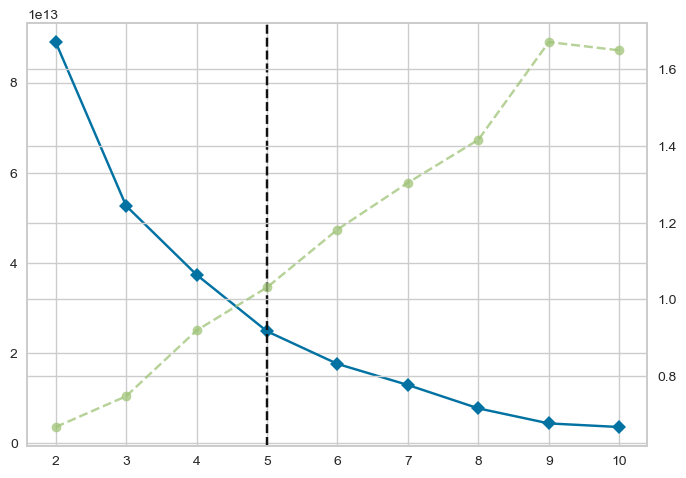

In [48]:
kmeans=KMeans(random_state=42)
elbow=KElbowVisualizer(estimator=kmeans, random_state=42)

#Hour_of_day,day,month, dayoftheweek

data=ppp.loc[:,['Approval_month', 'Approval_year', 'Approval_date',
       'Approval_pm', 'Approval_py', 'Approval_pd', 'LoanStatusMonth', 'LoanStatusYear',
                'StatusCheck_per_month', 'StatusCheck_per_year','ForgivenessMonth',
                 'ForgivenessYear', 'ForgivenessCount_pm','ForgivenessCount_py']]

#Fit the elbow

elbow.fit(data)
plt.show()         #The no of clusters would be 5.

In [49]:
#Fitting the clusters and generating the labels
kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit(data)

ppp['Datetime_label']=labels.labels_

Clustering All the PROCEED columns and extracting the labels.

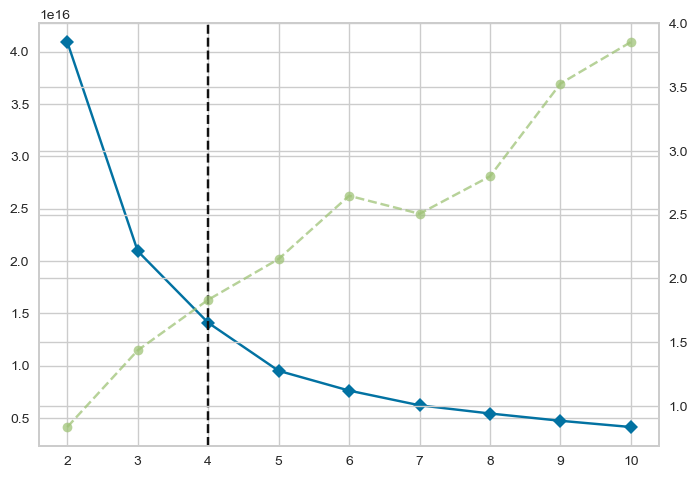

In [55]:
kmeans=KMeans(random_state=42)
elbow=KElbowVisualizer(estimator=kmeans, random_state=42)

#Hour_of_day,day,month, dayoftheweek

data=ppp.loc[:,['UTILITIES_PROCEED','PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED',
                'RENT_PROCEED','REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED','ForgivenessAmount']]

#Fit the elbow

elbow.fit(data)
plt.show()         #The no of clusters would be 4.

In [51]:
#Fitting the clusters and generating the labels
kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit(data)

ppp['Proceeds_label']=labels.labels_

# Dropping the Unnecessary Models

In [60]:
ppp.drop(columns=['LoanNumber', 'DateApproved','BorrowerName', 'BorrowerAddress',
                  'UndisbursedAmount', 'BorrowerState','BorrowerZip','LoanStatusDate',
                 'SBAGuarantyPercentage','ServicingLenderLocationID', 'ServicingLenderName',
       'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
       'ServicingLenderZip','ProjectCity','ProjectCountyName', 'ProjectState', 'ProjectZip',
        'CD', 'NAICSCode', 'UTILITIES_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
       'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
       'DEBT_INTEREST_PROCEED','OriginatingLenderLocationID', 
    'OriginatingLenderState','ForgivenessDate', 'Approval_month', 'Approval_year',
    'Approval_date','Approval_pm', 'Approval_py', 'Approval_pd',
                 'LoanStatusMonth', 'LoanStatusYear', 'ForgivenessAmount','ForgivenessMonth', 'ForgivenessYear',
                 'ForgivenessCount_pm', 'ForgivenessCount_py','PAYROLL_PROCEED', ],
        inplace=True)

**Reasons for Dropping the columns**
* LoanNumber, BorrowerName, BorrowerAddress have all distinct values.
* UndisbursedAmount, SBAGuarantyPercentage have all just 1 value.
* All Project columns and Servicing Columns had values same as Borrower columns and Originating Lender columns.
* All the remaining columns were dropped after extracting features from them.

# Categorical Columns & Numerical Columns

In [61]:
numcols=['SBAOfficeCode', 'Term','InitialApprovalAmount','CurrentApprovalAmount',
'JobsReported', 'Borrower_per_city', 'Borrower_per_state','StatusCheck_per_month', 
         'StatusCheck_per_year', 'Loans_per_BusinessAge', 'Loans_per_County', 'loan_per_CD', 
 'loan_per_Business', 'loan_per_OLLocID','loan_per_OLCity', 'loan_per_OLState',
        'BusinessSector','BusinessSubSector','BusinessIndustryGroup']

In [62]:
catcols=['ProcessingMethod','LoanStatus','FranchiseName',
         'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator',
       'BusinessAgeDescription', 'Race', 'Ethnicity', 
         'BusinessType','Gender', 'Veteran', 'NonProfit','Repeat_Borrower',
        'BorrowerCityCount','Borrower_Region','ProjectCounty_LoanCount',
        'CD_loancount','Lender_Region','Proceeds_label','Datetime_label']

# Statistics

In [63]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

#Ho:: There is no difference among group means. 
#Ha:: There is a difference among group means

for i in catcols:
    print(i,'pvalue',pd.DataFrame(anova_lm(sfa.ols('CurrentApprovalAmount~%s'%(i),data=ppp).fit())).iloc[:,-1][0])

ProcessingMethod pvalue 2.3383685838363976e-148
LoanStatus pvalue 0.8134903394407016
FranchiseName pvalue 0.8184348822261787
RuralUrbanIndicator pvalue 1.7717582830398353e-11
HubzoneIndicator pvalue 0.16036034190387932
LMIIndicator pvalue 0.6205542944076046
BusinessAgeDescription pvalue 2.1850873323776164e-11
Race pvalue 8.998333910970871e-49
Ethnicity pvalue 3.1402891458933545e-98
BusinessType pvalue 1.0272236054313156e-72
Gender pvalue 1.0844647388310775e-109
Veteran pvalue 4.387784475418163e-107
NonProfit pvalue 4.698675472775598e-74
Repeat_Borrower pvalue 0.00011354606326493925
BorrowerCityCount pvalue 6.685515993181733e-18
Borrower_Region pvalue 1.5494768426914144e-08
ProjectCounty_LoanCount pvalue 7.826578340093216e-20
CD_loancount pvalue 6.632499741125743e-19
Lender_Region pvalue 6.308699616873391e-08
Proceeds_label pvalue 0.0
Datetime_label pvalue 3.550394712463383e-220


In [64]:
#We can drop 4 columns based on our Statistical Analysis.
ppp.drop(['LoanStatus','FranchiseName','HubzoneIndicator','LMIIndicator'],axis=1,inplace=True)

In [65]:
#Ho:: There is no relation among the variables. 
#Ha:: There is a relation among the variables.

for i in numcols:
    print(i,' ',stats.ttest_ind(ppp.CurrentApprovalAmount,ppp[i]))

SBAOfficeCode   Ttest_indResult(statistic=216.00423708765578, pvalue=0.0)
Term   Ttest_indResult(statistic=216.81805496028122, pvalue=0.0)
InitialApprovalAmount   Ttest_indResult(statistic=-0.5549496803611031, pvalue=0.5789297689209981)
CurrentApprovalAmount   Ttest_indResult(statistic=0.0, pvalue=1.0)
JobsReported   Ttest_indResult(statistic=216.8117019264678, pvalue=0.0)
Borrower_per_city   Ttest_indResult(statistic=216.76253408436517, pvalue=0.0)
Borrower_per_state   Ttest_indResult(statistic=215.07081223600764, pvalue=0.0)
StatusCheck_per_month   Ttest_indResult(statistic=213.72270881778948, pvalue=0.0)
StatusCheck_per_year   Ttest_indResult(statistic=195.9068645170685, pvalue=0.0)
Loans_per_BusinessAge   Ttest_indResult(statistic=187.5089179137615, pvalue=0.0)
Loans_per_County   Ttest_indResult(statistic=216.59910726777963, pvalue=0.0)
loan_per_CD   Ttest_indResult(statistic=216.72931198000867, pvalue=0.0)
loan_per_Business   Ttest_indResult(statistic=205.94932795518426, pvalue=0.

In [66]:
#All the variables other than Initial Approval Amount are valuable to the Target variable
ppp.drop('InitialApprovalAmount',axis=1,inplace=True)

# Capping of Values

In [67]:
q1=ppp.CurrentApprovalAmount.quantile(0.25)
q3=ppp.CurrentApprovalAmount.quantile(0.75)

iqr=q3-q1

ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

In [68]:
wt_outliers=ppp[~(ppp.CurrentApprovalAmount>ul)]

In [69]:
outliers=ppp[ppp.CurrentApprovalAmount>ul]

# Univariate Analysis

In [70]:
catcols=['ProcessingMethod','RuralUrbanIndicator',
       'BusinessAgeDescription', 'Race', 'Ethnicity', 
         'BusinessType','Gender', 'Veteran', 'NonProfit','Repeat_Borrower',
        'BorrowerCityCount','Borrower_Region','ProjectCounty_LoanCount',
        'CD_loancount','Lender_Region','Proceeds_label','Datetime_label']

In [71]:
#Target Encoding of Borrower City and OriginatingLenderCity

bcity_dict=ppp.groupby('BorrowerCity')['CurrentApprovalAmount'].mean().to_dict()
ppp['BorrowerCity']=ppp.BorrowerCity.map(bcity_dict)

lcity_dict=ppp.groupby('OriginatingLenderCity')['CurrentApprovalAmount'].mean().to_dict()
ppp['OriginatingLenderCity']=ppp.OriginatingLenderCity.map(lcity_dict)

bcity_dict=wt_outliers.groupby('BorrowerCity')['CurrentApprovalAmount'].mean().to_dict()
wt_outliers['BorrowerCity']=wt_outliers.BorrowerCity.map(bcity_dict)

lcity_dict=wt_outliers.groupby('OriginatingLenderCity')['CurrentApprovalAmount'].mean().to_dict()
wt_outliers['OriginatingLenderCity']=wt_outliers.OriginatingLenderCity.map(lcity_dict)

bcity_dict=outliers.groupby('BorrowerCity')['CurrentApprovalAmount'].mean().to_dict()
outliers['BorrowerCity']=outliers.BorrowerCity.map(bcity_dict)

lcity_dict=outliers.groupby('OriginatingLenderCity')['CurrentApprovalAmount'].mean().to_dict()
outliers['OriginatingLenderCity']=outliers.OriginatingLenderCity.map(lcity_dict)

In [72]:
numcols=['SBAOfficeCode','BorrowerCity', 'Term','CurrentApprovalAmount','JobsReported',
         'Borrower_per_city','OriginatingLenderCity', 'Borrower_per_state',
         'StatusCheck_per_month', 'StatusCheck_per_year','Loans_per_BusinessAge', 
         'Loans_per_County', 'loan_per_CD', 'BusinessSector','BusinessSubSector',
         'BusinessIndustryGroup','loan_per_Business', 'loan_per_OLLocID','loan_per_OLCity',
         'loan_per_OLState']

**Univariate Analysis of Categorical Variables**

**WITHOUT OUTLIERS**

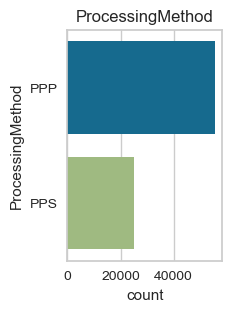

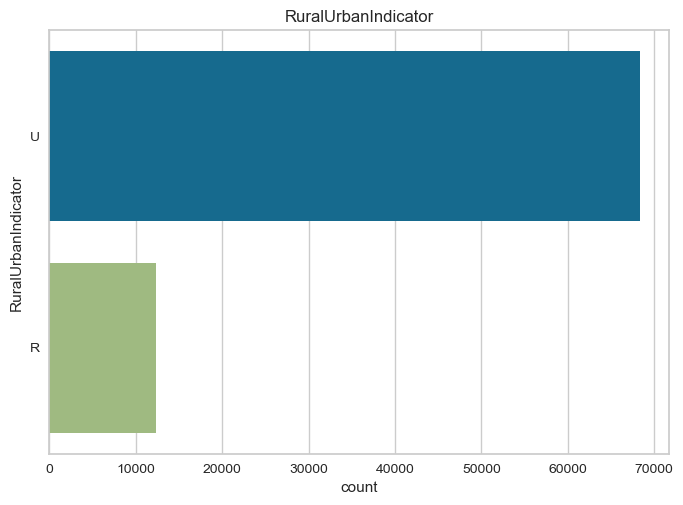

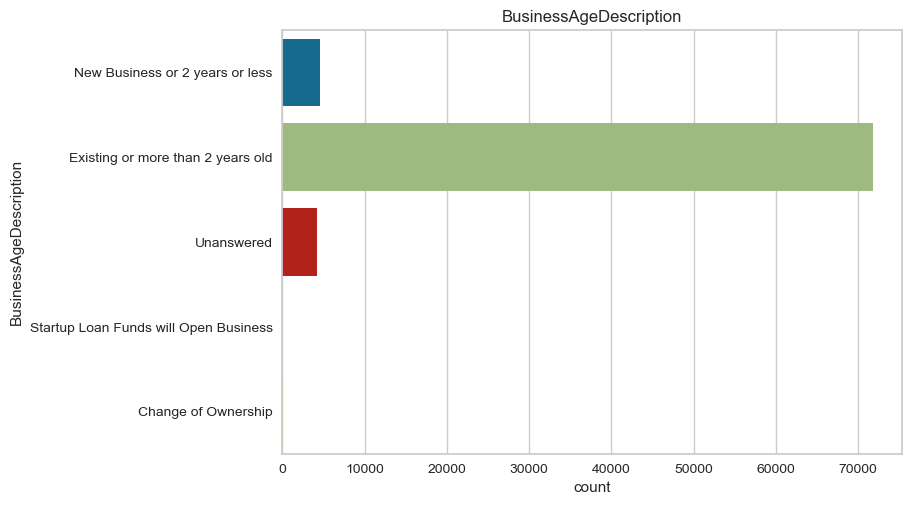

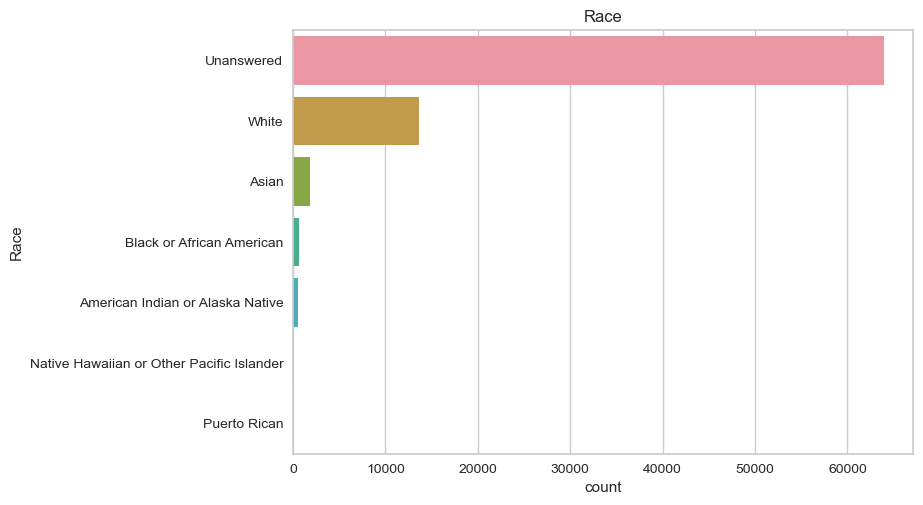

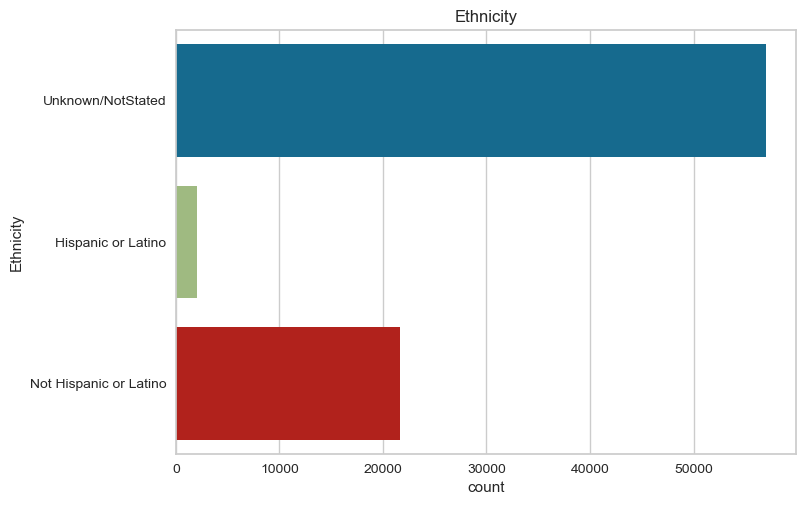

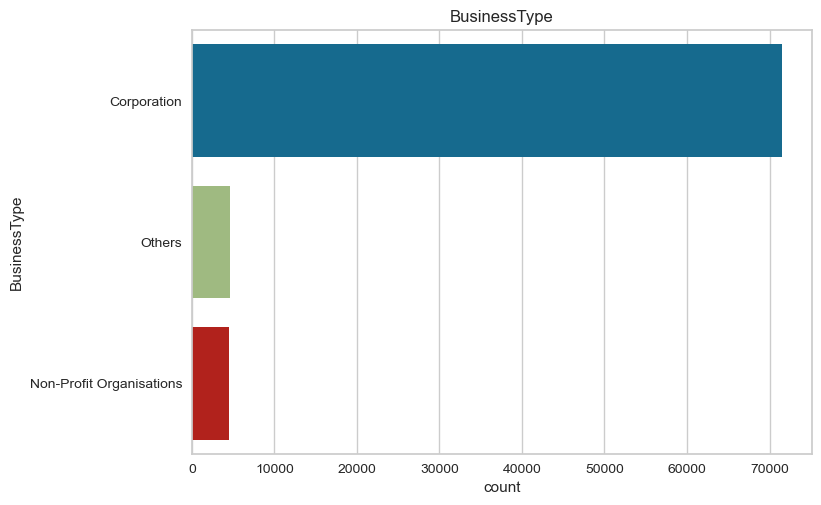

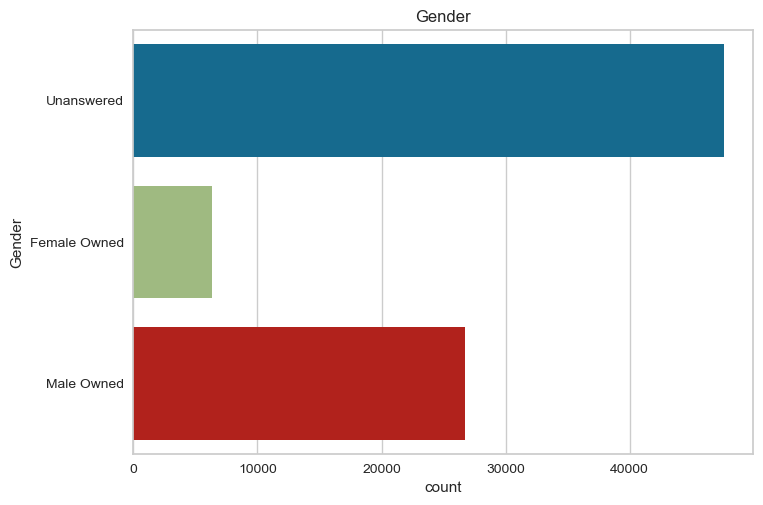

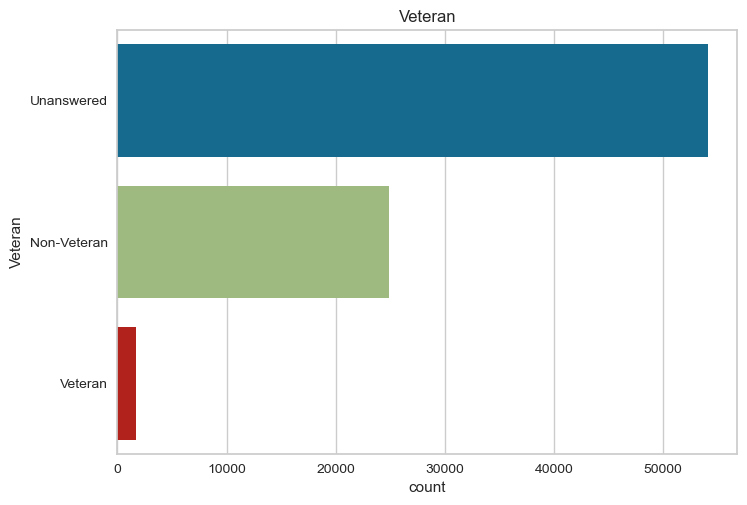

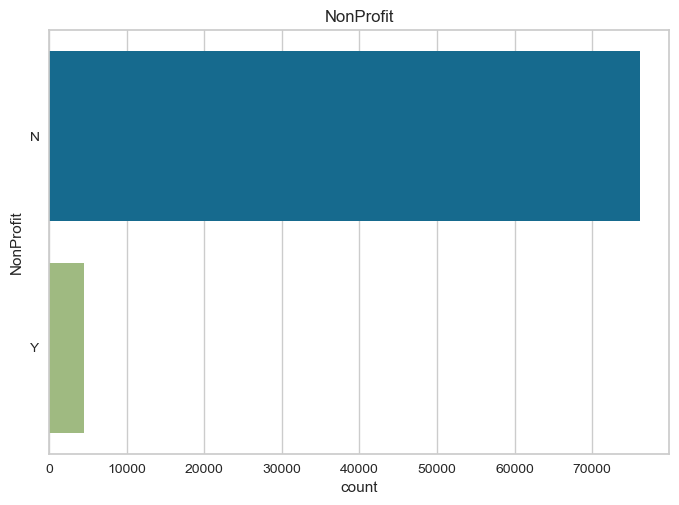

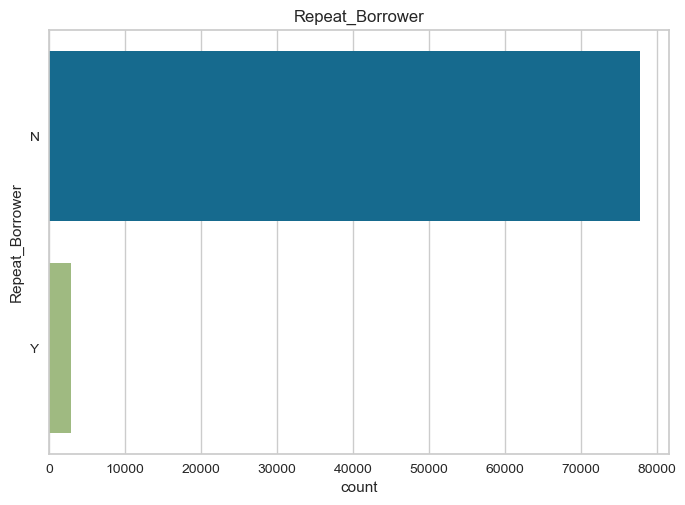

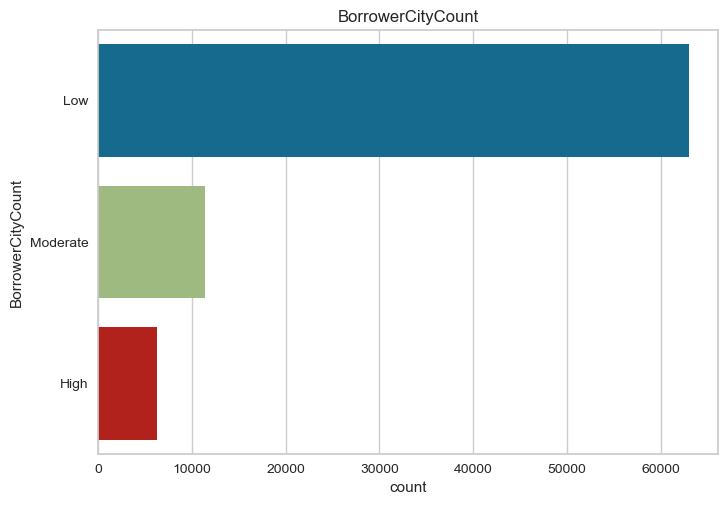

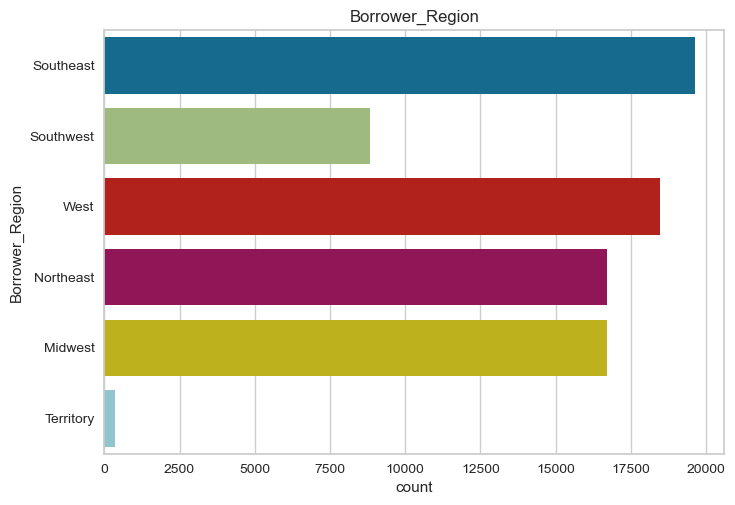

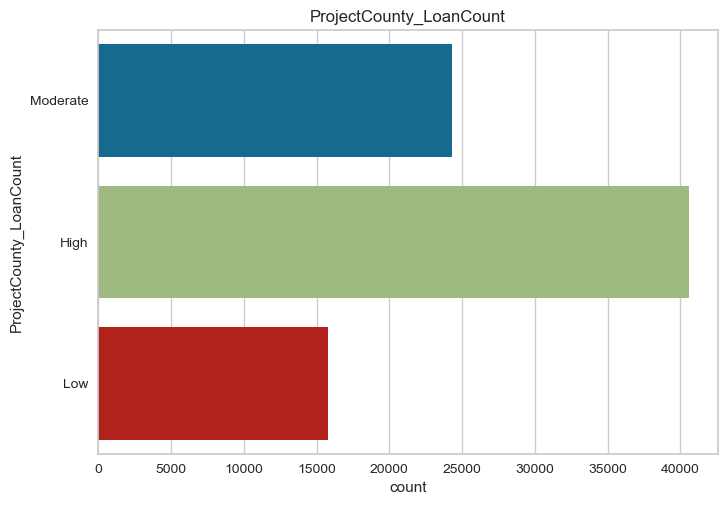

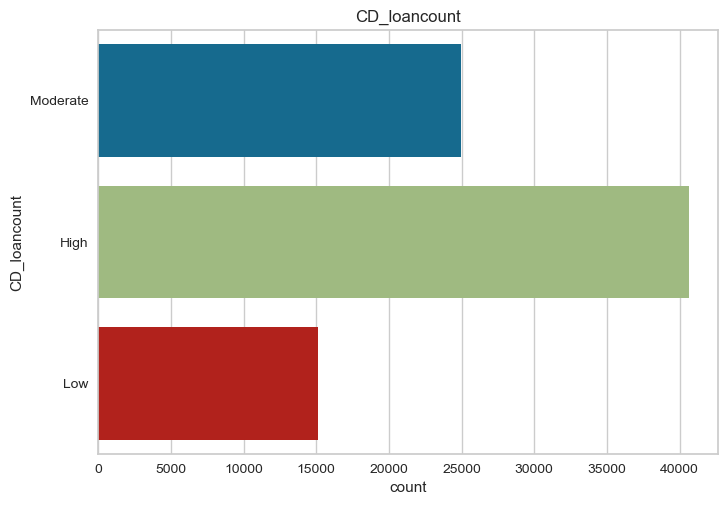

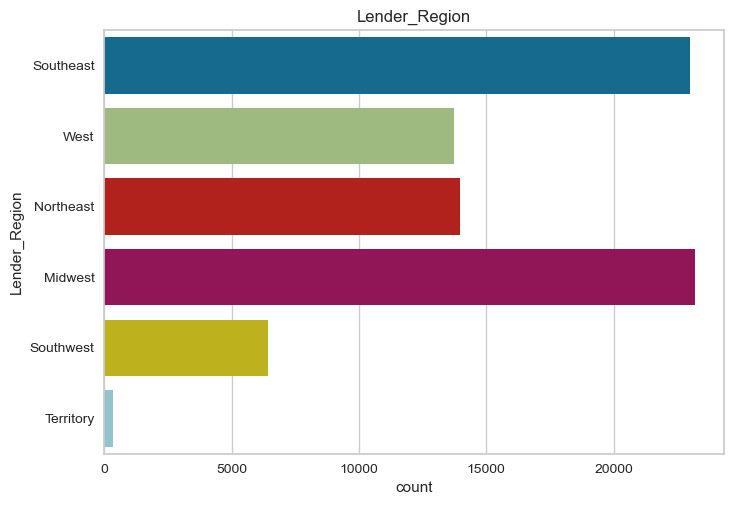

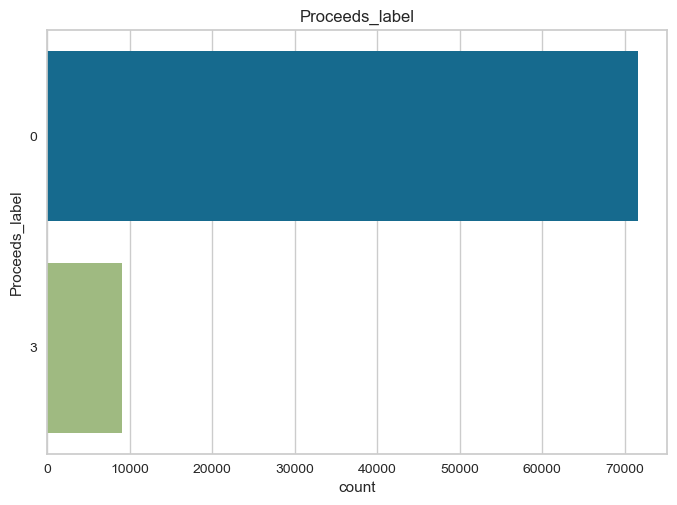

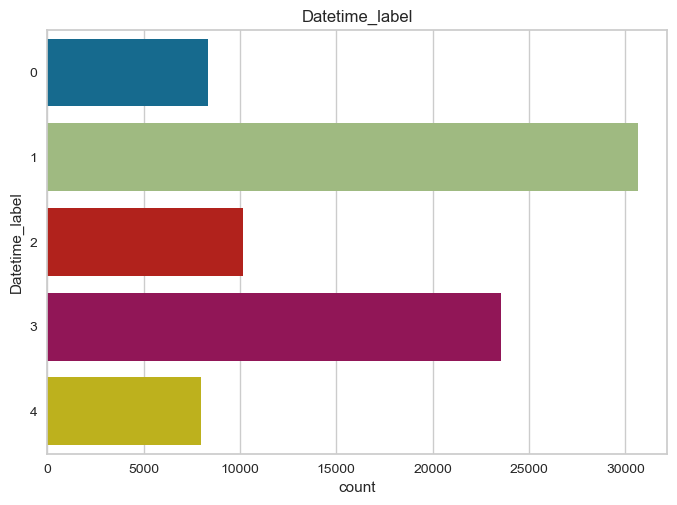

In [73]:
plt.figure(figsize=(2,3))
it=1
for i in catcols:
    sns.countplot(y=wt_outliers[i],data=wt_outliers)
    plt.title(i)
    plt.show()
    it+=1

**OUTLIERS DATA**

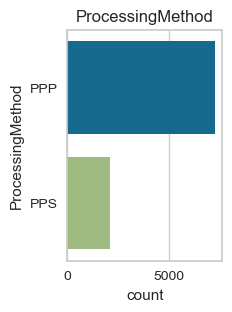

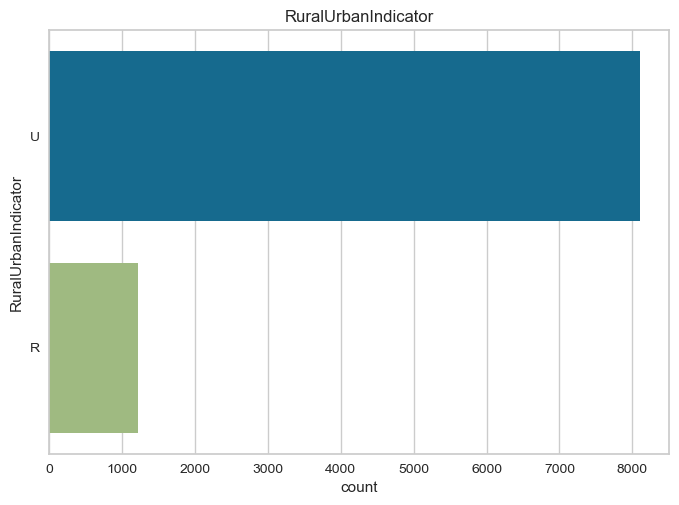

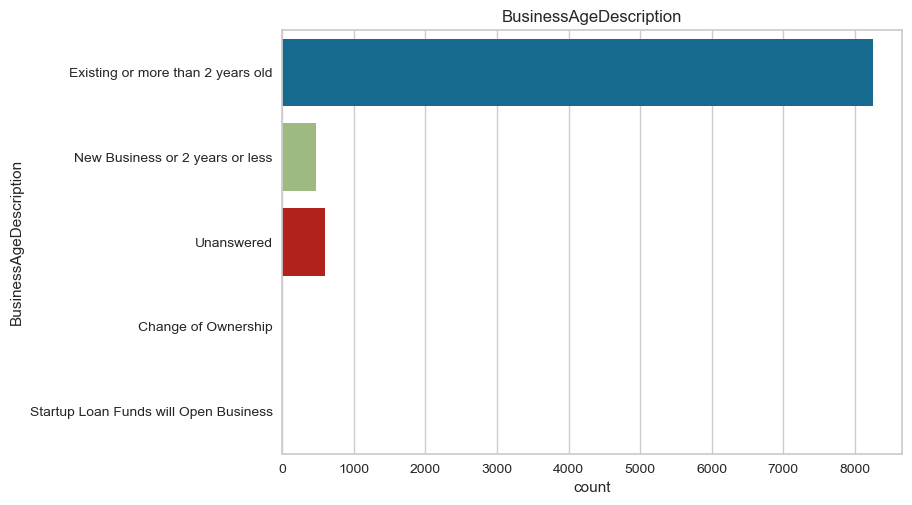

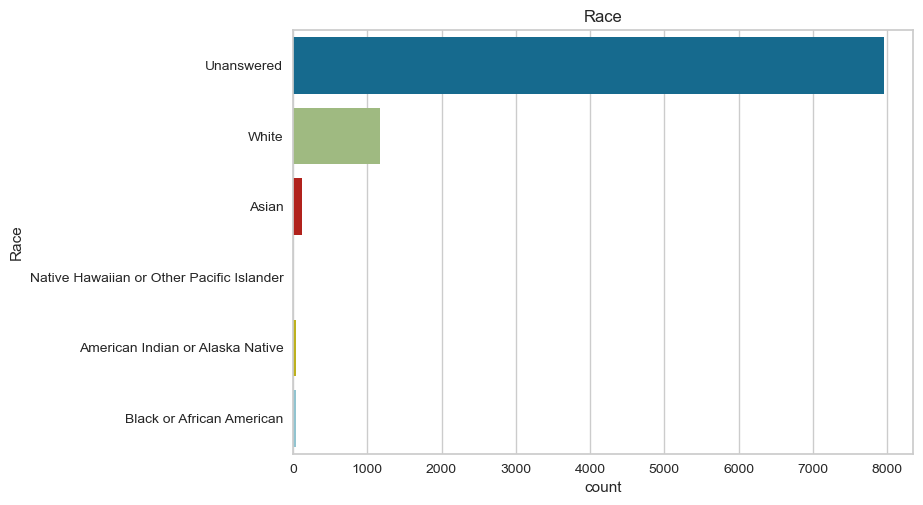

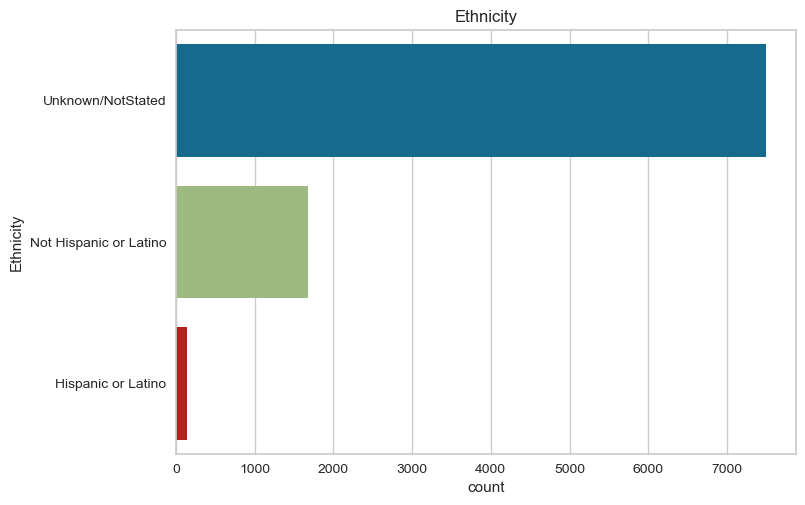

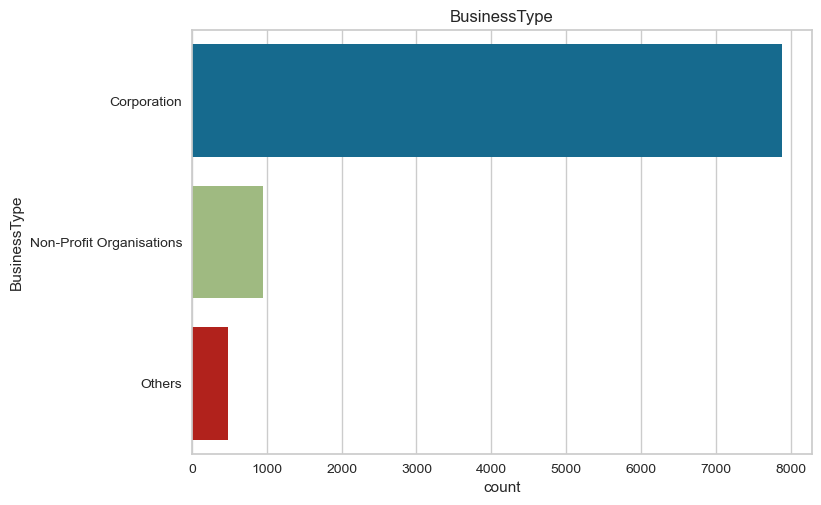

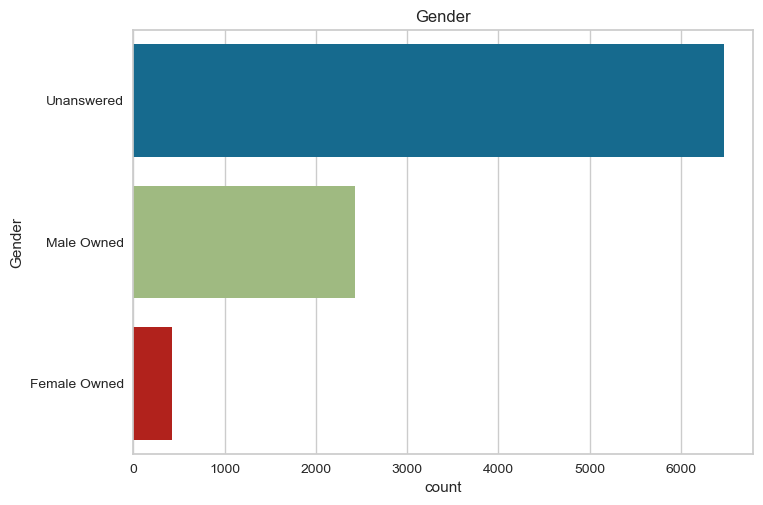

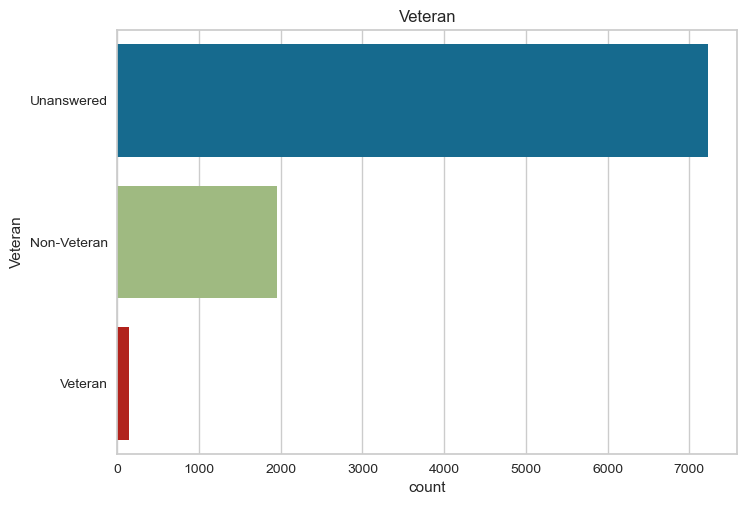

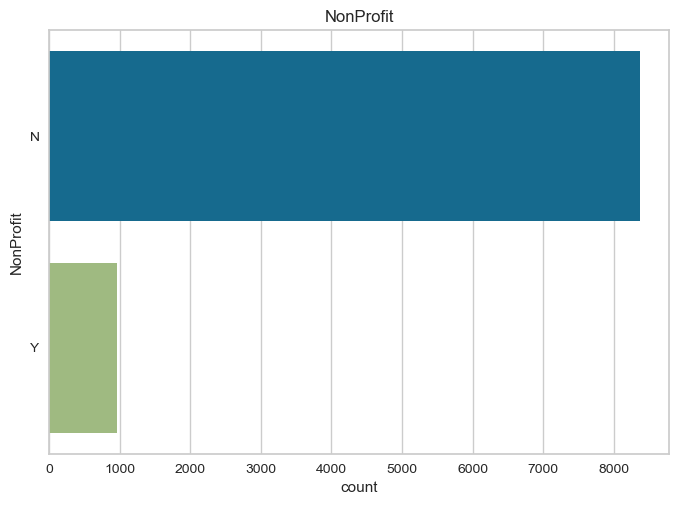

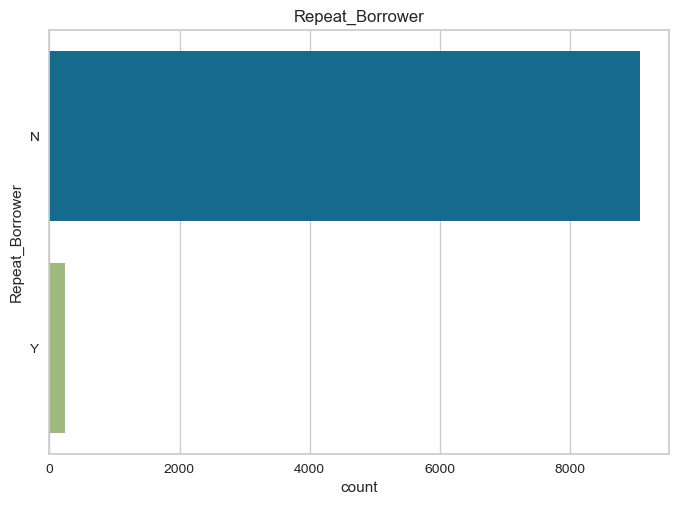

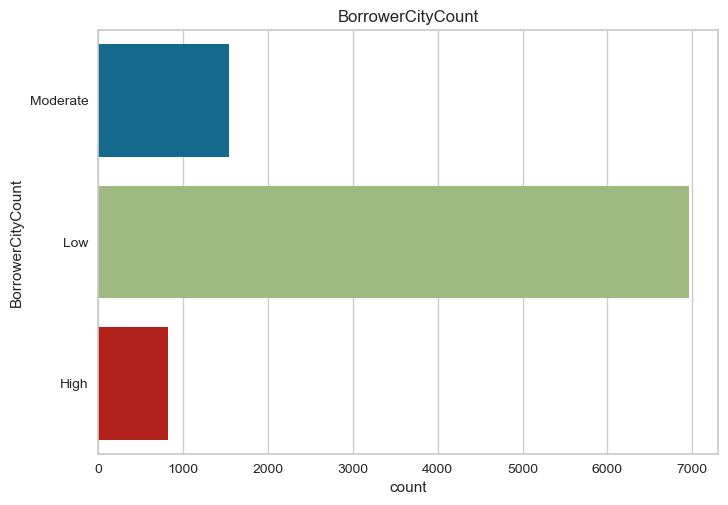

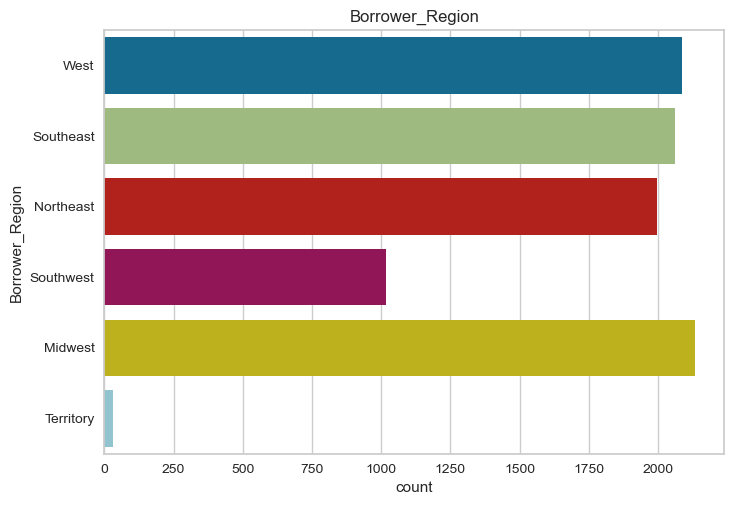

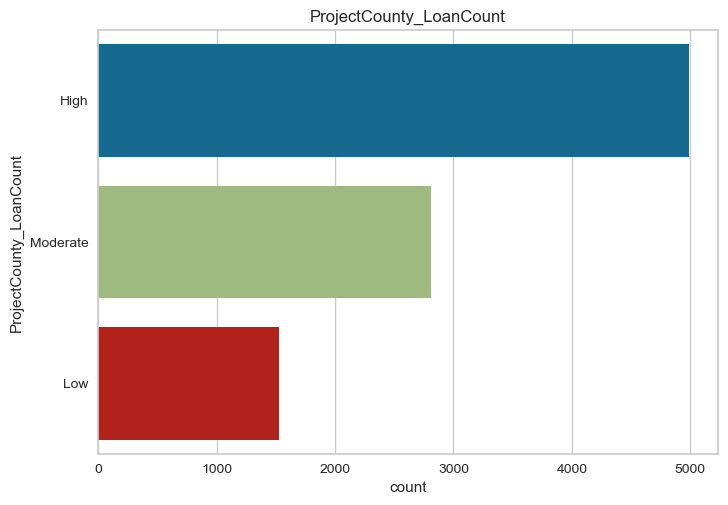

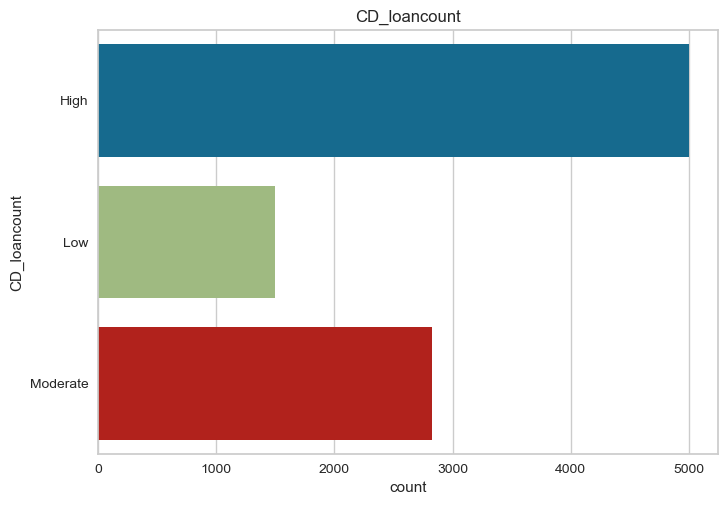

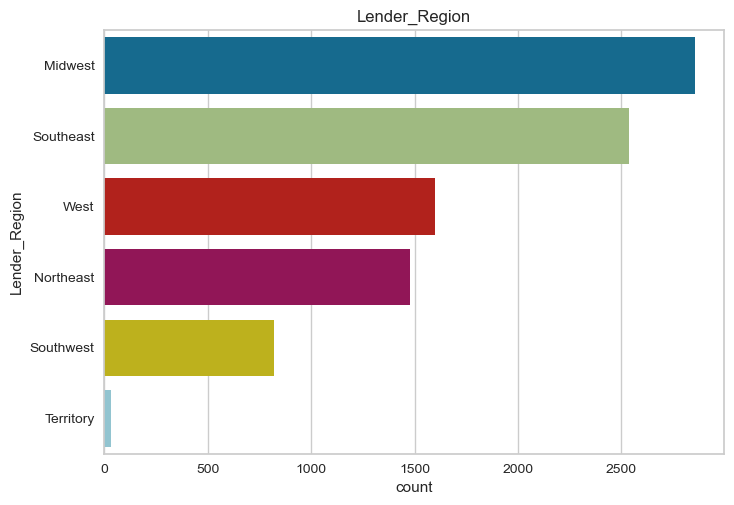

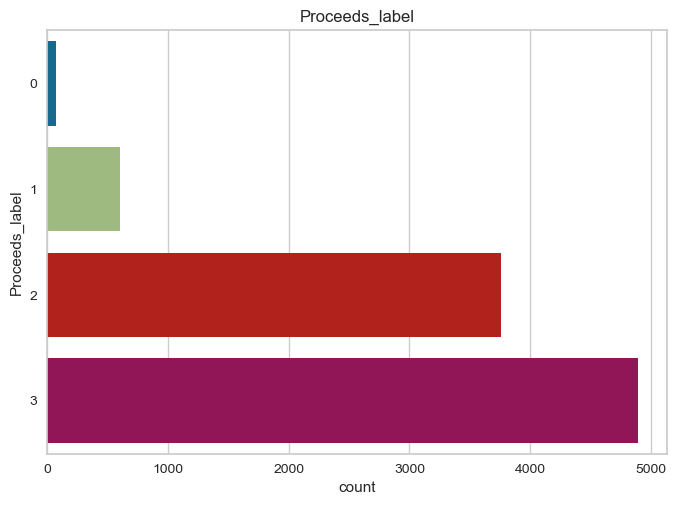

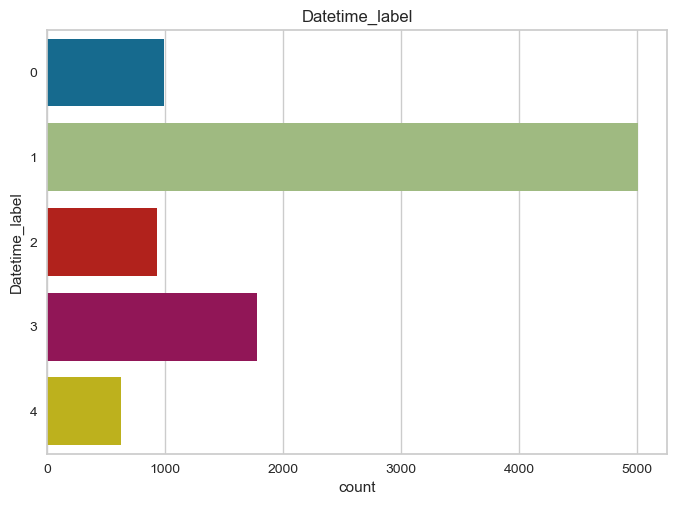

In [74]:
plt.figure(figsize=(2,3))
it=1
for i in catcols:
    sns.countplot(y=outliers[i],data=outliers)
    plt.title(i)
    plt.show()
    it+=1

**Inferences of Categorical Univariate Analysis**

* The **PPP** is the most famous loan processing method.
* Almost all the loans come under **Paid in Full** status.
* Most of the businesses are not Franchises. 
* Most of the businesses are based in **Urban** areas.
* Most of the borrowers **do not** have HubZoneIndicator and LMIIndicator.
* Maximum Businesses come under **Existing or more than 2 years old** category. **StartUp Loan Funds** and **Change of ownership** businesses have negligible no of loans.
* Most of the business owners have **not declared their RACE**. Among the ones who declared, **White Owners** have the largest share. **Islanders(Native Hawaiian and Other Pacific Islanders)** and **Puerto Ricans** have almost negligible no. of loans. 
* Most of the business owners have **not declared their Ethinicity**. Among the ones who declared, **Not Hispanic or Latino** have the largest share. 
* Most of the Businesses are **Corporations**.  Non Profit in Common did not have much no of loans.         
* Most of the business owners have **not declared their Gender**. Among the ones who declared, **Male Owned Businesses** have the largest share.
* Most of the business owners have **not declared their Veteran Status**. Among the ones who declared, **Not Veteran** have the largest share.
* Most of the businesses are **Non-Profit** Businesses.
* Most of the business have taken the loan once only.
* Most of the cities have low number of loan borrowings.
* Southeast region has the maximum number of loan borrowings, whereas the territories have negligible number of loans.
* Most of the counties have high number of borrowers.
* Most of the CD- Congretional Districts have high number of borrowers.
* Business Sector 62,72,23,54 have the highest number of loan borrowings. businesses from 92,49, 22, 55 business sectors have taken the least number of loans.
* Business Sector 1 has the highest number of loan borrowings. Business under Subsector 7,9 have least number of loan borrowings.
* Midwest and Southeast regions have the highest number of loan lenders, whereas there are negligible number of lenders in the Territories.

**Univariate Analysis of Numerical Columns**

**WITHOUT OUTLIERS DATA**

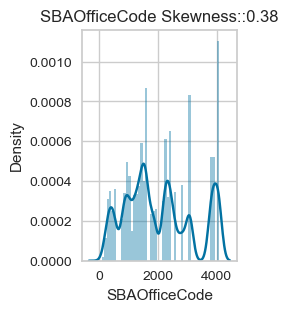

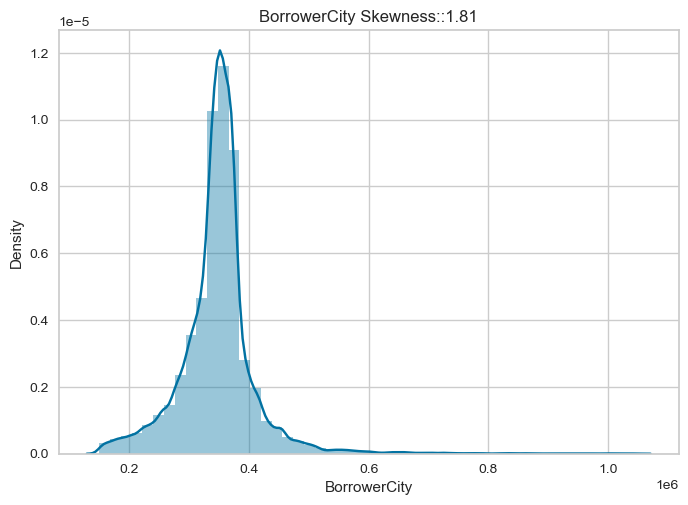

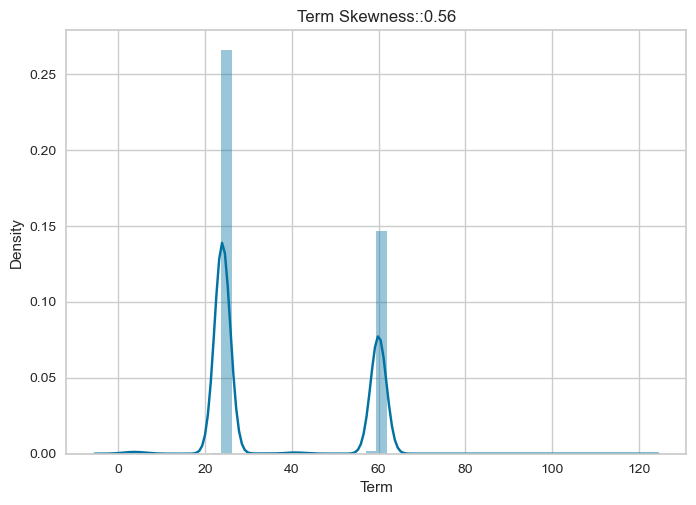

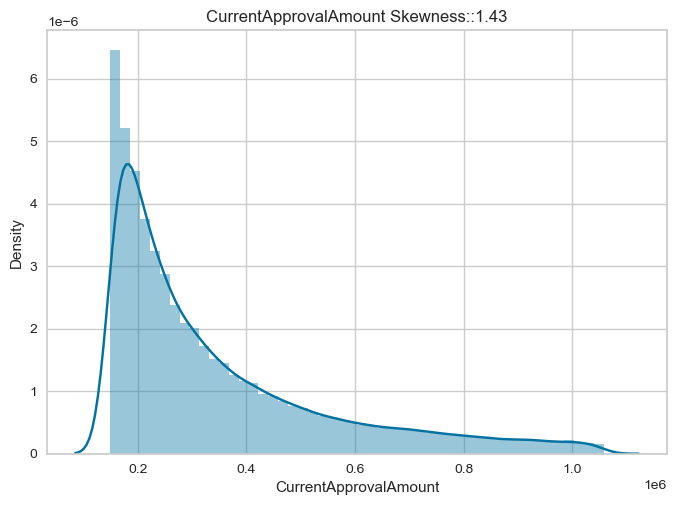

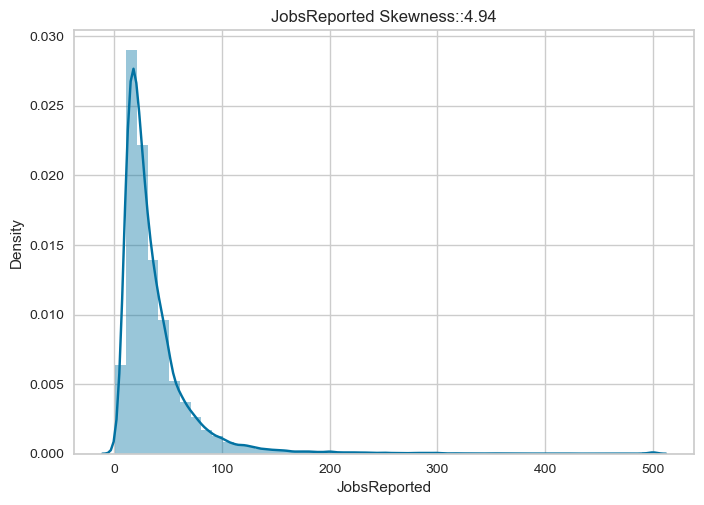

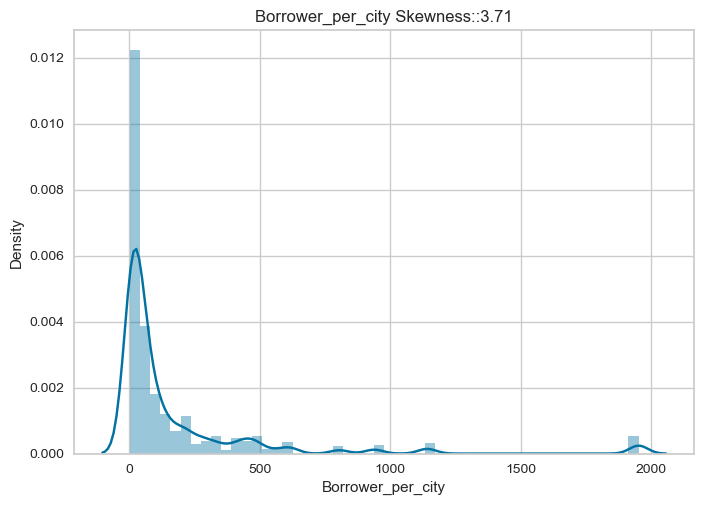

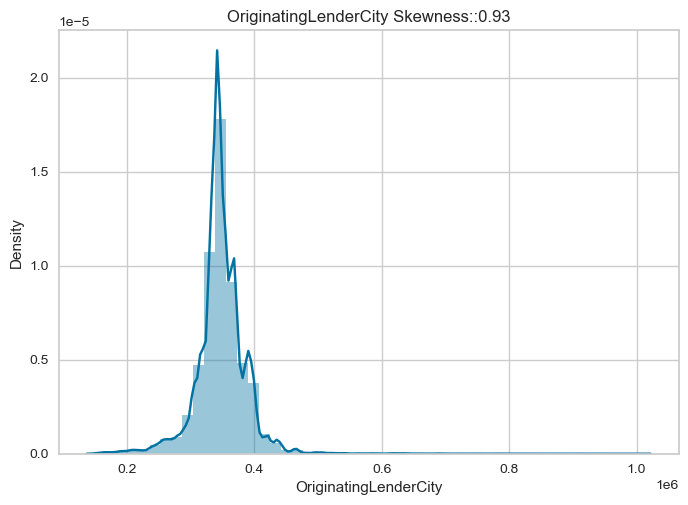

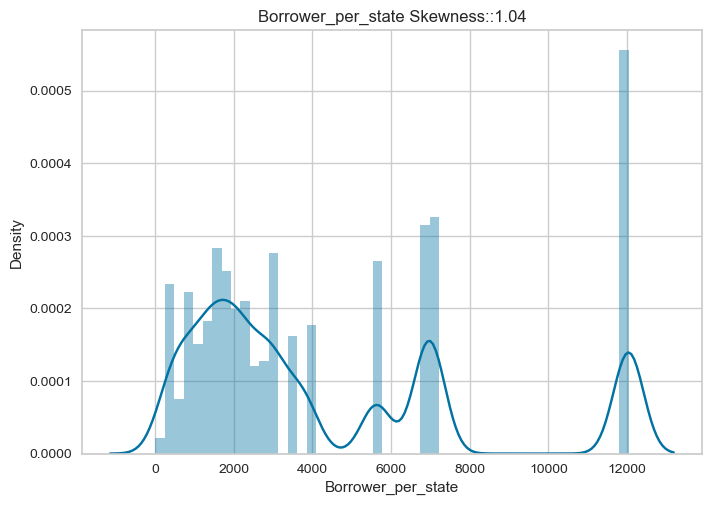

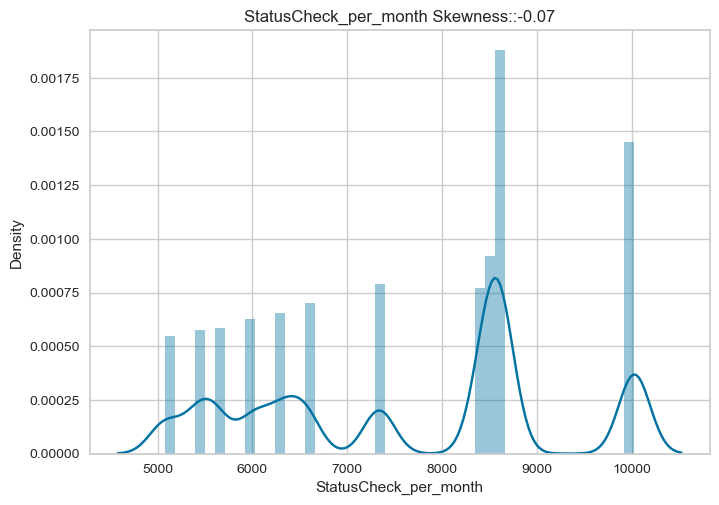

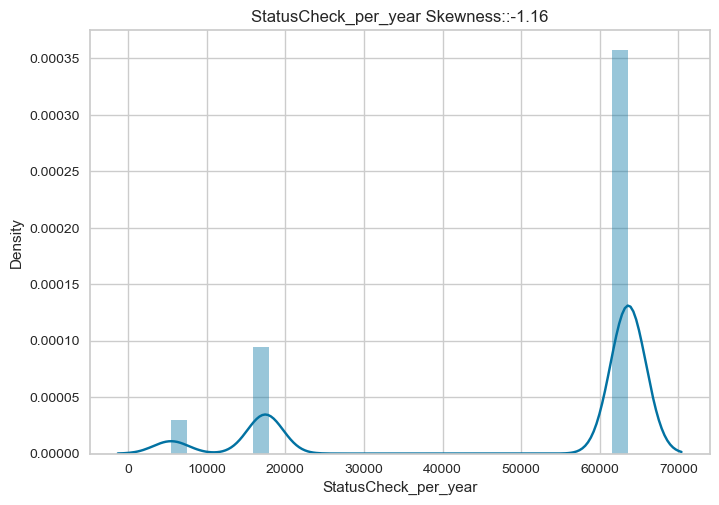

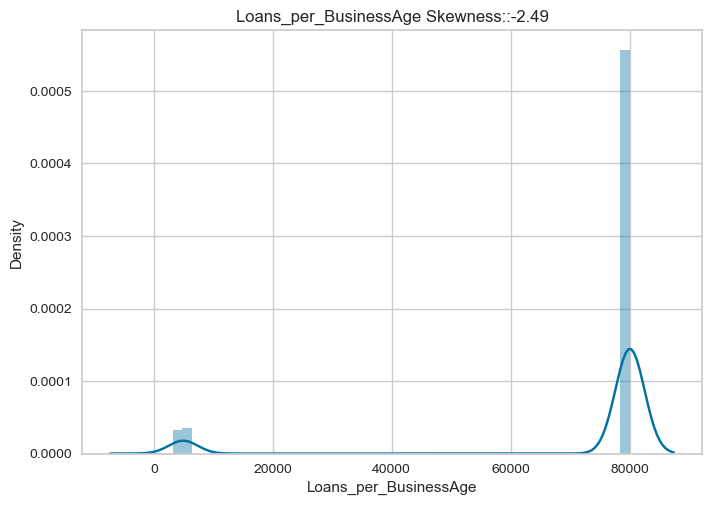

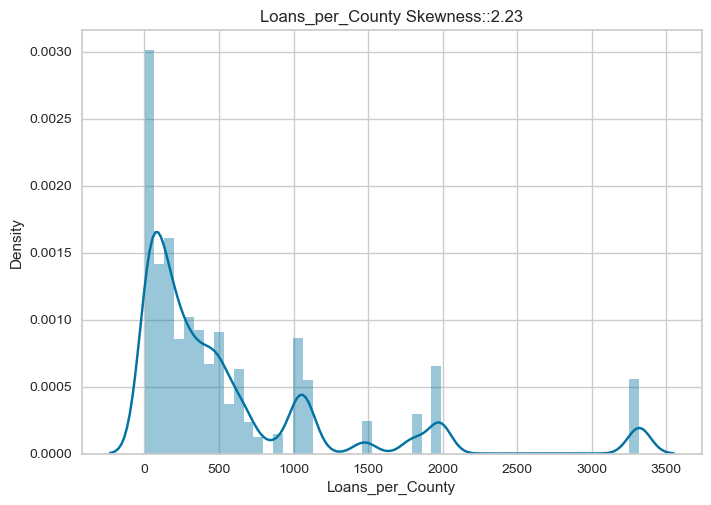

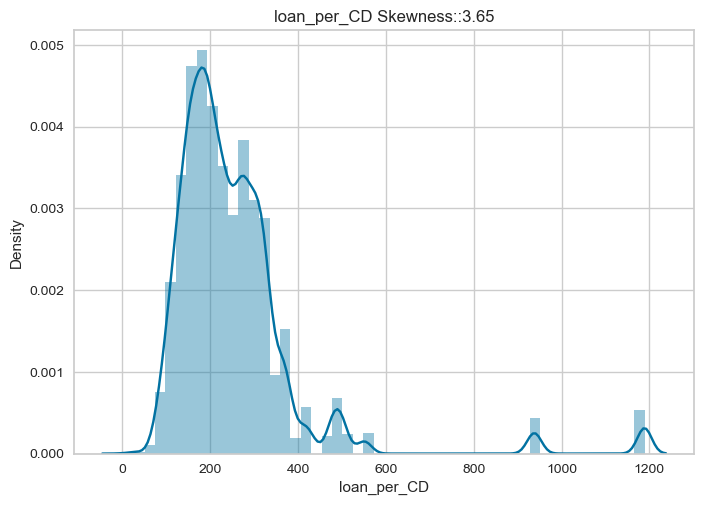

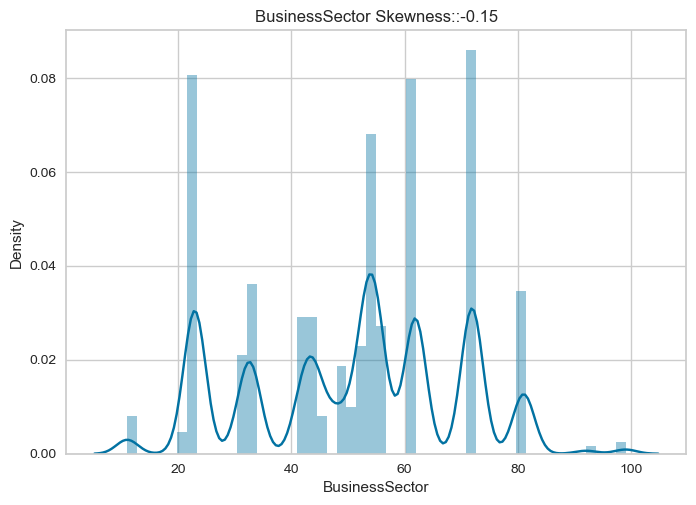

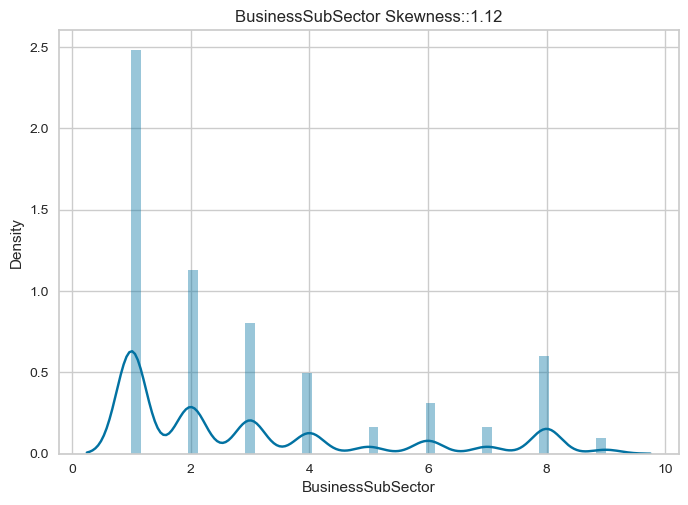

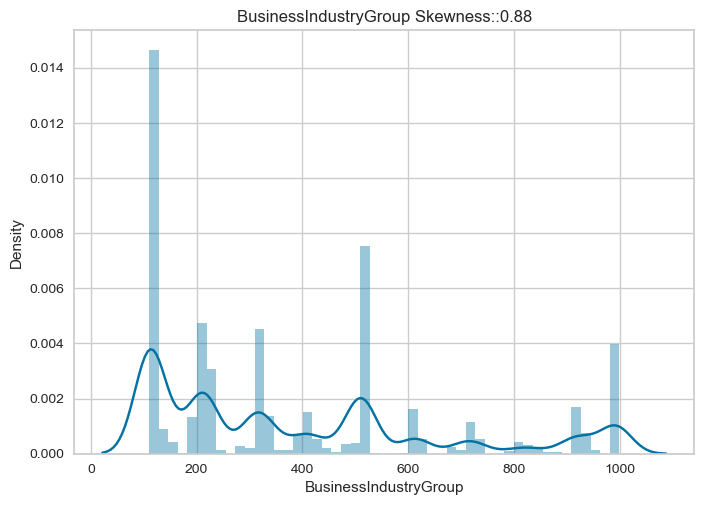

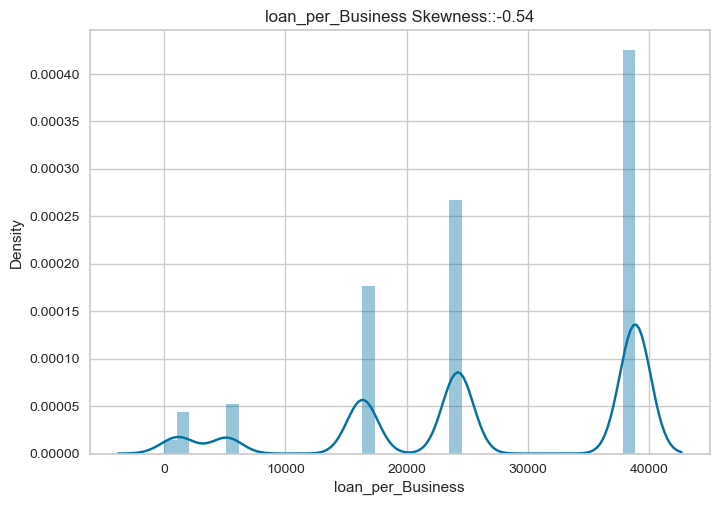

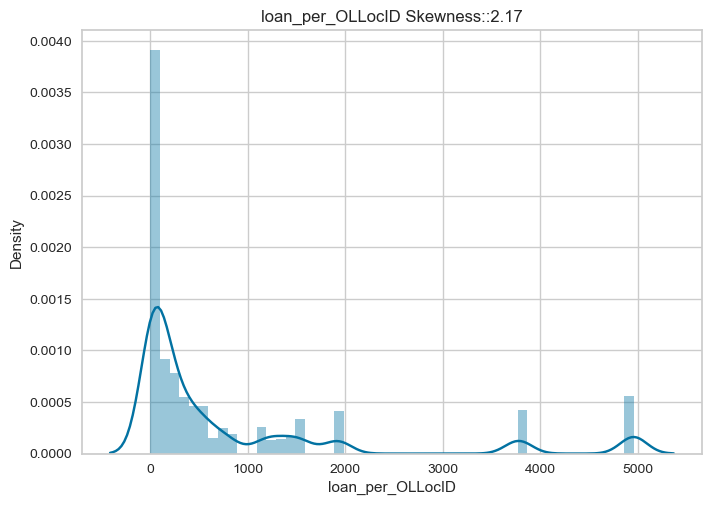

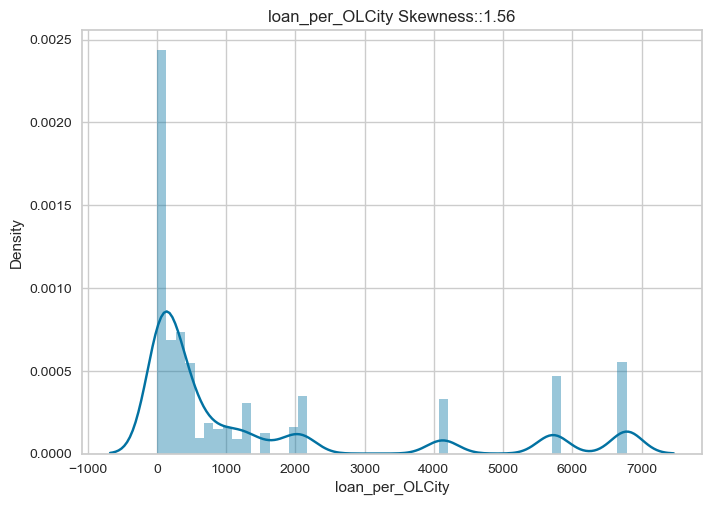

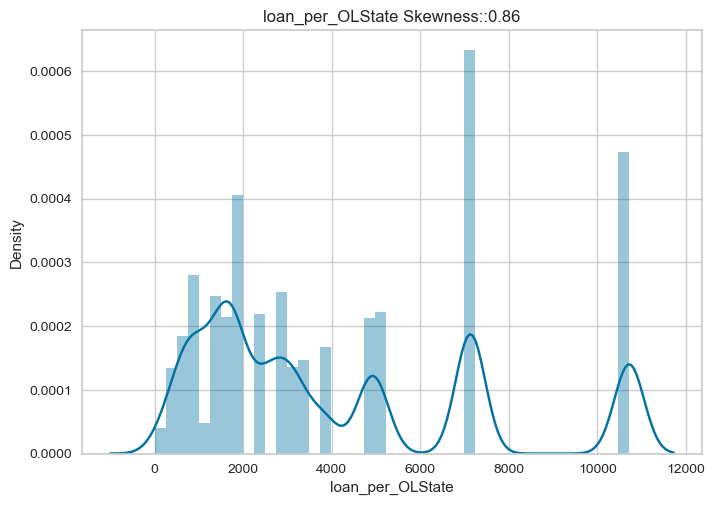

In [75]:
plt.figure(figsize=(2,3))
it=1
for i in numcols:
    sns.distplot(wt_outliers[i])
    plt.title('%s Skewness::%.2f'%(i,wt_outliers[i].skew()))
    plt.show()
    it+=1

**OUTLIERS DATA**

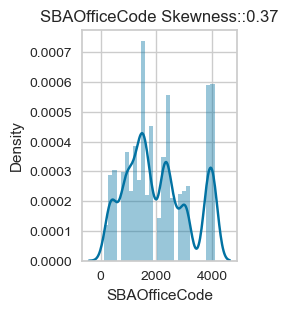

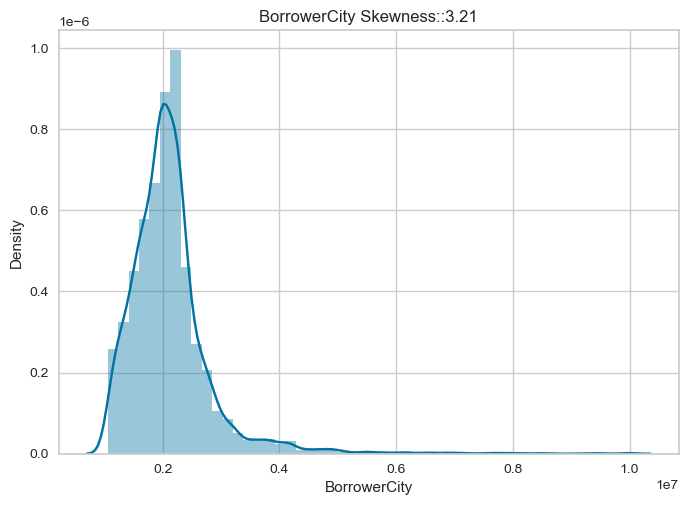

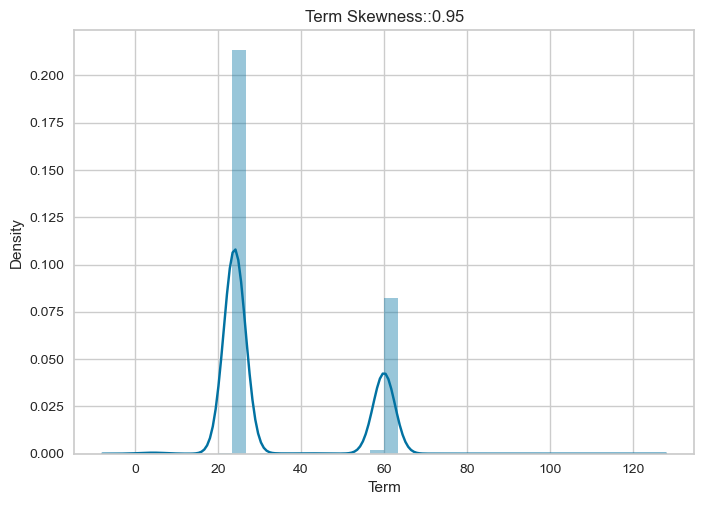

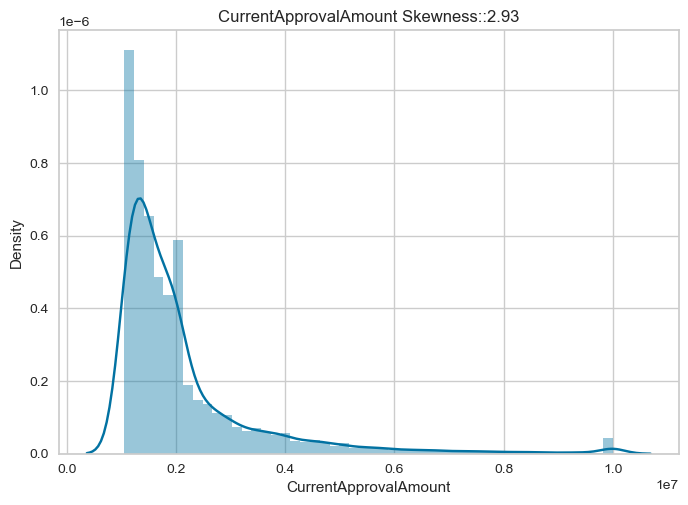

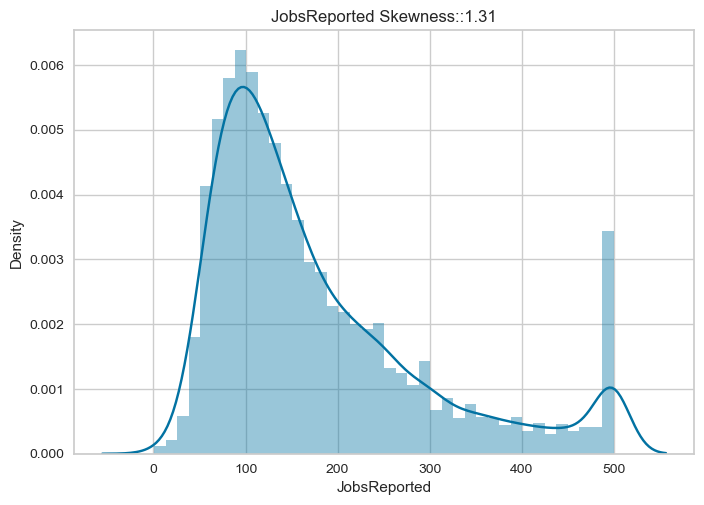

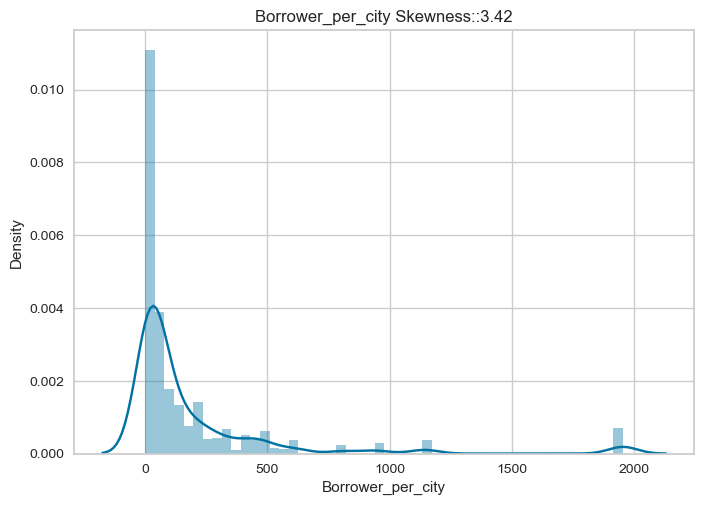

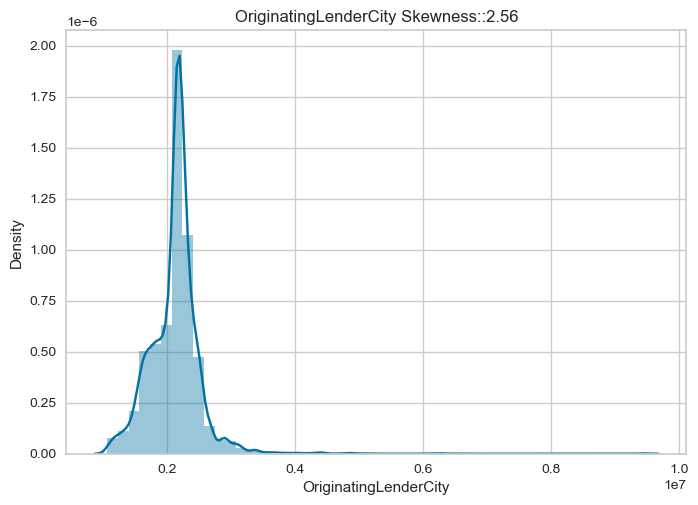

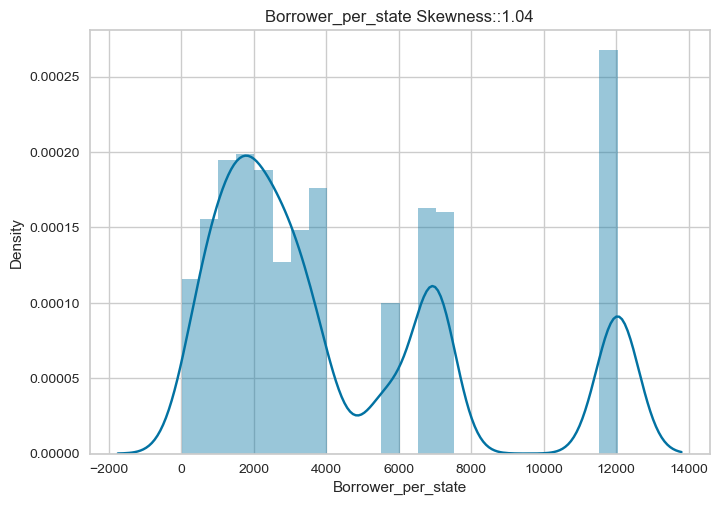

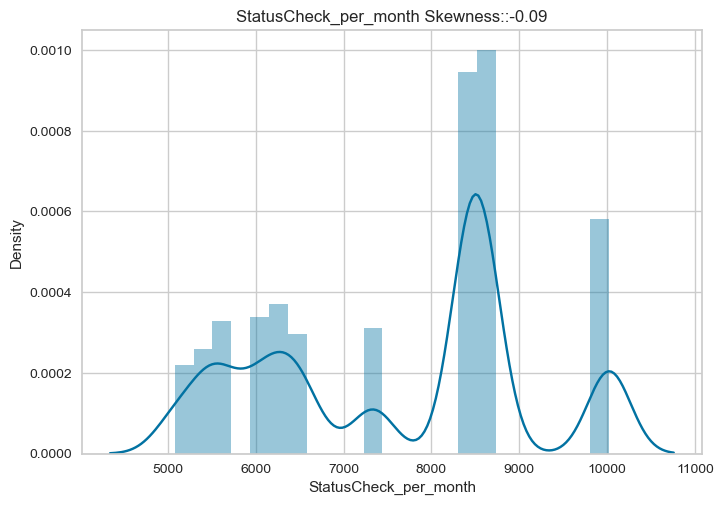

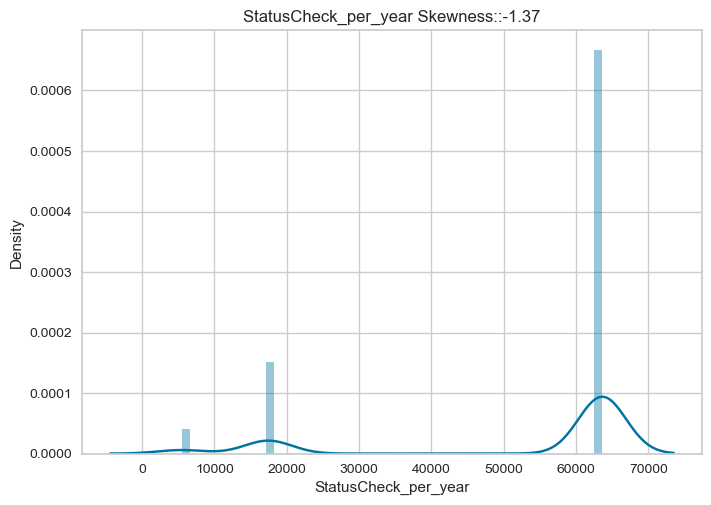

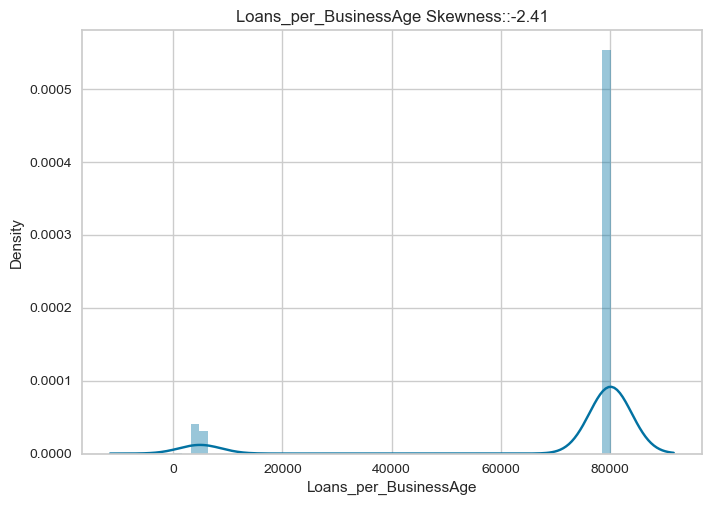

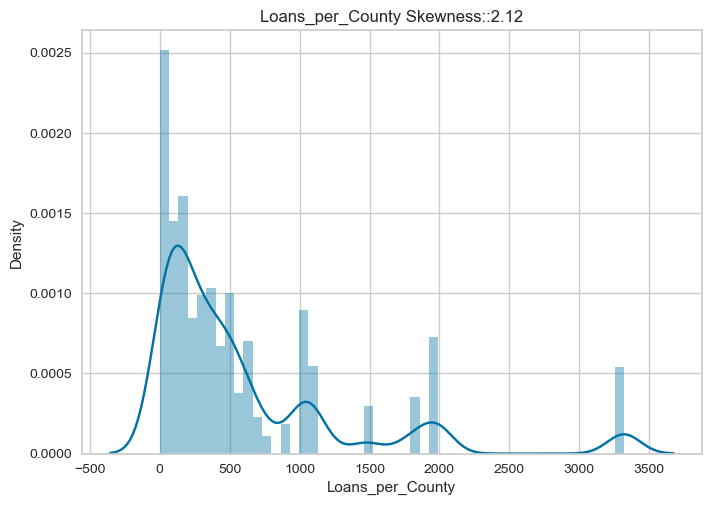

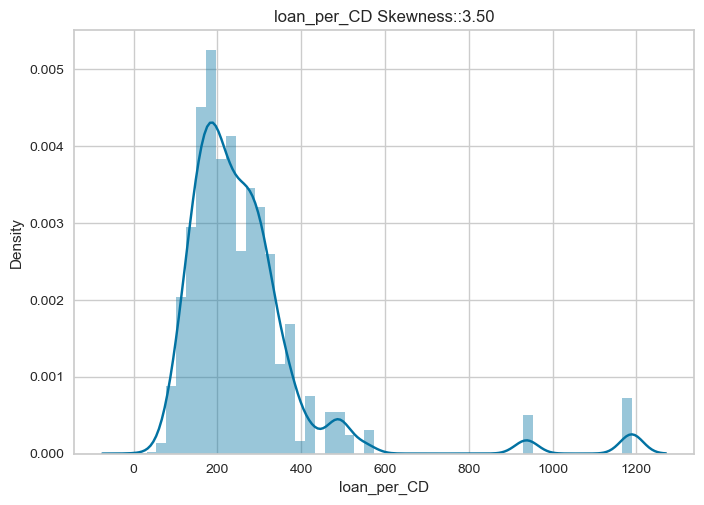

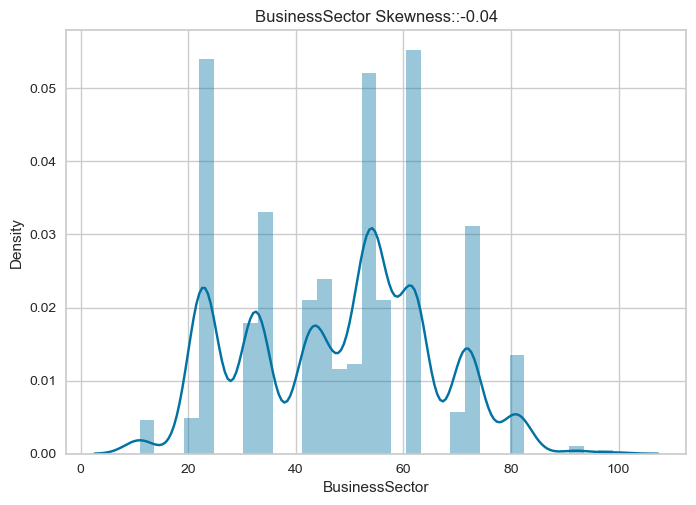

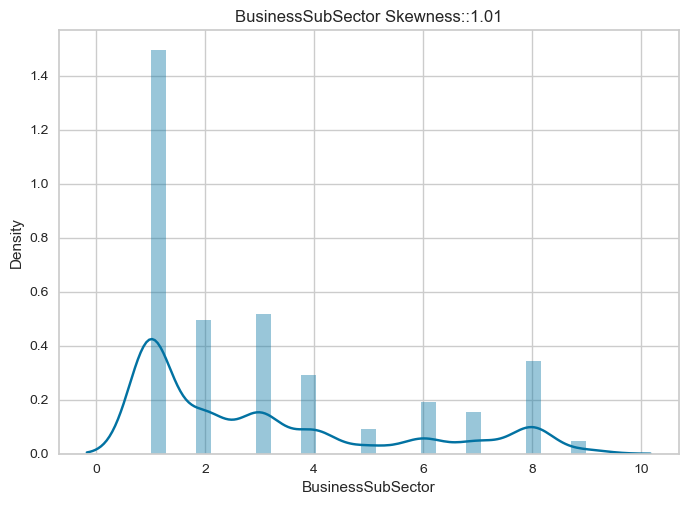

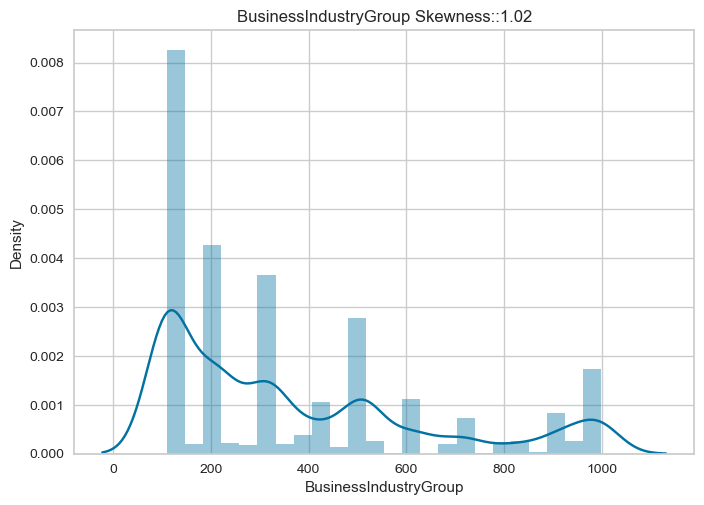

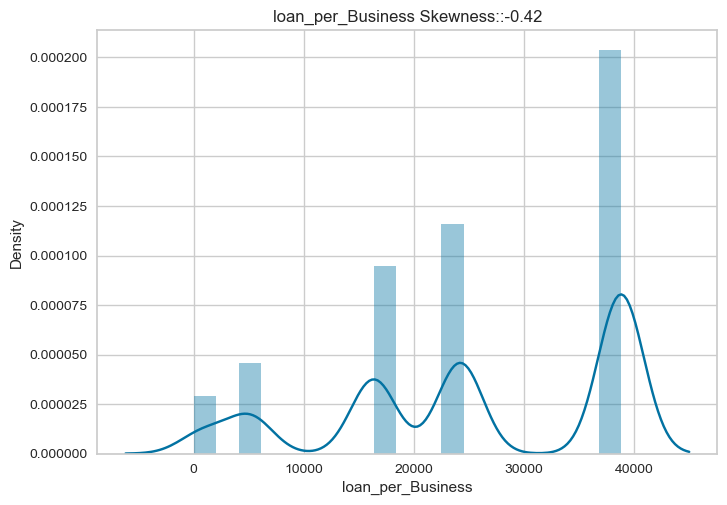

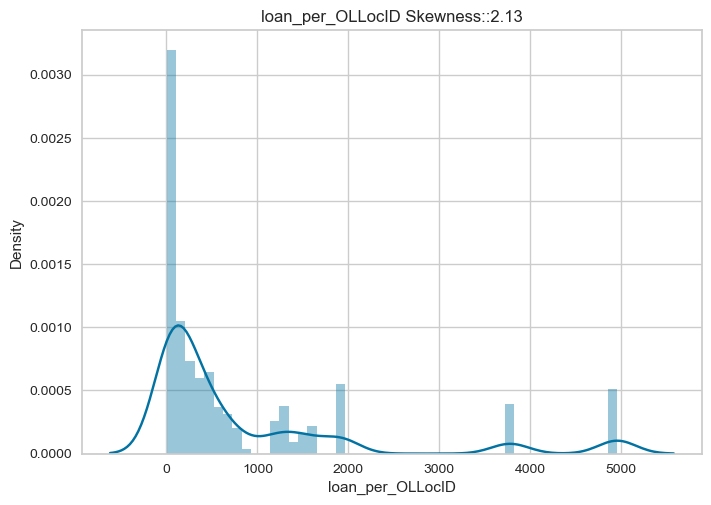

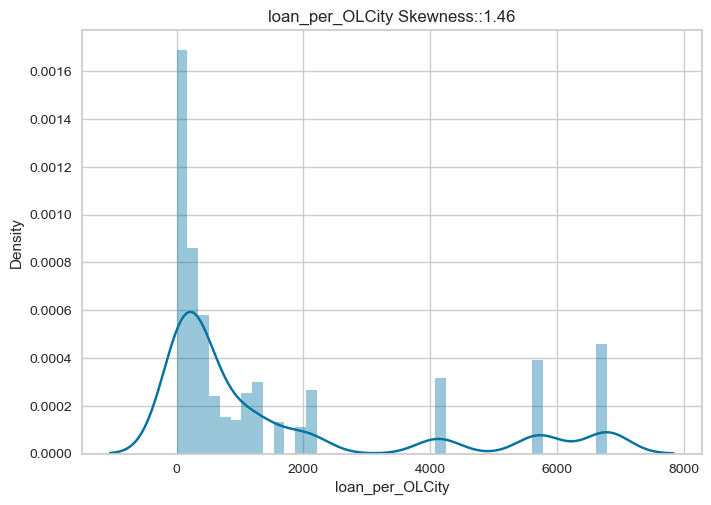

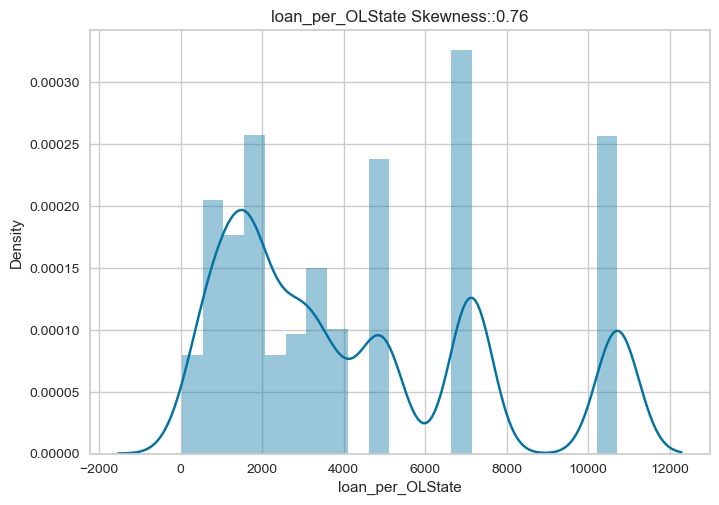

In [76]:
plt.figure(figsize=(2,3))
it=1
for i in numcols:
    sns.distplot(outliers[i])
    plt.title('%s Skewness::%.2f'%(i,outliers[i].skew()))
    plt.show()
    it+=1

**Inferences of Categorical Univariate Analysis**
* Counts of loans per SBAOfficeCode, borrower_per_state, status_check_per_month, loan_per_business is multimodel data.
* Most of the Borrower cities have very low number of loans.
* Term of the loan is a multi model variable with Maximum values at **20 and 60 months**.
* All the numerical columns are **highly right skewed** and have **0 as values** as well.

# Bivariate Analysis

**Bivariate Analysis For Categorical Variables**

**WITHOUT OUTLIERS DATA**

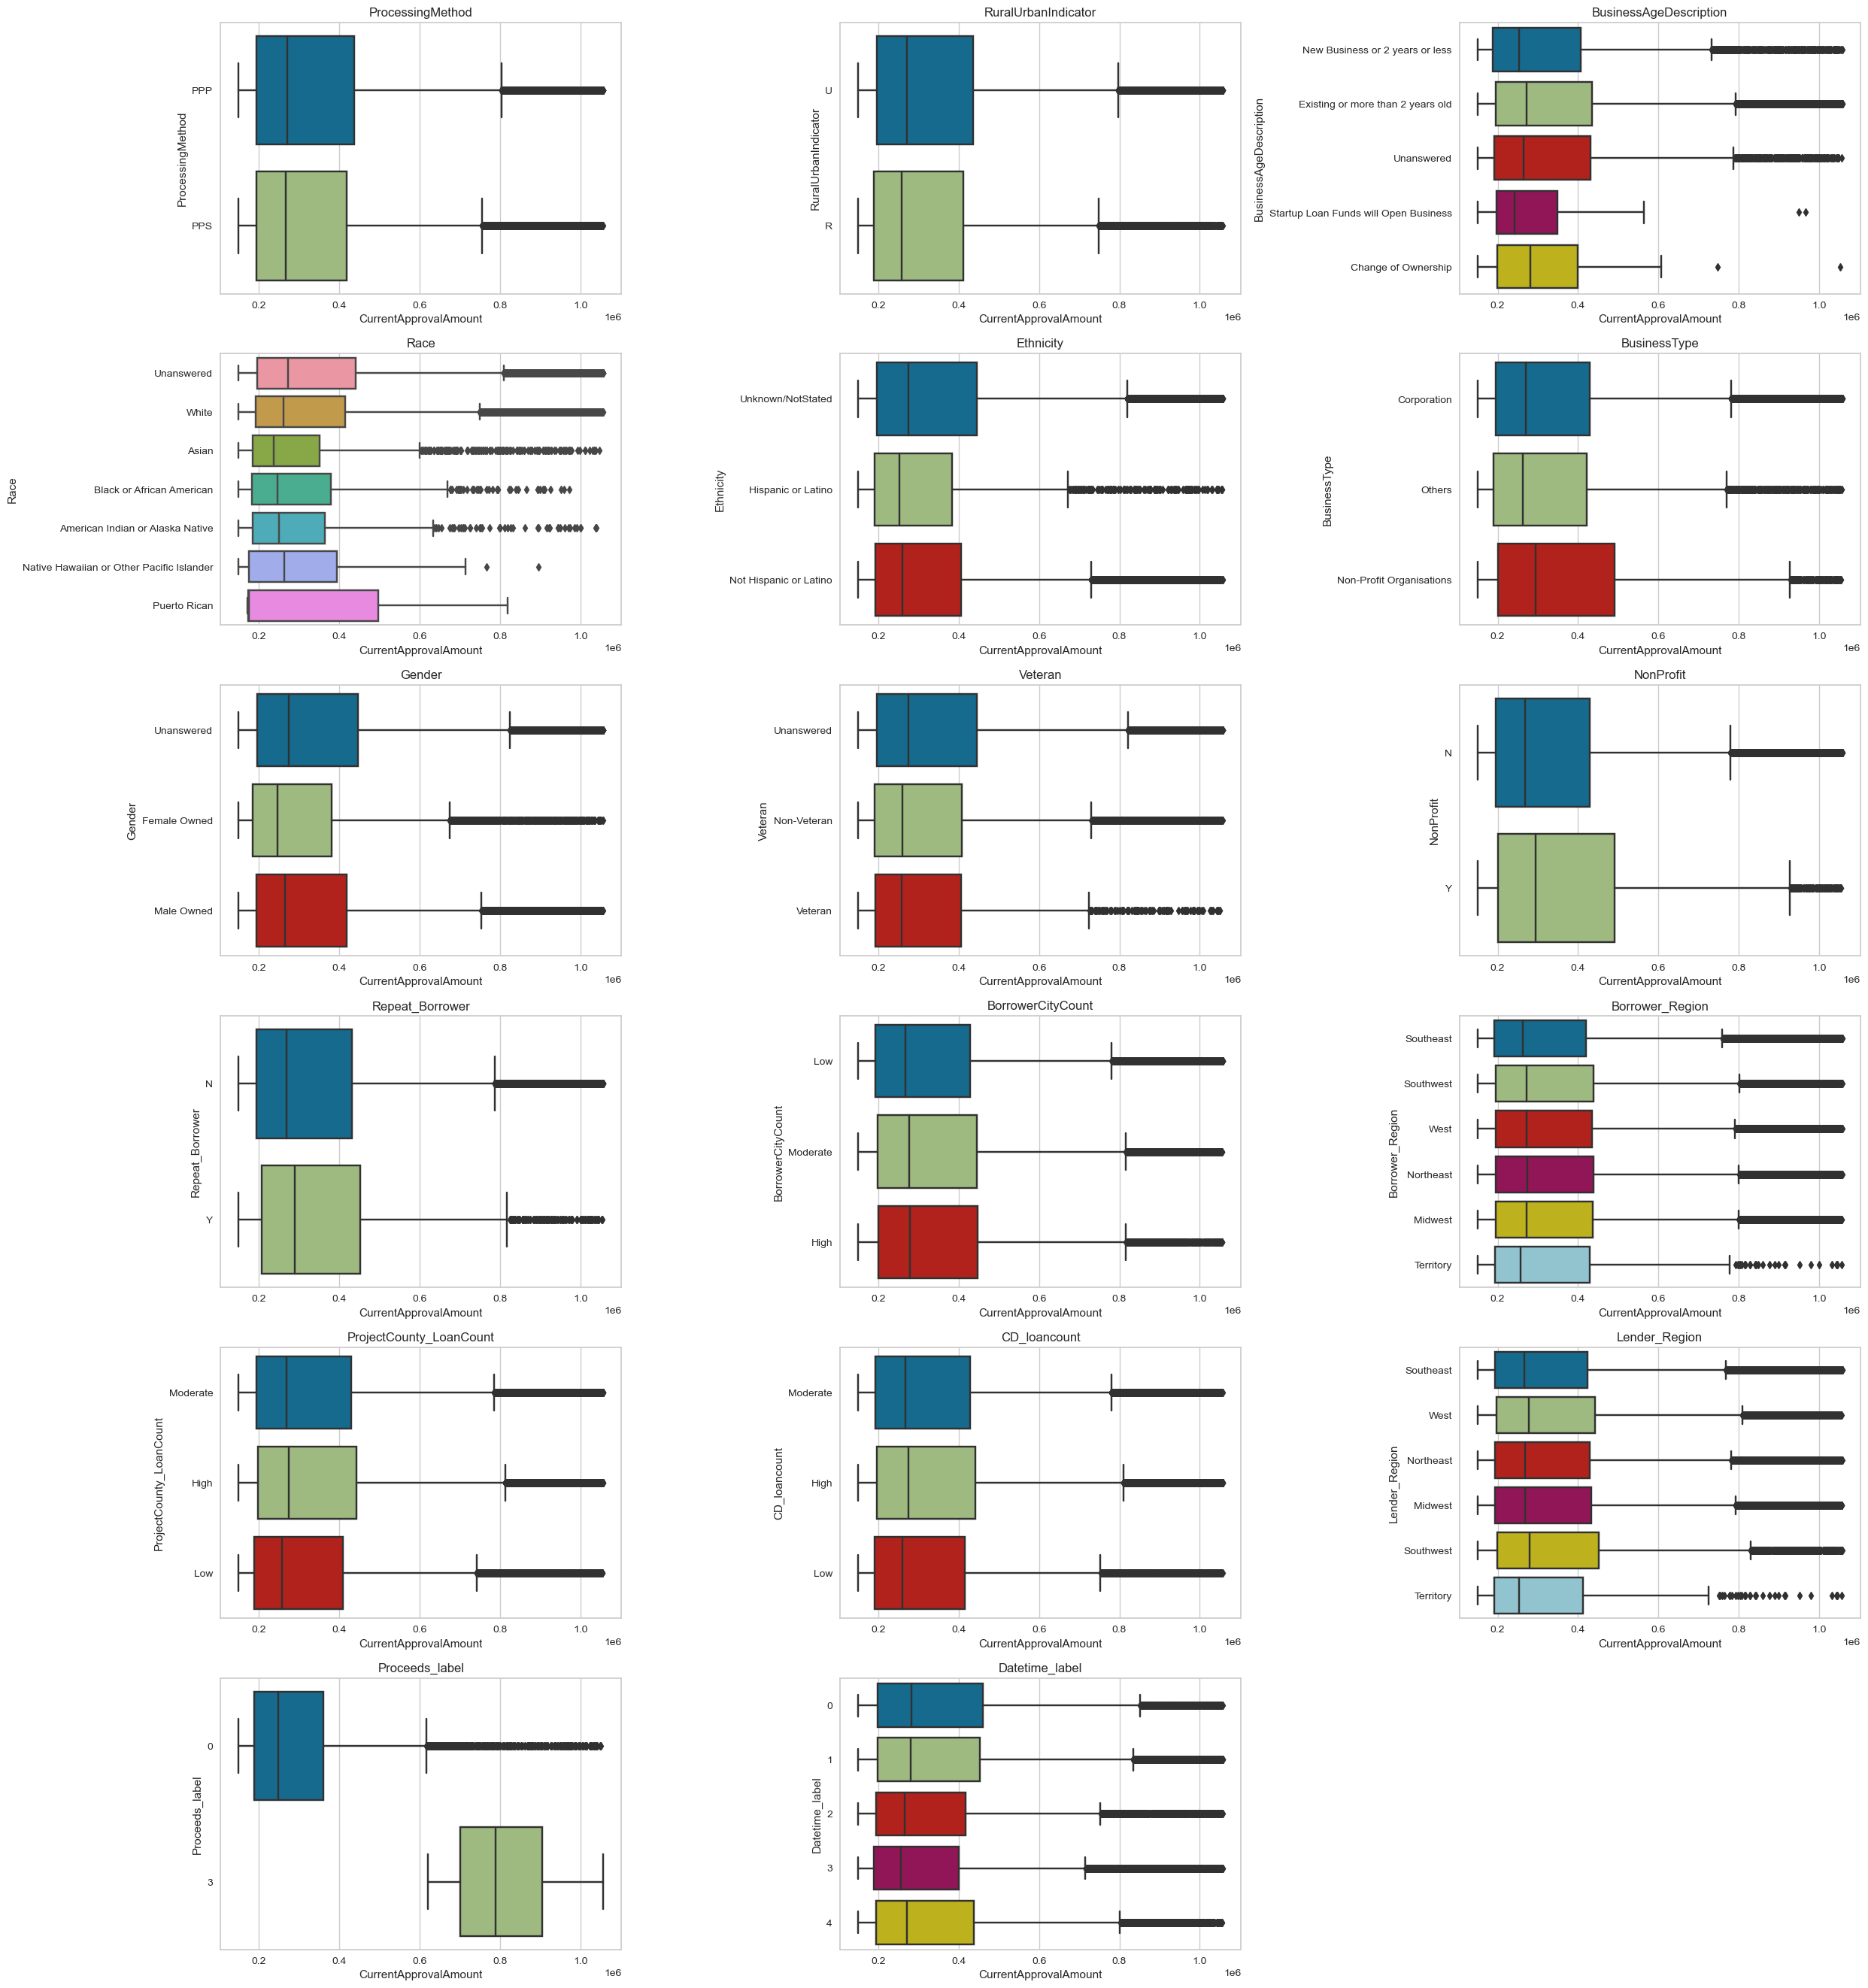

In [77]:
plt.figure(figsize=(25,35))

it=1
for i in catcols:
    plt.subplot(8,3,it)
    sns.boxplot(x='CurrentApprovalAmount',y=i,
                data=wt_outliers,orient='h')
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

**OUTLIERS DATA**

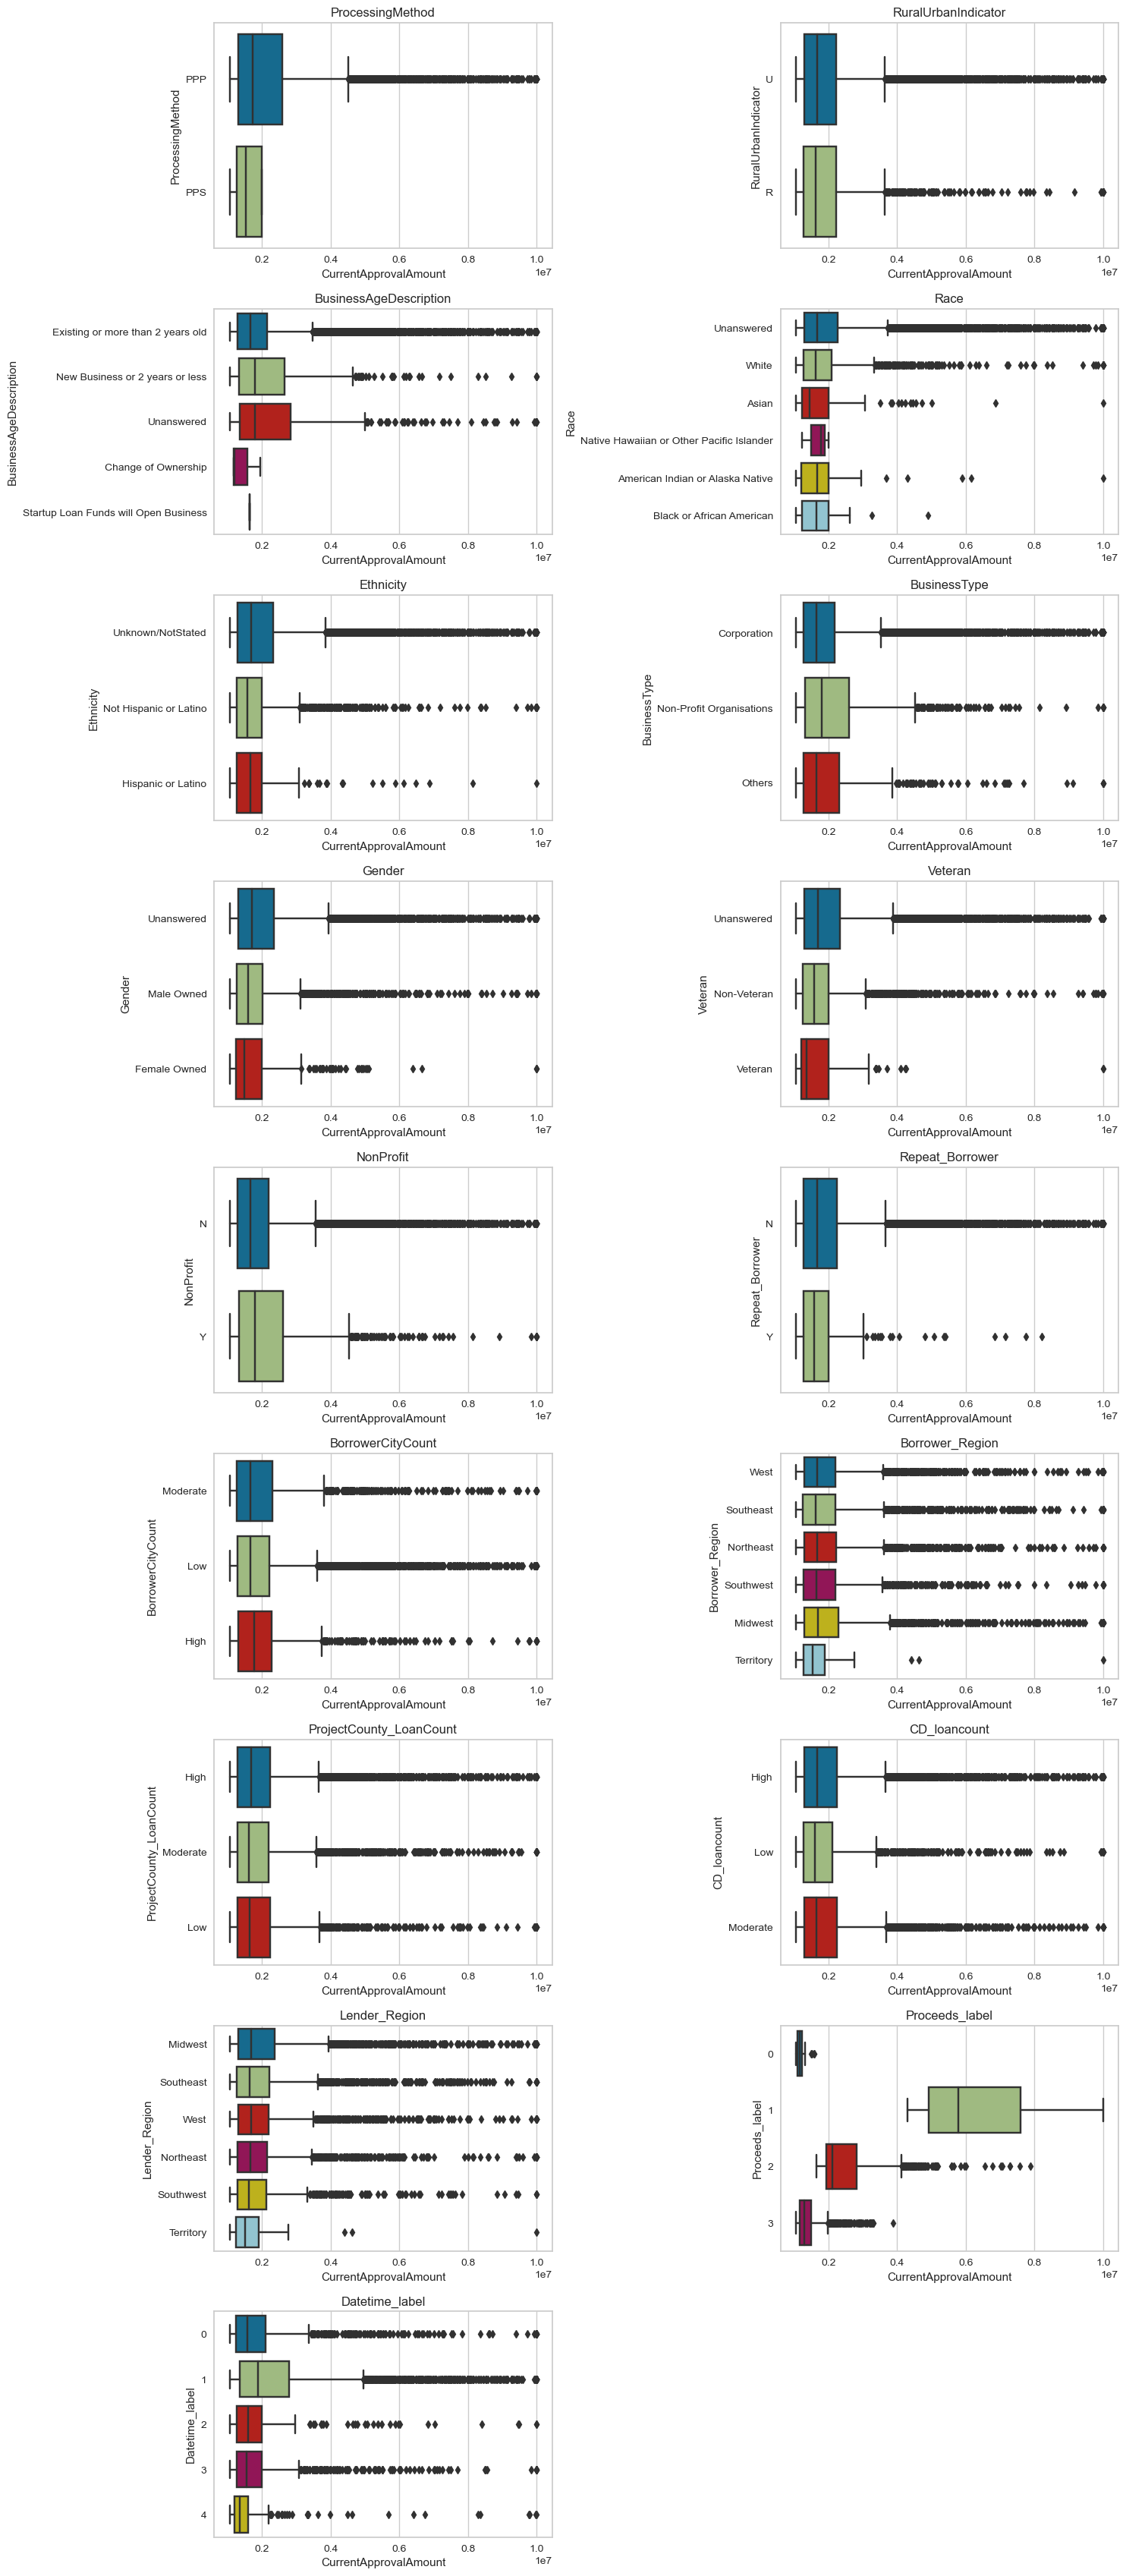

In [78]:
plt.figure(figsize=(15,45))

it=1
for i in catcols:
    plt.subplot(12,2,it)
    sns.boxplot(x='CurrentApprovalAmount',y=i,
                data=outliers,orient='h')
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

**Inferences of Categorical Bivariate Analysis**
* All the categories under variables LoanStatus, RuralUrabnIndicator, LMIIndicator, HubzoneIndicator have **high amount of Outliers**.
* The **PPP** loan processing method has **higher no. of outliers**.
* Businesses that come under **Existing or more than 2 years** old category have a **huge no. of outliers**. **StartUp Loan Funds and Change of ownership businesses** do not have loans approved with large amount of sum.
* Most of the business owners who **have not declared their RACE** got **outlier loan amounts**. Among the ones who declared, **Islanders(Native Hawaiian and Other Pacific Islanders) and Puerto Ricans** have almost **negligible large amount loans**.
* **Ethinicity** has **No impact** on the amount of loan.
* **Non-Profit** have **large amount approved in general**. The **Corporations** have **Large no. of outlier loan amounts** .
* The **Female owned and Veteran owned Businesses** have a **lesser share** of high amount outlier loans.
* Profit and Non-profit organisation status has **no impact** on the loan amount.
* **As we can see that we can not properly identify any pattern from this data, we will transform the data and perform the Analysis Again.**

**Bivariate Analysis for numerical Columns**

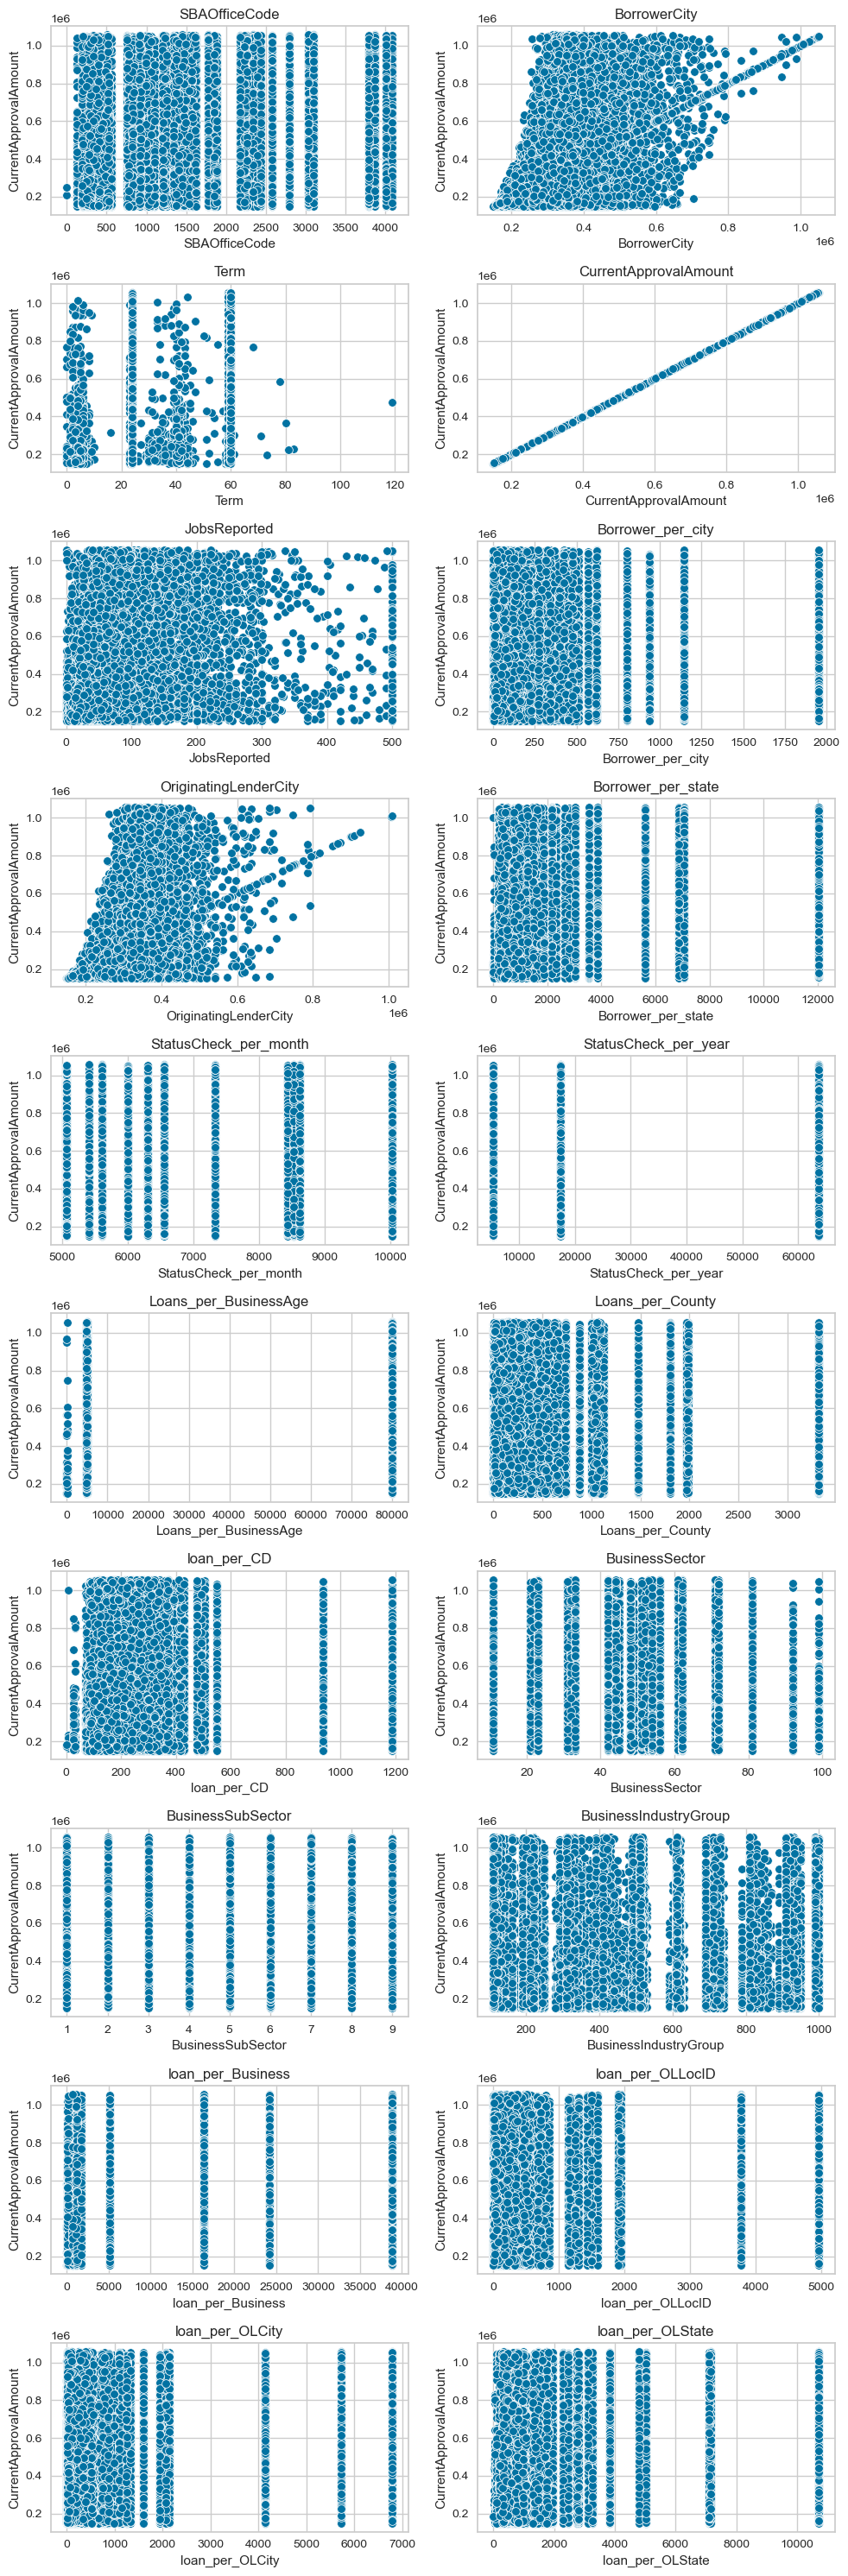

In [79]:
plt.figure(figsize=(10,30))

it=1
for i in numcols:
    plt.subplot(10,2,it)
    sns.scatterplot(x=wt_outliers[i].dropna(),y=wt_outliers.CurrentApprovalAmount,data=wt_outliers)
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

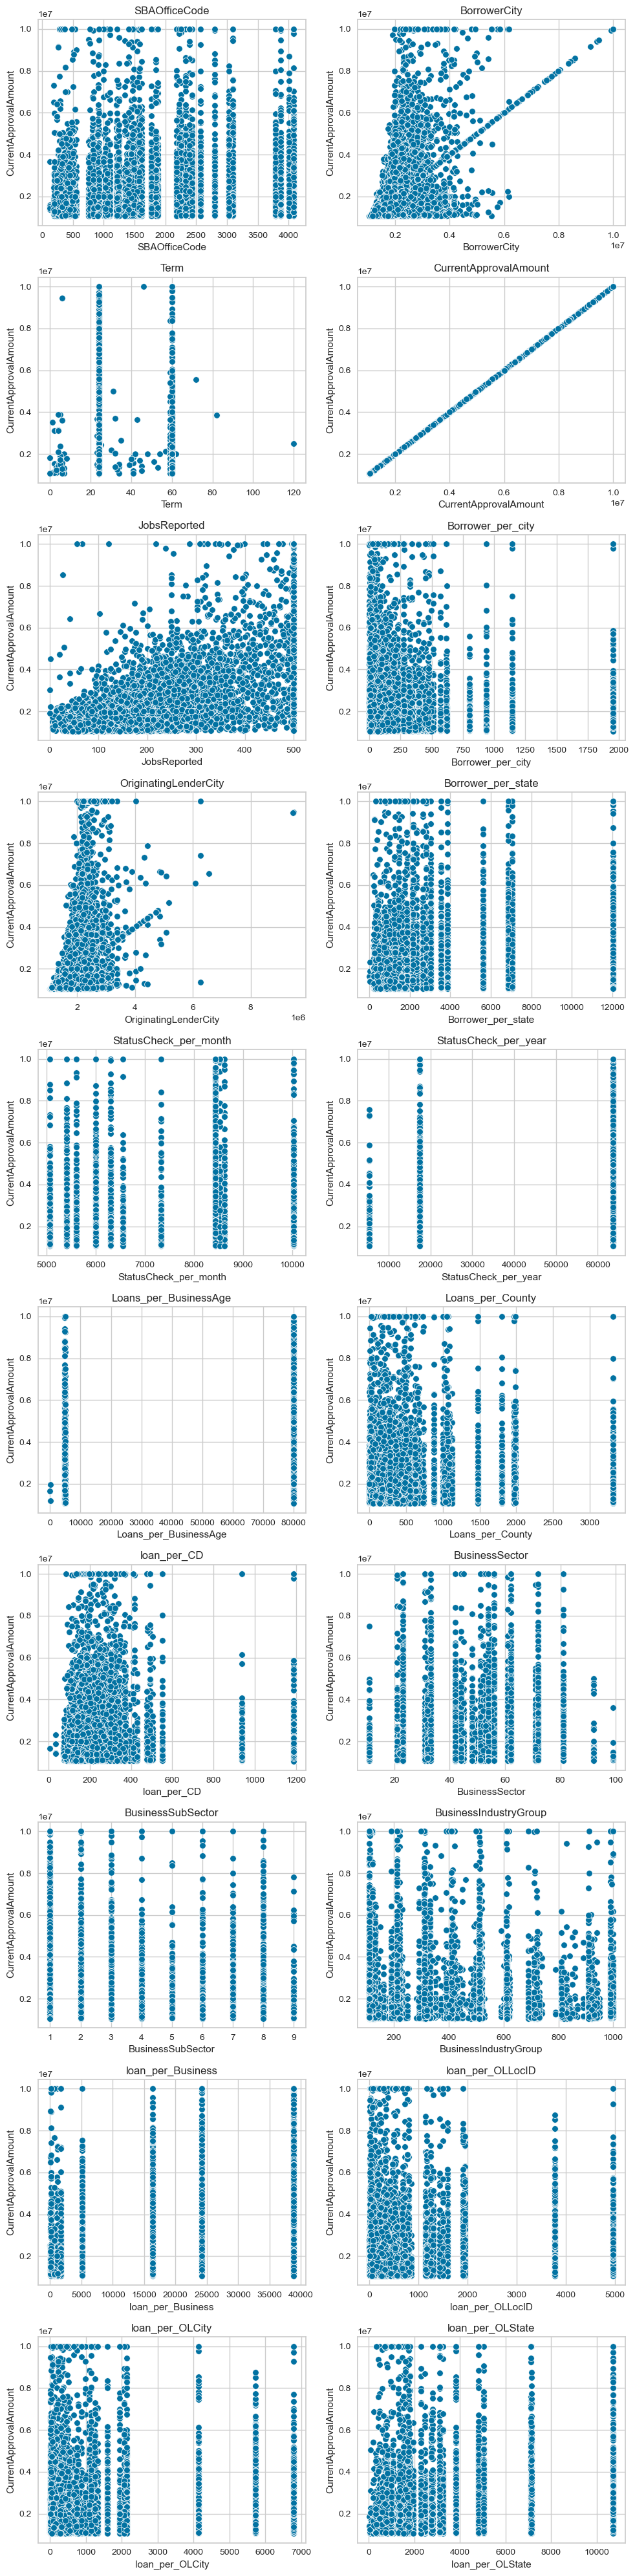

In [80]:
plt.figure(figsize=(10,40))

it=1
for i in numcols:
    plt.subplot(10,2,it)
    sns.scatterplot(x=outliers[i].dropna(),y=outliers.CurrentApprovalAmount,data=outliers)
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

**Inferences of Numerical Bivariate Analysis**
* Some Terms have **0** current loan amounts.
* Initial Approval Amount has a **very strong positive linear relationship** with the Target.
* With **increasing** Jobs Reported, the **loan amount also increases**.
* Payroll proceed, Forgiveness Amount  have a **strong positive linear relation** with the Target. Some values **have zero current Approval Amounts** as well.

**Correlation Matrix**

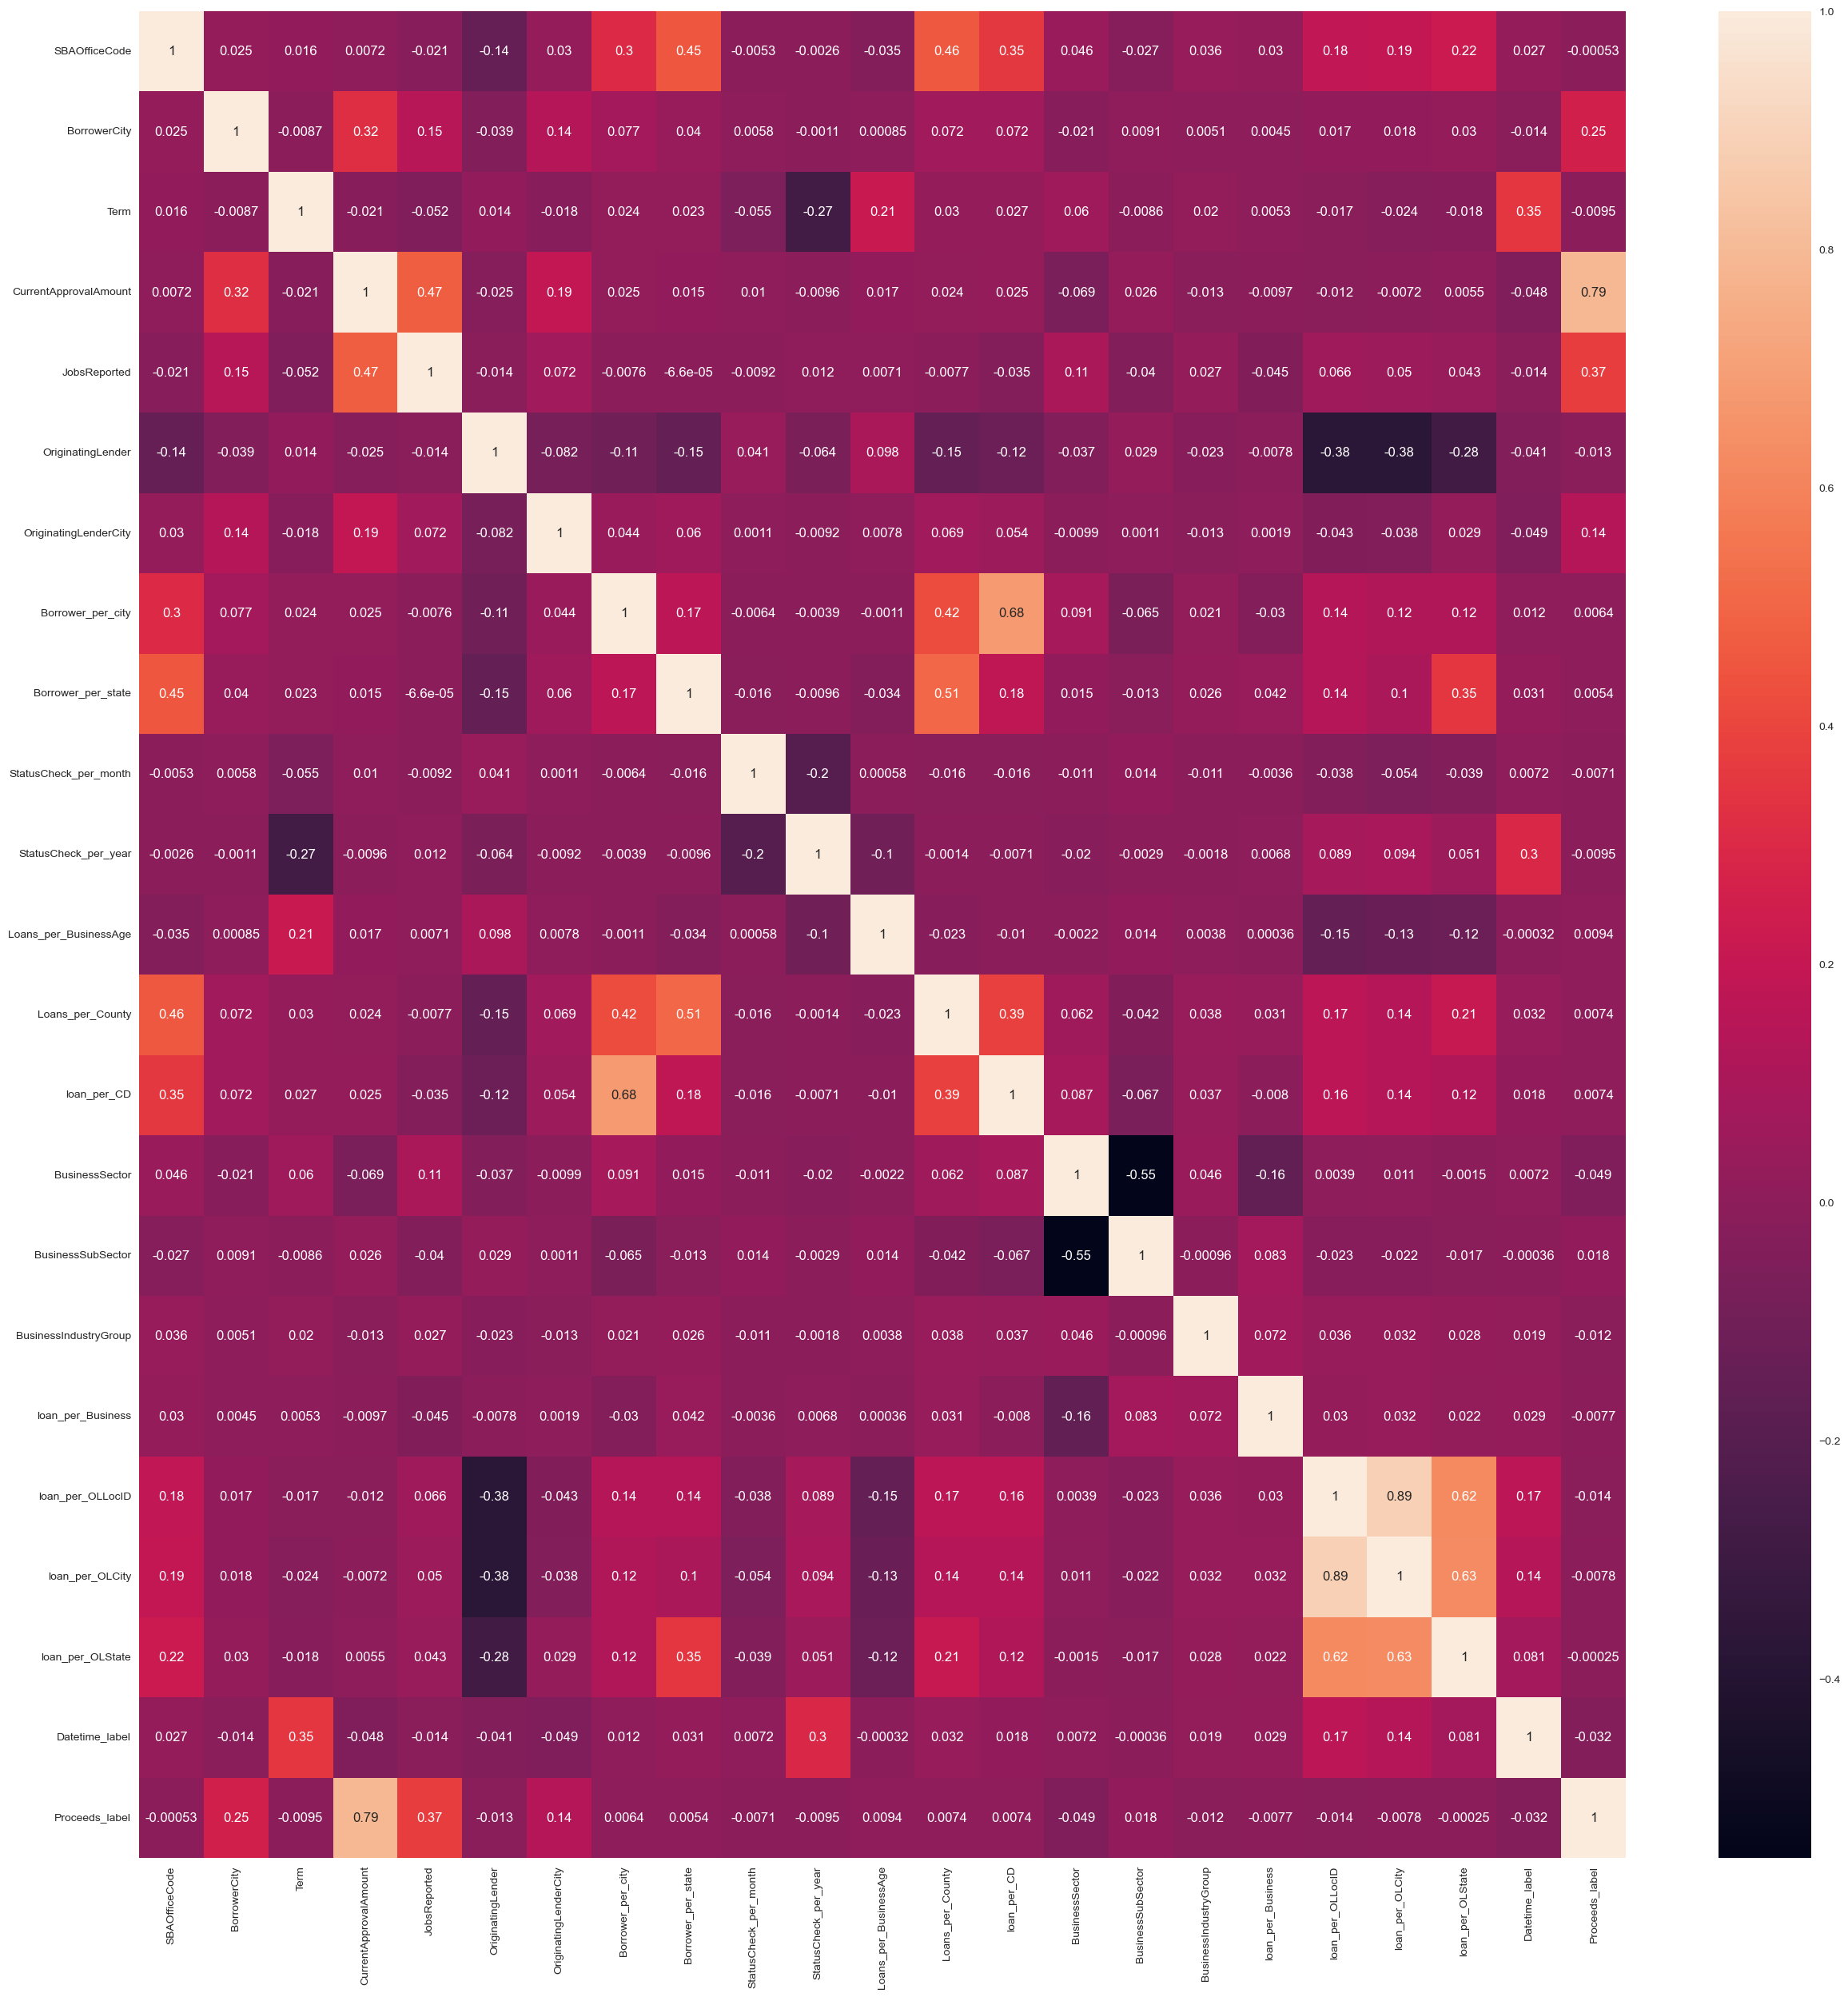

In [81]:
plt.figure(figsize=(30,30))
sns.heatmap(wt_outliers.corr(),annot=True)
plt.show()

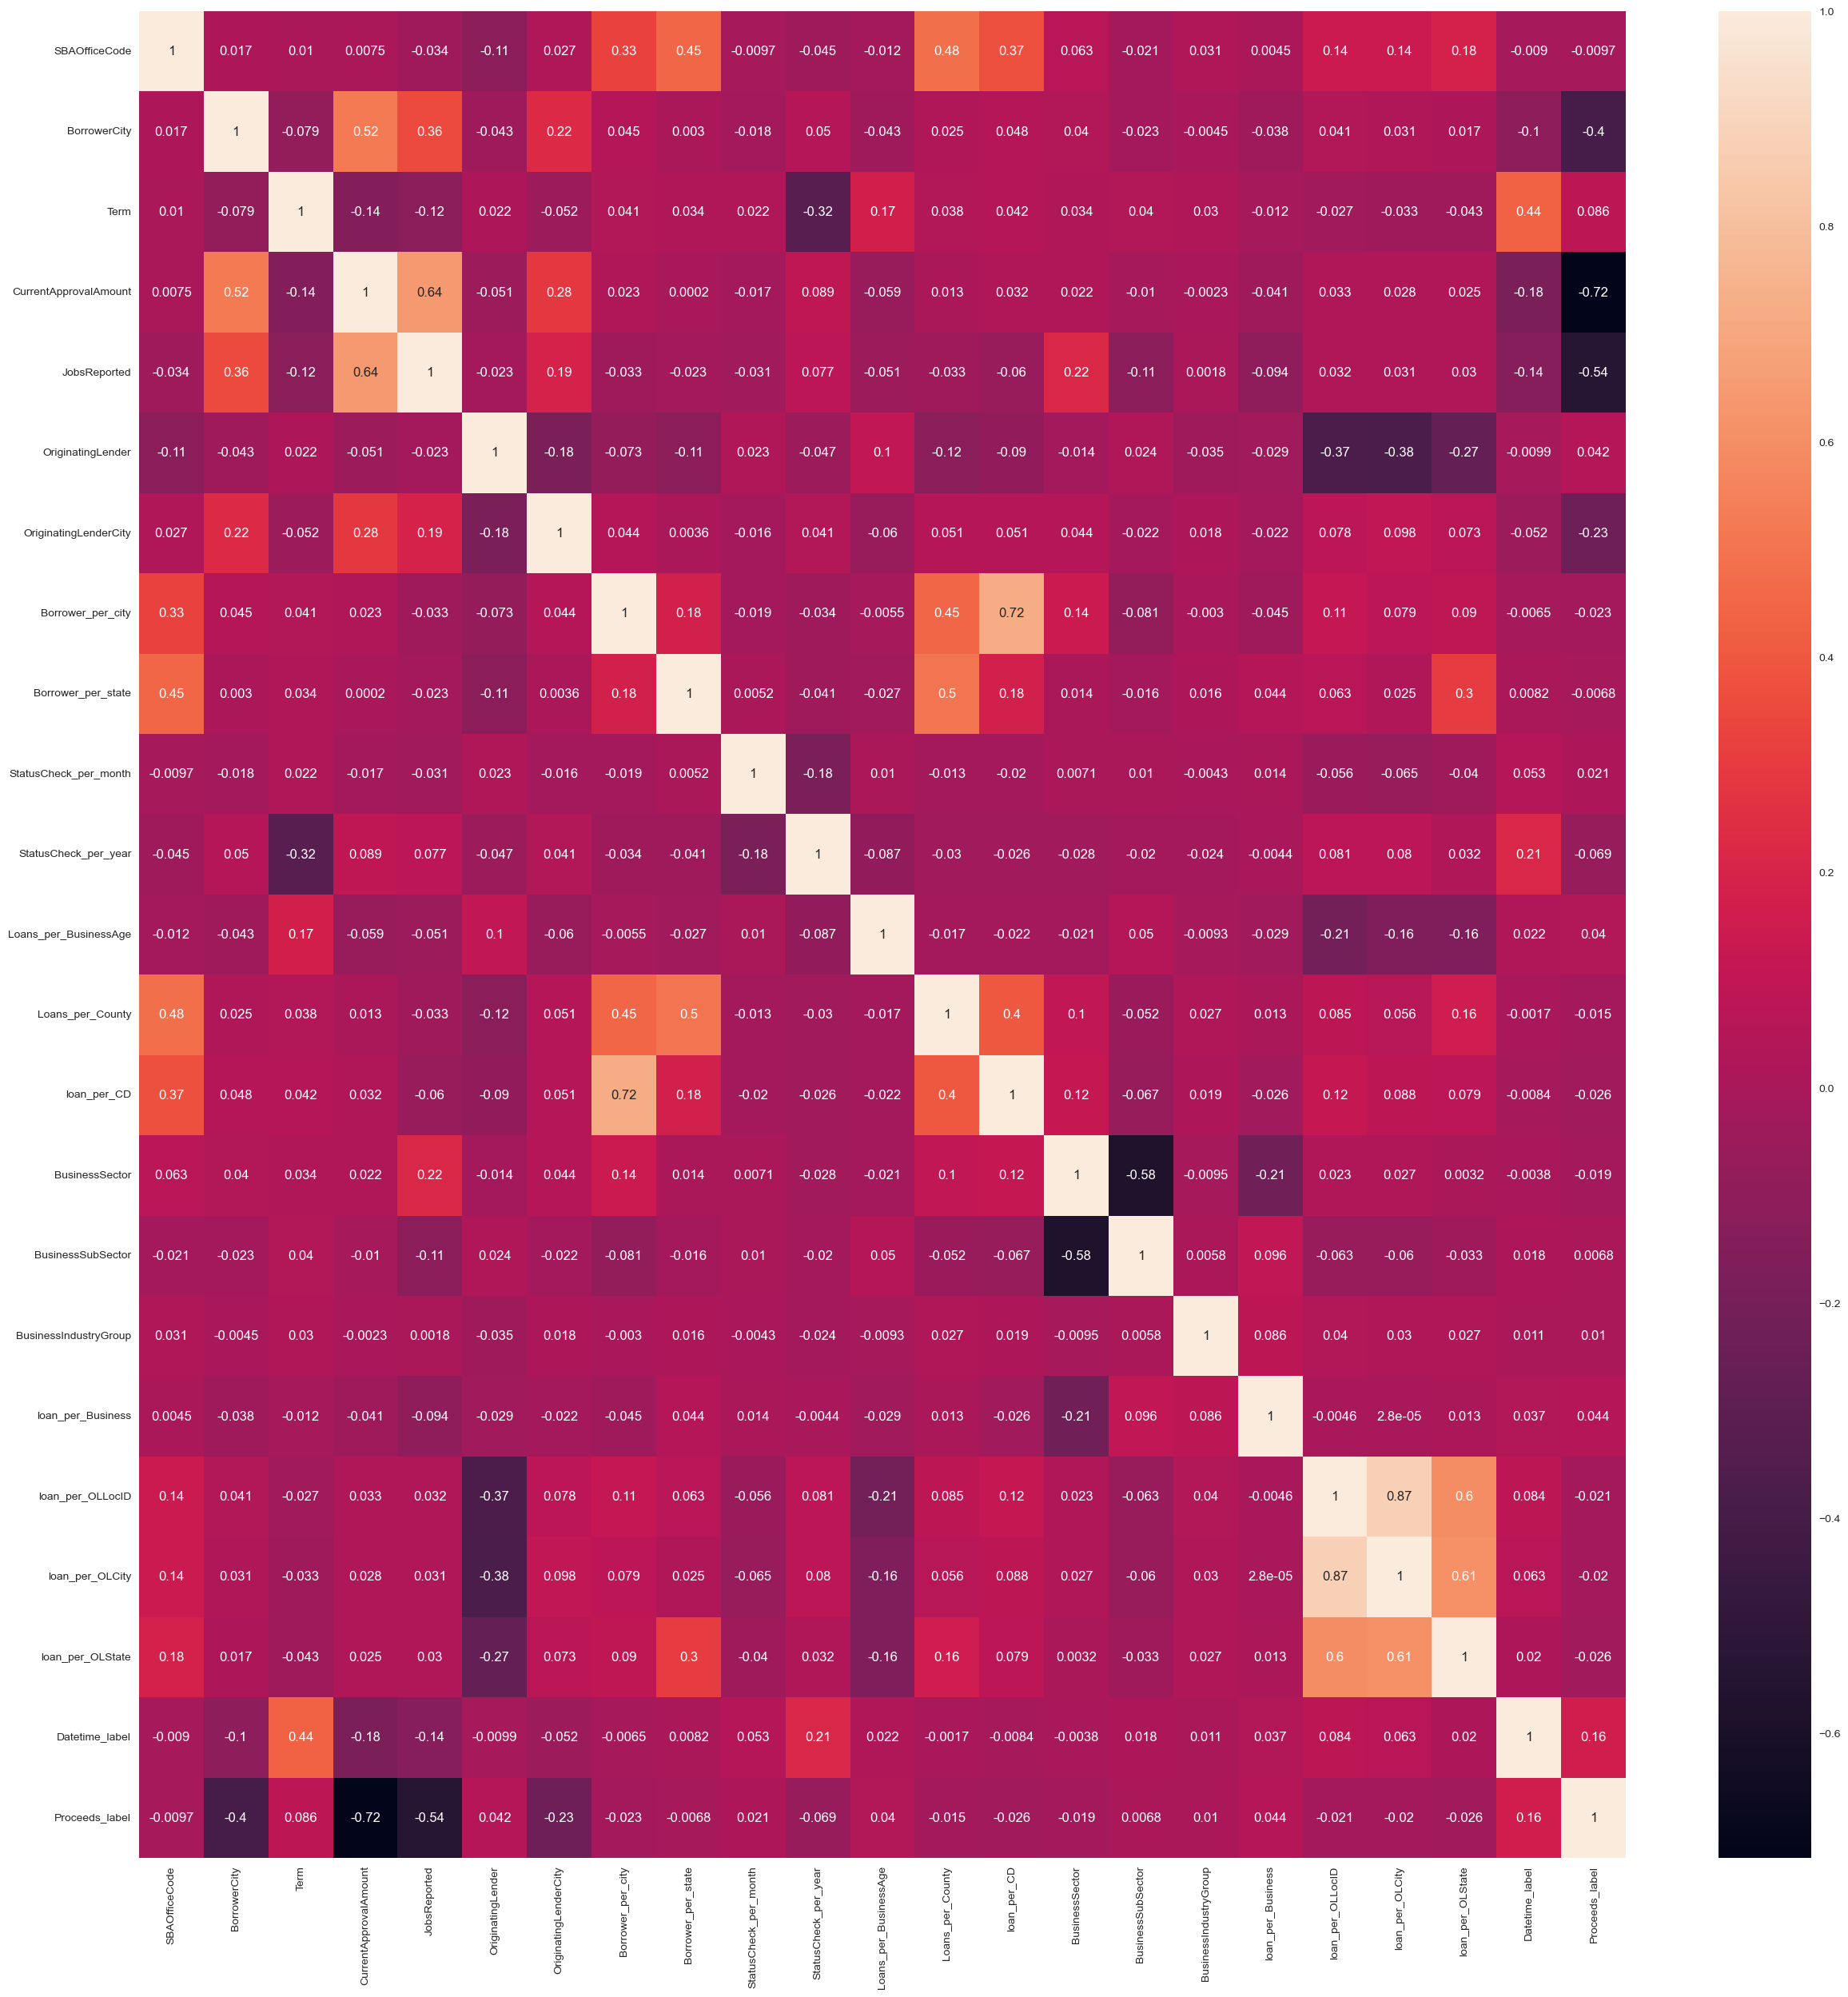

In [82]:
plt.figure(figsize=(30,30))
sns.heatmap(outliers.corr(),annot=True)
plt.show()

# Scaling and Encoding

In [83]:
#Encoding the region Columns
ppp['Borrower_Region']=pd.factorize(ppp.Borrower_Region)[0]
ppp['Lender_Region']=pd.factorize(ppp.Lender_Region)[0]

**Train Test Split**

In [84]:
#Train test Split of whole data.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform

X=ppp.drop('CurrentApprovalAmount',axis=1)
y=ppp.CurrentApprovalAmount

for i in numcols:
    if i!='CurrentApprovalAmount':
        X[i]=power_transform(pd.DataFrame(X[i]))
        
X=pd.get_dummies(X,drop_first=True)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=42)

In [85]:
#Train test Split of wt_outliers data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform

X_wt=wt_outliers.drop('CurrentApprovalAmount',axis=1)
y_wt=wt_outliers.CurrentApprovalAmount

for i in numcols:
    if i!='CurrentApprovalAmount':
        X_wt[i]=power_transform(pd.DataFrame(X_wt[i]))
        
X_wt=pd.get_dummies(X_wt,drop_first=True)

xtrain_wt,xtest_wt,ytrain_wt,ytest_wt=train_test_split(X_wt,y_wt,test_size=0.20,random_state=42)

In [86]:
#Train test Split of outliers data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform

X_o=outliers.drop('CurrentApprovalAmount',axis=1)
y_o=outliers.CurrentApprovalAmount

for i in numcols:
    if i!='CurrentApprovalAmount':
        X_o[i]=power_transform(pd.DataFrame(X_o[i]))
        
X_o=pd.get_dummies(X_o,drop_first=True)

xtrain_o,xtest_o,ytrain_o,ytest_o=train_test_split(X_o,y_o,test_size=0.20,random_state=42)

# Base Model

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
#OLS Model for wt outliers data

from statsmodels.api import OLS, add_constant
xtrain_wtc=add_constant(xtrain_wt)
xtest_wtc=add_constant(xtest_wt)
ols_wt=OLS(ytrain_wt,xtrain_wtc).fit()
olspred_wt=ols_wt.predict(xtest_wtc)
print('rmse:: ',np.sqrt(mean_squared_error(ytest_wt,olspred_wt)))
ols_wt.summary()

rmse::  106848.4985726764


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CurrentApprovalAmount   R-squared:                       0.738
Model:                               OLS   Adj. R-squared:                  0.738
Method:                    Least Squares   F-statistic:                     3195.
Date:                   Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                           13:50:48   Log-Likelihood:            -8.3853e+05
No. Observations:                  64540   AIC:                         1.677e+06
Df Residuals:                      64482   BIC:                         1.678e+06
Df Model:                             57                                         
Covariance Type:               nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         1.655e+05   4517.958     36.639      0.000    1.57e+05    1.74e+05
SBAOfficeCode                                                 2009.2012    612.688      3.279      0.001     808.332    3210.071
BorrowerCity                                                  2.036e+04    447.965     45.455      0.000    1.95e+04    2.12e+04
Term                                                          4031.2938    814.406      4.950      0.000    2435.057    5627.530
JobsReported                                                  7.059e+04    478.760    147.445      0.000    6.97e+04    7.15e+04
OriginatingLender                                               -1.8258      1.088     -1.678      0.093      -3.958       0.307
OriginatingLenderCity                                         1.044e+04    434.734     24.005      0.000    9583.601    1.13e+04
Borrower_per_city                                              216.9812    690.883      0.314      0.753   -1137.149    1571.112
Borrower_per_state                                            -327.8708    681.118     -0.481      0.630   -1662.862    1007.121
StatusCheck_per_month                                         3151.6932    439.007      7.179      0.000    2291.240    4012.146
StatusCheck_per_year                                          2132.8536    510.935      4.174      0.000    1131.420    3134.287
Loans_per_BusinessAge                                         -5.05e+04   6861.237     -7.360      0.000   -6.39e+04    -3.7e+04
Loans_per_County                                              1827.3117   1035.685      1.764      0.078    -202.631    3857.254
loan_per_CD                                                   5863.1879    897.297      6.534      0.000    4104.485    7621.891
BusinessSector                                               -2.163e+04    512.735    -42.193      0.000   -2.26e+04   -2.06e+04
BusinessSubSector                                            -8289.5834    482.471    -17.182      0.000   -9235.227   -7343.940
BusinessIndustryGroup                                        -6.138e-10   4.76e-10     -1.290      0.197   -1.55e-09    3.19e-10
loan_per_Business                                             1544.5766    574.928      2.687      0.007     417.717    2671.436
loan_per_OLLocID                                              1927.0038   1193.679      1.614      0.106    -412.608    4266.616
loan_per_OLCity                                              -2650.4676   1046.691     -2.532      0.011   -4701.983    -598.952
loan_per_OLState                                             -1220.6098    593.875 

In [89]:
xtrain_wt.drop(['Borrower_per_city','Borrower_per_state','BusinessIndustryGroup',
                'ProcessingMethod_PPS',
           'BusinessAgeDescription_Startup Loan Funds will Open Business',
           'BusinessAgeDescription_Unanswered','Race_Black or African American',
           'Race_Native Hawaiian or Other Pacific Islander','Race_Puerto Rican',
           'Race_Unanswered','Race_White','Veteran_Veteran','Repeat_Borrower_Y',
           'BorrowerCityCount_Moderate','Borrower_Region_Southeast','Borrower_Region_Territory',
           'ProjectCounty_LoanCount_Low','ProjectCounty_LoanCount_Moderate','CD_loancount_Low',
           'Lender_Region_Northeast','Lender_Region_Southeast'],axis=1,inplace=True)
xtest_wt.drop(['Borrower_per_city','Borrower_per_state','BusinessIndustryGroup','ProcessingMethod_PPS',
           'BusinessAgeDescription_Startup Loan Funds will Open Business',
           'BusinessAgeDescription_Unanswered','Race_Black or African American',
           'Race_Native Hawaiian or Other Pacific Islander','Race_Puerto Rican',
           'Race_Unanswered','Race_White','Veteran_Veteran','Repeat_Borrower_Y',
           'BorrowerCityCount_Moderate','Borrower_Region_Southeast','Borrower_Region_Territory',
           'ProjectCounty_LoanCount_Low','ProjectCounty_LoanCount_Moderate','CD_loancount_Low',
           'Lender_Region_Northeast','Lender_Region_Southeast'],axis=1,inplace=True)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(xtrain_wt.values,i) for i in range(xtrain_wt.shape[1])]
pd.DataFrame({'Features':xtrain_wt.columns,'vif':vif})

Features        vif
0                                       SBAOfficeCode   1.395255
1                                        BorrowerCity   1.109746
2                                                Term   1.512228
3                                        JobsReported   1.308297
4                                   OriginatingLender   3.444802
5                               OriginatingLenderCity   1.084324
6                               StatusCheck_per_month   1.094611
7                                StatusCheck_per_year   1.434404
8                               Loans_per_BusinessAge  11.106477
9                                    Loans_per_County   1.979959
10                                        loan_per_CD   1.530771
11                                     BusinessSector   1.485823
12                                  BusinessSubSector   1.328884
13                                  loan_per_Business   1.881563
14                                   loan_per_OLLocID   8.064599
15                                    loan_per_OLCity   5.934404
16                                   loan_per_OLState   1.618794
17                                     Datetime_label   4.920465
18                                     Proceeds_label   1.450602
19                              RuralUrbanIndicator_U   9.086982
20  BusinessAgeDescription_Existing or more than 2...  79.295002
21  BusinessAgeDescription_New Business or 2 years...   2.129083
22                                         Race_Asian   1.085111
23                   Ethnicity_Not Hispanic or Latino  12.185304
24                        Ethnicity_Unknown/NotStated  34.433820
25              BusinessType_Non-Profit Organisations        inf
26                                BusinessType_Others   1.624886
27                                  Gender_Male Owned   5.248740
28                                  Gender_Unanswered  14.007299
29                                 Veteran_Unanswered   9.150438
30                                        NonProfit_Y        inf
31                              BorrowerCityCount_Low   5.705568
32                          Borrower_Region_Northeast   1.606787
33                          Borrower_Region_Southwest   2.373224
34                               Borrower_Region_West   2.922634
35                              CD_loancount_Moderate   1.608031
36                            Lender_Region_Southwest   2.214824
37                            Lender_Region_Territory   1.070302
38                                 Lender_Region_West   2.354894

In [91]:
xtrain_wt.drop(['Loans_per_BusinessAge','Ethnicity_Unknown/NotStated',
                'Gender_Unanswered',
                'BusinessAgeDescription_Existing or more than 2 years old',
                'BusinessType_Non-Profit Organisations','NonProfit_Y'],axis=1,inplace=True)
xtest_wt.drop(['Loans_per_BusinessAge','Ethnicity_Unknown/NotStated',
               'Gender_Unanswered',
                'BusinessAgeDescription_Existing or more than 2 years old',
                'BusinessType_Non-Profit Organisations','NonProfit_Y'],axis=1,inplace=True)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(xtrain_wt.values,i) for i in range(xtrain_wt.shape[1])]
pd.DataFrame({'Features':xtrain_wt.columns,'vif':vif})

Features       vif
0                                       SBAOfficeCode  1.394628
1                                        BorrowerCity  1.109568
2                                                Term  1.459204
3                                        JobsReported  1.305565
4                                   OriginatingLender  3.301932
5                               OriginatingLenderCity  1.083940
6                               StatusCheck_per_month  1.092067
7                                StatusCheck_per_year  1.404955
8                                    Loans_per_County  1.956981
9                                         loan_per_CD  1.528947
10                                     BusinessSector  1.401183
11                                  BusinessSubSector  1.302803
12                                  loan_per_Business  1.399720
13                                   loan_per_OLLocID  8.004947
14                                    loan_per_OLCity  5.929961
15                                   loan_per_OLState  1.612145
16                                     Datetime_label  4.408280
17                                     Proceeds_label  1.441175
18                              RuralUrbanIndicator_U  6.572171
19  BusinessAgeDescription_New Business or 2 years...  1.124547
20                                         Race_Asian  1.083863
21                   Ethnicity_Not Hispanic or Latino  2.287933
22                                BusinessType_Others  1.435985
23                                  Gender_Male Owned  2.522227
24                                 Veteran_Unanswered  4.751311
25                              BorrowerCityCount_Low  4.975988
26                          Borrower_Region_Northeast  1.575846
27                          Borrower_Region_Southwest  2.343640
28                               Borrower_Region_West  2.903358
29                              CD_loancount_Moderate  1.594499
30                            Lender_Region_Southwest  2.213311
31                            Lender_Region_Territory  1.048291
32                                 Lender_Region_West  2.346408

In [93]:
#All other models for the wt_outliers data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

lg=LinearRegression()
sgd=SGDRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbm=GradientBoostingRegressor()
xgb=XGBRegressor()
lgbm=LGBMRegressor()
catboost=CatBoostRegressor()
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()

m_list=[lg,ridge,lasso,enet,sgd,dt,rf,gbm,xgb,lgbm,catboost]

In [94]:
def validation_wt(tr_pred,tr,t_pred,t):
    r2_test=round(r2_score(t,t_pred),4)
    r2_train=round(r2_score(tr,tr_pred),4)
    n=xtest_wt.shape[0]
    p=xtest_wt.shape[1]
    adj_R2_test=round(1-(((1-r2_test)*(n-1))/(n-p-1)),4)
    adj_R2_train=round(1-(((1-r2_train)*(n-1))/(n-p-1)),4)
    print('R2 Test :: ',r2_test)
    print('R2 Train :: ',r2_train)
    print('Adj R2 Test:: ',adj_R2_test)
    print('Adj R2 Train:: ',adj_R2_train)
    rmse_train=round(np.sqrt(mean_squared_error(tr,tr_pred)),4)
    print('Train RMSE :: ',rmse_train)
    rmse_test=round(np.sqrt(mean_squared_error(t,t_pred)),4)
    print('Test RMSE :: ',rmse_test)
    print()
    print()
    
def models(model,xtrain,ytrain,xtest,ytest):
    print('%s'%model)
    model_s=model.fit(xtrain,ytrain)
    tr_pred=model_s.predict(xtrain)
    t_pred=model_s.predict(xtest)
    validation_wt(tr_pred,ytrain,t_pred,ytest)

for i in m_list:
    models(i,xtrain_wt,ytrain_wt,xtest_wt,ytest_wt)

LinearRegression()
R2 Test ::  0.7296
R2 Train ::  0.738
Adj R2 Test::  0.729
Adj R2 Train::  0.7375
Train RMSE ::  106330.2929
Test RMSE ::  106924.1793


Ridge()
R2 Test ::  0.7296
R2 Train ::  0.738
Adj R2 Test::  0.729
Adj R2 Train::  0.7375
Train RMSE ::  106330.2935
Test RMSE ::  106924.2605


Lasso()
R2 Test ::  0.7296
R2 Train ::  0.738
Adj R2 Test::  0.729
Adj R2 Train::  0.7375
Train RMSE ::  106330.2954
Test RMSE ::  106924.223


ElasticNet()
R2 Test ::  0.6781
R2 Train ::  0.6813
Adj R2 Test::  0.6774
Adj R2 Train::  0.6806
Train RMSE ::  117272.4319
Test RMSE ::  116667.3253


SGDRegressor()
R2 Test ::  -294270608517319.8
R2 Train ::  -291784163176448.06
Adj R2 Test::  -294873696958573.8
Adj R2 Train::  -292382155809960.9
Train RMSE ::  3548656191649.8823
Test RMSE ::  3527351215570.6343


DecisionTreeRegressor()
R2 Test ::  0.5395
R2 Train ::  1.0
Adj R2 Test::  0.5386
Adj R2 Train::  1.0
Train RMSE ::  279.4751
Test RMSE ::  139541.1678


RandomForestRegressor()
R2 Test 

108:	learn: 97822.7791917	total: 3.17s	remaining: 25.9s
109:	learn: 97804.5781675	total: 3.21s	remaining: 26s
110:	learn: 97778.1541032	total: 3.25s	remaining: 26s
111:	learn: 97762.2810745	total: 3.27s	remaining: 25.9s
112:	learn: 97739.0936717	total: 3.29s	remaining: 25.8s
113:	learn: 97727.1199306	total: 3.31s	remaining: 25.7s
114:	learn: 97705.7521758	total: 3.33s	remaining: 25.6s
115:	learn: 97684.6429123	total: 3.35s	remaining: 25.5s
116:	learn: 97669.2815278	total: 3.37s	remaining: 25.5s
117:	learn: 97655.7473863	total: 3.4s	remaining: 25.5s
118:	learn: 97643.6360915	total: 3.44s	remaining: 25.5s
119:	learn: 97624.6139402	total: 3.46s	remaining: 25.4s
120:	learn: 97607.7756382	total: 3.48s	remaining: 25.3s
121:	learn: 97558.4481700	total: 3.51s	remaining: 25.3s
122:	learn: 97536.6975064	total: 3.53s	remaining: 25.2s
123:	learn: 97505.6653418	total: 3.56s	remaining: 25.1s
124:	learn: 97475.7704502	total: 3.58s	remaining: 25s
125:	learn: 97457.4255835	total: 3.61s	remaining: 25s
1

259:	learn: 94914.6919303	total: 7.19s	remaining: 20.5s
260:	learn: 94889.8705209	total: 7.23s	remaining: 20.5s
261:	learn: 94873.5431530	total: 7.25s	remaining: 20.4s
262:	learn: 94856.8780948	total: 7.28s	remaining: 20.4s
263:	learn: 94843.5294404	total: 7.3s	remaining: 20.4s
264:	learn: 94831.9647237	total: 7.32s	remaining: 20.3s
265:	learn: 94817.0235051	total: 7.35s	remaining: 20.3s
266:	learn: 94808.8200369	total: 7.37s	remaining: 20.2s
267:	learn: 94788.9889181	total: 7.39s	remaining: 20.2s
268:	learn: 94777.4806132	total: 7.44s	remaining: 20.2s
269:	learn: 94767.6154239	total: 7.46s	remaining: 20.2s
270:	learn: 94754.8750368	total: 7.48s	remaining: 20.1s
271:	learn: 94743.4446282	total: 7.5s	remaining: 20.1s
272:	learn: 94735.0453878	total: 7.53s	remaining: 20s
273:	learn: 94727.4916590	total: 7.55s	remaining: 20s
274:	learn: 94717.8301727	total: 7.58s	remaining: 20s
275:	learn: 94706.1011300	total: 7.61s	remaining: 20s
276:	learn: 94687.9219502	total: 7.64s	remaining: 19.9s
27

413:	learn: 93067.9148767	total: 11.3s	remaining: 16s
414:	learn: 93050.6661370	total: 11.3s	remaining: 16s
415:	learn: 93035.4804492	total: 11.4s	remaining: 16s
416:	learn: 93023.9334193	total: 11.4s	remaining: 15.9s
417:	learn: 93015.6566072	total: 11.4s	remaining: 15.9s
418:	learn: 92996.4963980	total: 11.5s	remaining: 15.9s
419:	learn: 92987.0811282	total: 11.5s	remaining: 15.8s
420:	learn: 92978.9030488	total: 11.5s	remaining: 15.8s
421:	learn: 92967.9545135	total: 11.5s	remaining: 15.8s
422:	learn: 92956.9268667	total: 11.6s	remaining: 15.8s
423:	learn: 92947.0556194	total: 11.6s	remaining: 15.7s
424:	learn: 92936.7338724	total: 11.6s	remaining: 15.7s
425:	learn: 92926.7244607	total: 11.6s	remaining: 15.7s
426:	learn: 92912.5238279	total: 11.7s	remaining: 15.7s
427:	learn: 92903.7656003	total: 11.7s	remaining: 15.6s
428:	learn: 92894.1755705	total: 11.7s	remaining: 15.6s
429:	learn: 92883.8013197	total: 11.7s	remaining: 15.6s
430:	learn: 92867.4087315	total: 11.8s	remaining: 15.6

562:	learn: 91651.8445574	total: 15.3s	remaining: 11.9s
563:	learn: 91639.0549904	total: 15.3s	remaining: 11.9s
564:	learn: 91626.8528288	total: 15.4s	remaining: 11.8s
565:	learn: 91618.7261499	total: 15.4s	remaining: 11.8s
566:	learn: 91609.6461082	total: 15.4s	remaining: 11.8s
567:	learn: 91602.2281971	total: 15.4s	remaining: 11.7s
568:	learn: 91595.4141294	total: 15.5s	remaining: 11.7s
569:	learn: 91588.6682034	total: 15.5s	remaining: 11.7s
570:	learn: 91578.6620677	total: 15.5s	remaining: 11.7s
571:	learn: 91570.2323014	total: 15.6s	remaining: 11.6s
572:	learn: 91562.7996585	total: 15.6s	remaining: 11.6s
573:	learn: 91554.9108374	total: 15.6s	remaining: 11.6s
574:	learn: 91541.2834837	total: 15.6s	remaining: 11.6s
575:	learn: 91533.1012897	total: 15.7s	remaining: 11.5s
576:	learn: 91522.0574883	total: 15.7s	remaining: 11.5s
577:	learn: 91516.9466693	total: 15.7s	remaining: 11.5s
578:	learn: 91511.3777553	total: 15.7s	remaining: 11.4s
579:	learn: 91500.9576735	total: 15.8s	remaining

717:	learn: 90356.4593692	total: 19.6s	remaining: 7.68s
718:	learn: 90350.1960914	total: 19.6s	remaining: 7.66s
719:	learn: 90343.2868945	total: 19.6s	remaining: 7.63s
720:	learn: 90336.8139300	total: 19.6s	remaining: 7.6s
721:	learn: 90329.1014715	total: 19.7s	remaining: 7.58s
722:	learn: 90322.1999092	total: 19.7s	remaining: 7.54s
723:	learn: 90311.2145663	total: 19.7s	remaining: 7.52s
724:	learn: 90307.0810053	total: 19.7s	remaining: 7.49s
725:	learn: 90296.6639474	total: 19.8s	remaining: 7.46s
726:	learn: 90291.6368896	total: 19.8s	remaining: 7.43s
727:	learn: 90281.5176247	total: 19.8s	remaining: 7.41s
728:	learn: 90275.5791087	total: 19.9s	remaining: 7.38s
729:	learn: 90270.2056167	total: 19.9s	remaining: 7.36s
730:	learn: 90260.0816333	total: 19.9s	remaining: 7.33s
731:	learn: 90251.9291038	total: 19.9s	remaining: 7.3s
732:	learn: 90247.3479648	total: 20s	remaining: 7.27s
733:	learn: 90237.4022886	total: 20s	remaining: 7.24s
734:	learn: 90224.6301023	total: 20s	remaining: 7.21s


872:	learn: 89207.6994791	total: 23.8s	remaining: 3.46s
873:	learn: 89196.9622310	total: 23.8s	remaining: 3.43s
874:	learn: 89189.6586403	total: 23.8s	remaining: 3.4s
875:	learn: 89184.6951354	total: 23.9s	remaining: 3.38s
876:	learn: 89174.7297427	total: 23.9s	remaining: 3.35s
877:	learn: 89169.0026494	total: 23.9s	remaining: 3.32s
878:	learn: 89165.5171465	total: 23.9s	remaining: 3.29s
879:	learn: 89157.4056180	total: 23.9s	remaining: 3.27s
880:	learn: 89151.0396356	total: 24s	remaining: 3.24s
881:	learn: 89140.8097618	total: 24s	remaining: 3.21s
882:	learn: 89132.6617901	total: 24s	remaining: 3.19s
883:	learn: 89125.3990570	total: 24.1s	remaining: 3.16s
884:	learn: 89122.0927301	total: 24.1s	remaining: 3.13s
885:	learn: 89112.4337115	total: 24.1s	remaining: 3.1s
886:	learn: 89099.3222408	total: 24.1s	remaining: 3.08s
887:	learn: 89092.8530616	total: 24.2s	remaining: 3.05s
888:	learn: 89082.5081115	total: 24.2s	remaining: 3.02s
889:	learn: 89076.1954266	total: 24.2s	remaining: 2.99s


In [95]:
from sklearn.ensemble import BaggingRegressor
xgb=XGBRegressor()
bg=BaggingRegressor(base_estimator=xgb,random_state=42)
bg.fit(xtrain_wt,ytrain_wt)
tpred=bg.predict(xtest_wt)
trpred=bg.predict(xtrain_wt)
validation_wt(trpred,ytrain_wt,tpred,ytest_wt)

R2 Test ::  0.7784
R2 Train ::  0.834
Adj R2 Test::  0.7779
Adj R2 Train::  0.8337
Train RMSE ::  84642.2126
Test RMSE ::  96791.9852




In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector
lgbm=LGBMRegressor()
sfs=SequentialFeatureSelector(estimator=lgbm,n_jobs=-1,k_features='best',
                              scoring='neg_root_mean_squared_error')
sfs.fit(xtrain_wt,ytrain_wt)

SequentialFeatureSelector(estimator=LGBMRegressor(), k_features=(1, 33),
                          n_jobs=-1, scoring='neg_root_mean_squared_error')

In [97]:
sfs.k_feature_names_

('SBAOfficeCode',
 'BorrowerCity',
 'Term',
 'JobsReported',
 'OriginatingLenderCity',
 'StatusCheck_per_month',
 'StatusCheck_per_year',
 'loan_per_CD',
 'BusinessSector',
 'BusinessSubSector',
 'loan_per_Business',
 'loan_per_OLLocID',
 'Datetime_label',
 'Proceeds_label',
 'RuralUrbanIndicator_U',
 'BusinessAgeDescription_New Business or 2 years or less',
 'Gender_Male Owned',
 'Borrower_Region_Northeast',
 'Lender_Region_Territory',
 'Lender_Region_West')

In [98]:
sfstrain_wt=xtrain_wt.loc[:,['SBAOfficeCode','BorrowerCity', 'Term', 'JobsReported', 'OriginatingLenderCity',
 'StatusCheck_per_month', 'StatusCheck_per_year',
 'loan_per_CD', 'BusinessSector', 'BusinessSubSector', 'loan_per_Business',
 'loan_per_OLLocID', 'Datetime_label', 'Proceeds_label',
 'RuralUrbanIndicator_U', 'BusinessAgeDescription_New Business or 2 years or less',
 'Gender_Male Owned', 'Borrower_Region_Northeast', 'Lender_Region_Territory', 'Lender_Region_West']]

sfstest_wt=xtest_wt.loc[:,['SBAOfficeCode','BorrowerCity', 'Term', 'JobsReported', 'OriginatingLenderCity',
 'StatusCheck_per_month', 'StatusCheck_per_year',
 'loan_per_CD', 'BusinessSector', 'BusinessSubSector', 'loan_per_Business',
 'loan_per_OLLocID', 'Datetime_label', 'Proceeds_label',
 'RuralUrbanIndicator_U', 'BusinessAgeDescription_New Business or 2 years or less',
 'Gender_Male Owned', 'Borrower_Region_Northeast', 'Lender_Region_Territory', 'Lender_Region_West']]

In [99]:
lgbm=LGBMRegressor()
lgbm.fit(sfstrain_wt,ytrain_wt)
tpred=lgbm.predict(sfstest_wt)
trpred=lgbm.predict(sfstrain_wt)
validation_wt(trpred,ytrain_wt,tpred,ytest_wt)

R2 Test ::  0.7762
R2 Train ::  0.8014
Adj R2 Test::  0.7757
Adj R2 Train::  0.801
Train RMSE ::  92581.0144
Test RMSE ::  97267.4608




<Figure size 2000x1000 with 0 Axes>

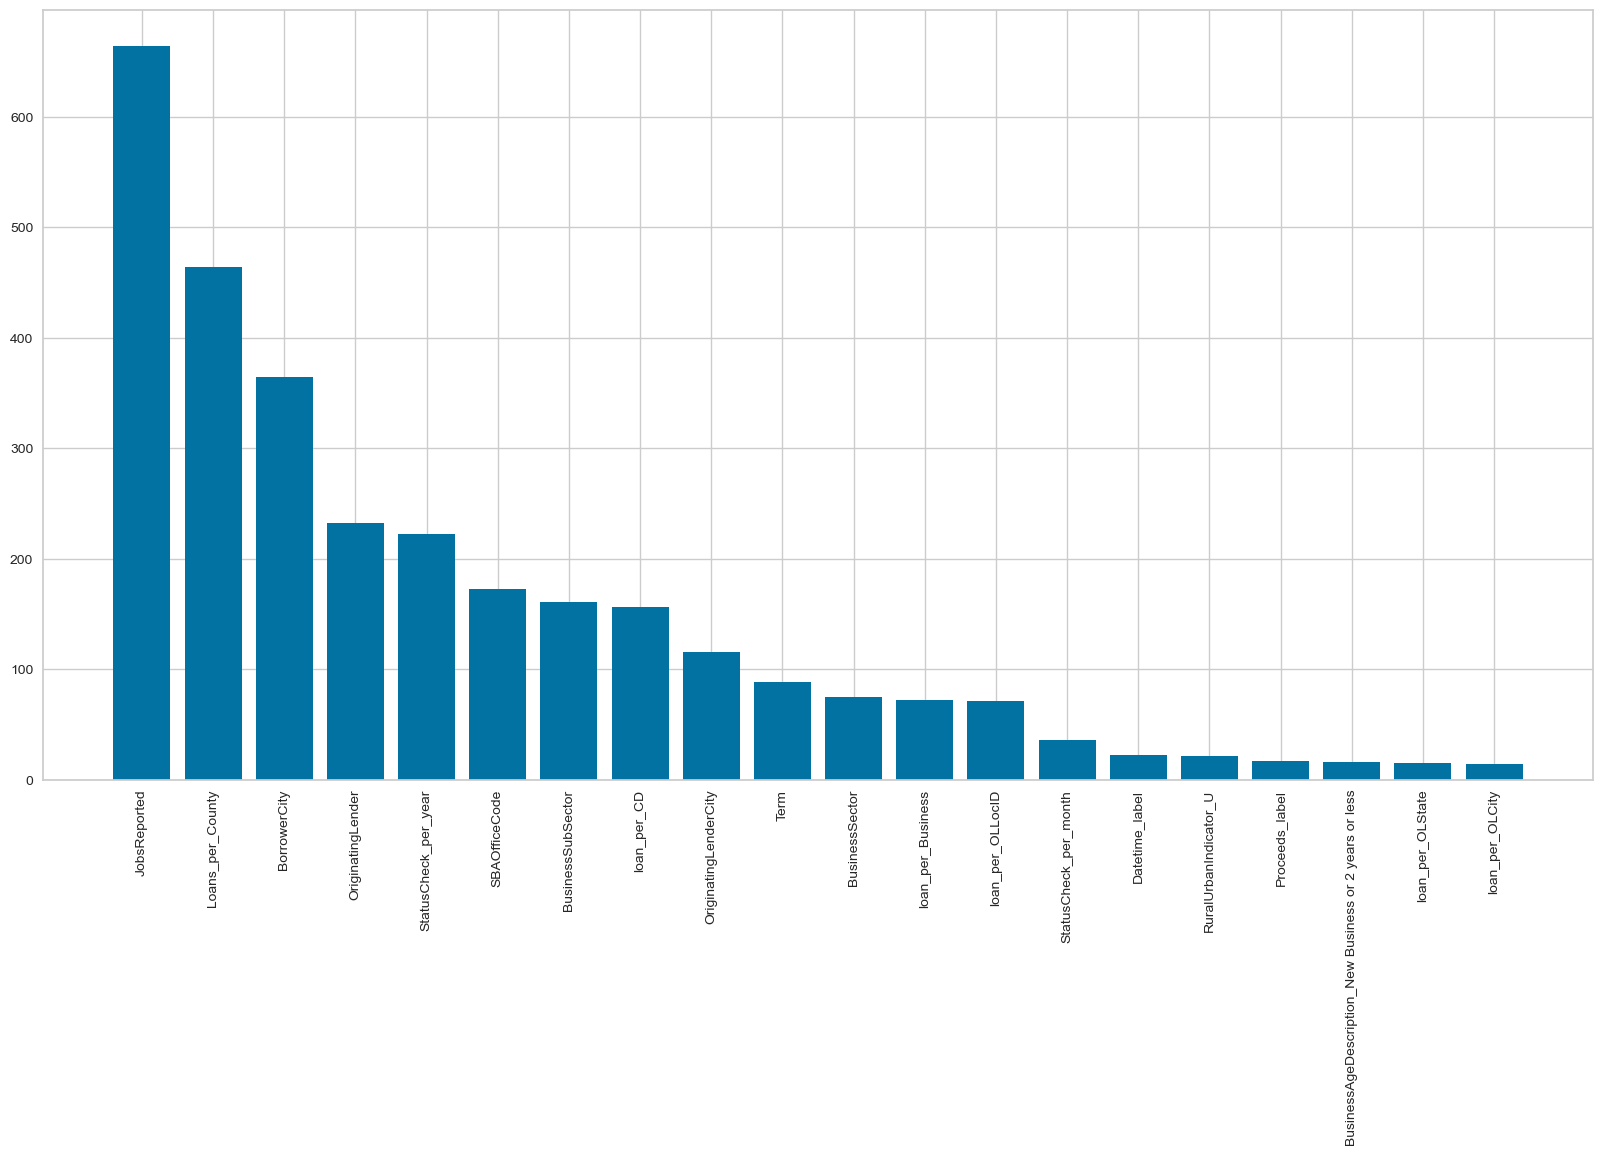

In [100]:
rg_l = list(zip(xtrain_wt.columns,lgbm.feature_importances_))

rg_l.sort(key=lambda x:x[1],reverse=True)

plt.figure(figsize=(20,10))
li1,li2=[],[]
for i in rg_l:
    li1.append(i[0])
    li2.append(i[1])
plt.figure(figsize=(20,10))
plt.bar(li1,li2)
plt.xticks(rotation=90)
plt.show()

In [101]:
round(wt_outliers.CurrentApprovalAmount.describe(),2)

count      80676.00
mean      348096.76
std       207326.90
min       150000.00
25%       194699.71
50%       270151.14
75%       432214.16
max      1057200.00
Name: CurrentApprovalAmount, dtype: float64

In [102]:
#OLS Model for outliers data::


xtrain_oc=add_constant(xtrain_o)
xtest_oc=add_constant(xtest_o)
ols_o=OLS(ytrain_o,xtrain_oc).fit()
olspred_o=ols_o.predict(xtest_oc)
print('rmse:: ',np.sqrt(mean_squared_error(ytest_o,olspred_o)))
ols_o.summary()

rmse::  903141.9237229829


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     CurrentApprovalAmount   R-squared:                       0.588
Model:                               OLS   Adj. R-squared:                  0.585
Method:                    Least Squares   F-statistic:                     195.9
Date:                   Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                           14:23:25   Log-Likelihood:            -1.1299e+05
No. Observations:                   7459   AIC:                         2.261e+05
Df Residuals:                       7404   BIC:                         2.265e+05
Df Model:                             54                                         
Covariance Type:               nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         2.891e+06    1.4e+05     20.702      0.000    2.62e+06    3.17e+06
SBAOfficeCode                                                 3258.1555   1.56e+04      0.209      0.835   -2.73e+04    3.38e+04
BorrowerCity                                                 -4.482e-08   3.44e-09    -13.041      0.000   -5.16e-08   -3.81e-08
Term                                                          1.519e+05   1.81e+04      8.384      0.000    1.16e+05    1.87e+05
JobsReported                                                  4.095e+05   1.34e+04     30.528      0.000    3.83e+05    4.36e+05
OriginatingLender                                              -36.2317     32.062     -1.130      0.258     -99.082      26.619
OriginatingLenderCity                                        -3.319e-09   1.09e-08     -0.304      0.761   -2.47e-08    1.81e-08
Borrower_per_city                                             1.117e+04   1.85e+04      0.605      0.545    -2.5e+04    4.74e+04
Borrower_per_state                                           -1.621e+04   1.74e+04     -0.933      0.351   -5.03e+04    1.79e+04
StatusCheck_per_month                                         1.053e+04   1.11e+04      0.947      0.344   -1.13e+04    3.23e+04
StatusCheck_per_year                                          1.554e+04   1.31e+04      1.184      0.236   -1.02e+04    4.13e+04
Loans_per_BusinessAge                                        -6.244e+05   2.11e+05     -2.964      0.003   -1.04e+06   -2.11e+05
Loans_per_County                                             -4877.0900   2.59e+04     -0.188      0.851   -5.56e+04    4.59e+04
loan_per_CD                                                   7.453e+04    2.3e+04      3.247      0.001    2.95e+04     1.2e+05
BusinessSector                                               -8.373e+04    1.4e+04     -5.992      0.000   -1.11e+05   -5.63e+04
BusinessSubSector                                            -1.697e+04   1.28e+04     -1.326      0.185   -4.21e+04    8113.718
BusinessIndustryGroup                                         3658.1135   1.09e+04      0.336      0.737   -1.77e+04     2.5e+04
loan_per_Business                                            -3638.7174    1.6e+04     -0.227      0.820    -3.5e+04    2.78e+04
loan_per_OLLocID                                              1.643e+04   2.99e+04      0.550      0.582   -4.21e+04     7.5e+04
loan_per_OLCity                                               7746.1100   2.69e+04      0.288      0.773    -4.5e+04    6.05e+04
loan_per_OLState                                             -1.951e+04   1.54e+04 

In [103]:
xtrain_o.drop(['SBAOfficeCode','OriginatingLender','OriginatingLenderCity',
                'Borrower_per_city','Borrower_per_state','StatusCheck_per_month',
                'StatusCheck_per_year','Loans_per_County','BusinessSubSector',
               'BusinessIndustryGroup','loan_per_Business','loan_per_OLLocID',
               'loan_per_OLCity','loan_per_OLState','RuralUrbanIndicator_U',
               'BusinessAgeDescription_New Business or 2 years or less',
               'BusinessAgeDescription_Startup Loan Funds will Open Business',
               'BusinessAgeDescription_Unanswered','Race_Asian',
               'Race_Native Hawaiian or Other Pacific Islander','Race_Unanswered',
               'Race_White','Ethnicity_Unknown/NotStated','BusinessType_Others',
               'Gender_Male Owned','Gender_Unanswered','Veteran_Veteran',
               'Repeat_Borrower_Y','BorrowerCityCount_Low','BorrowerCityCount_Moderate',
               'Borrower_Region_Northeast','Borrower_Region_Southeast','Borrower_Region_Southwest',
               'Borrower_Region_Territory','Borrower_Region_West','ProjectCounty_LoanCount_Low',
               'ProjectCounty_LoanCount_Moderate','CD_loancount_Low','CD_loancount_Moderate',
               'Lender_Region_Northeast','Lender_Region_Southeast','Lender_Region_Southwest',
               'Lender_Region_Territory'],axis=1,inplace=True)
xtest_o.drop(['SBAOfficeCode','OriginatingLender','OriginatingLenderCity',
                'Borrower_per_city','Borrower_per_state','StatusCheck_per_month',
                'StatusCheck_per_year','Loans_per_County','BusinessSubSector',
               'BusinessIndustryGroup','loan_per_Business','loan_per_OLLocID',
               'loan_per_OLCity','loan_per_OLState','RuralUrbanIndicator_U',
               'BusinessAgeDescription_New Business or 2 years or less',
               'BusinessAgeDescription_Startup Loan Funds will Open Business',
               'BusinessAgeDescription_Unanswered','Race_Asian',
               'Race_Native Hawaiian or Other Pacific Islander','Race_Unanswered',
               'Race_White','Ethnicity_Unknown/NotStated','BusinessType_Others',
               'Gender_Male Owned','Gender_Unanswered','Veteran_Veteran',
               'Repeat_Borrower_Y','BorrowerCityCount_Low','BorrowerCityCount_Moderate',
               'Borrower_Region_Northeast','Borrower_Region_Southeast','Borrower_Region_Southwest',
               'Borrower_Region_Territory','Borrower_Region_West','ProjectCounty_LoanCount_Low',
               'ProjectCounty_LoanCount_Moderate','CD_loancount_Low','CD_loancount_Moderate',
               'Lender_Region_Northeast','Lender_Region_Southeast','Lender_Region_Southwest',
               'Lender_Region_Territory'],axis=1,inplace=True)          

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(xtrain_o.values,i) for i in range(xtrain_o.shape[1])]
pd.DataFrame({'Features':xtrain_o.columns,'vif':vif})

Features        vif
0                                        BorrowerCity        NaN
1                                                Term   2.803746
2                                        JobsReported   1.536051
3                               Loans_per_BusinessAge   5.166944
4                                         loan_per_CD   1.055341
5                                      BusinessSector   1.204677
6                                      Datetime_label   3.808467
7                                      Proceeds_label  21.763575
8                                ProcessingMethod_PPS   3.748974
9   BusinessAgeDescription_Existing or more than 2...  36.232439
10                     Race_Black or African American   1.018731
11                   Ethnicity_Not Hispanic or Latino   2.039914
12              BusinessType_Non-Profit Organisations        inf
13                                 Veteran_Unanswered   7.377570
14                                        NonProfit_Y        inf
15                                 Lender_Region_West   1.232683

In [105]:
xtrain_o.drop(['BusinessAgeDescription_Existing or more than 2 years old',
               'BusinessType_Non-Profit Organisations','NonProfit_Y'],axis=1,inplace=True)
xtest_o.drop(['BusinessAgeDescription_Existing or more than 2 years old',
               'BusinessType_Non-Profit Organisations','NonProfit_Y'],axis=1,inplace=True)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(xtrain_o.values,i) for i in range(xtrain_o.shape[1])]
pd.DataFrame({'Features':xtrain_o.columns,'vif':vif})

Features       vif
0                       BorrowerCity       NaN
1                               Term  2.685412
2                       JobsReported  1.213838
3              Loans_per_BusinessAge  1.055457
4                        loan_per_CD  1.043363
5                     BusinessSector  1.088271
6                     Datetime_label  3.678387
7                     Proceeds_label  8.371204
8               ProcessingMethod_PPS  3.644465
9     Race_Black or African American  1.017731
10  Ethnicity_Not Hispanic or Latino  1.761950
11                Veteran_Unanswered  5.384703
12                Lender_Region_West  1.208016

In [107]:
def validation(tr_pred,tr,t_pred,t):
    r2_test=round(r2_score(t,t_pred),4)
    r2_train=round(r2_score(tr,tr_pred),4)
    n=xtest_o.shape[0]
    p=xtest_o.shape[1]
    adj_R2_test=round(1-(((1-r2_test)*(n-1))/(n-p-1)),4)
    adj_R2_train=round(1-(((1-r2_train)*(n-1))/(n-p-1)),4)
    print('R2 Test :: ',r2_test)
    print('R2 Train :: ',r2_train)
    print('Adj R2 Test:: ',adj_R2_test)
    print('Adj R2 Train:: ',adj_R2_train)
    rmse_train=round(np.sqrt(mean_squared_error(tr,tr_pred)),4)
    print('Train RMSE :: ',rmse_train)
    rmse_test=round(np.sqrt(mean_squared_error(t,t_pred)),4)
    print('Test RMSE :: ',rmse_test)
    print()
    print()
    
def models(model,xtrain,ytrain,xtest,ytest):
    print('%s'%model)
    model_s=model.fit(xtrain,ytrain)
    tr_pred=model_s.predict(xtrain)
    t_pred=model_s.predict(xtest)
    validation(tr_pred,ytrain,t_pred,ytest)

for i in m_list:
    models(i,xtrain_o,ytrain_o,xtest_o,ytest_o)

LinearRegression()
R2 Test ::  0.5893
R2 Train ::  0.5857
Adj R2 Test::  0.5864
Adj R2 Train::  0.5828
Train RMSE ::  920667.4185
Test RMSE ::  899535.0418


Ridge()
R2 Test ::  0.5894
R2 Train ::  0.5857
Adj R2 Test::  0.5865
Adj R2 Train::  0.5828
Train RMSE ::  920668.2696
Test RMSE ::  899516.5168


Lasso()
R2 Test ::  0.5893
R2 Train ::  0.5857
Adj R2 Test::  0.5864
Adj R2 Train::  0.5828
Train RMSE ::  920667.4186
Test RMSE ::  899534.6807


ElasticNet()
R2 Test ::  0.4992
R2 Train ::  0.4879
Adj R2 Test::  0.4957
Adj R2 Train::  0.4843
Train RMSE ::  1023631.2934
Test RMSE ::  993398.753


SGDRegressor()
R2 Test ::  0.5891
R2 Train ::  0.5853
Adj R2 Test::  0.5862
Adj R2 Train::  0.5824
Train RMSE ::  921204.3471
Test RMSE ::  899747.5843


DecisionTreeRegressor()
R2 Test ::  0.6221
R2 Train ::  0.9994
Adj R2 Test::  0.6194
Adj R2 Train::  0.9994
Train RMSE ::  34169.3652
Test RMSE ::  862914.8623


RandomForestRegressor()
R2 Test ::  0.8062
R2 Train ::  0.9725
Adj R2 Test::  0.

148:	learn: 551871.8034819	total: 564ms	remaining: 3.22s
149:	learn: 551307.7892827	total: 569ms	remaining: 3.23s
150:	learn: 551112.6659826	total: 574ms	remaining: 3.23s
151:	learn: 550503.6463132	total: 582ms	remaining: 3.25s
152:	learn: 550184.3778569	total: 587ms	remaining: 3.25s
153:	learn: 549789.6643662	total: 593ms	remaining: 3.26s
154:	learn: 549562.4613514	total: 601ms	remaining: 3.28s
155:	learn: 549446.2044731	total: 606ms	remaining: 3.28s
156:	learn: 549171.6442186	total: 611ms	remaining: 3.28s
157:	learn: 548999.2642547	total: 619ms	remaining: 3.3s
158:	learn: 548818.0088132	total: 624ms	remaining: 3.3s
159:	learn: 548200.9680264	total: 627ms	remaining: 3.29s
160:	learn: 548078.3836637	total: 631ms	remaining: 3.29s
161:	learn: 547953.3129687	total: 635ms	remaining: 3.28s
162:	learn: 547443.5262490	total: 638ms	remaining: 3.27s
163:	learn: 547289.1080062	total: 641ms	remaining: 3.27s
164:	learn: 547087.2734377	total: 646ms	remaining: 3.27s
165:	learn: 546852.6583559	total:

302:	learn: 509632.9639477	total: 1.17s	remaining: 2.69s
303:	learn: 509476.9789428	total: 1.18s	remaining: 2.69s
304:	learn: 509225.0202514	total: 1.18s	remaining: 2.69s
305:	learn: 508986.3016472	total: 1.19s	remaining: 2.69s
306:	learn: 508865.0433517	total: 1.19s	remaining: 2.69s
307:	learn: 508654.8692671	total: 1.2s	remaining: 2.69s
308:	learn: 508502.6215508	total: 1.2s	remaining: 2.69s
309:	learn: 508363.8248729	total: 1.21s	remaining: 2.69s
310:	learn: 508153.2915787	total: 1.21s	remaining: 2.69s
311:	learn: 507955.4247678	total: 1.22s	remaining: 2.69s
312:	learn: 507947.4668573	total: 1.22s	remaining: 2.68s
313:	learn: 507943.1591427	total: 1.22s	remaining: 2.67s
314:	learn: 507764.1036259	total: 1.23s	remaining: 2.67s
315:	learn: 507675.8008899	total: 1.23s	remaining: 2.66s
316:	learn: 507231.9315164	total: 1.24s	remaining: 2.66s
317:	learn: 507035.8735421	total: 1.24s	remaining: 2.66s
318:	learn: 506696.5574759	total: 1.24s	remaining: 2.65s
319:	learn: 506286.9348715	total:

451:	learn: 481946.3566901	total: 1.75s	remaining: 2.12s
452:	learn: 481896.1240885	total: 1.75s	remaining: 2.12s
453:	learn: 481719.5173258	total: 1.76s	remaining: 2.12s
454:	learn: 481551.1923396	total: 1.77s	remaining: 2.12s
455:	learn: 481095.6397411	total: 1.77s	remaining: 2.12s
456:	learn: 481010.4888835	total: 1.78s	remaining: 2.12s
457:	learn: 480889.7478223	total: 1.78s	remaining: 2.11s
458:	learn: 480660.1848995	total: 1.79s	remaining: 2.12s
459:	learn: 480656.3094933	total: 1.8s	remaining: 2.11s
460:	learn: 480475.2462337	total: 1.8s	remaining: 2.11s
461:	learn: 480254.1230436	total: 1.81s	remaining: 2.1s
462:	learn: 479835.4312469	total: 1.81s	remaining: 2.1s
463:	learn: 479695.1118592	total: 1.81s	remaining: 2.1s
464:	learn: 479521.7639817	total: 1.82s	remaining: 2.09s
465:	learn: 479434.7270073	total: 1.82s	remaining: 2.09s
466:	learn: 479211.3869297	total: 1.83s	remaining: 2.08s
467:	learn: 479027.9686918	total: 1.83s	remaining: 2.08s
468:	learn: 478885.3217331	total: 1.

600:	learn: 459125.8927339	total: 2.35s	remaining: 1.56s
601:	learn: 458965.0589289	total: 2.36s	remaining: 1.56s
602:	learn: 458896.0490900	total: 2.36s	remaining: 1.56s
603:	learn: 458749.2340939	total: 2.37s	remaining: 1.55s
604:	learn: 458674.8086319	total: 2.38s	remaining: 1.55s
605:	learn: 458446.2124147	total: 2.38s	remaining: 1.55s
606:	learn: 458336.1665314	total: 2.39s	remaining: 1.55s
607:	learn: 458208.1235078	total: 2.4s	remaining: 1.54s
608:	learn: 458113.9757109	total: 2.4s	remaining: 1.54s
609:	learn: 458047.1937829	total: 2.4s	remaining: 1.54s
610:	learn: 457904.9864218	total: 2.41s	remaining: 1.53s
611:	learn: 457779.2651611	total: 2.41s	remaining: 1.53s
612:	learn: 457601.6050676	total: 2.42s	remaining: 1.52s
613:	learn: 457466.3197614	total: 2.42s	remaining: 1.52s
614:	learn: 457276.1121612	total: 2.43s	remaining: 1.52s
615:	learn: 457179.0024549	total: 2.43s	remaining: 1.52s
616:	learn: 457060.2299174	total: 2.44s	remaining: 1.51s
617:	learn: 456821.4489578	total: 

752:	learn: 440216.8581501	total: 2.95s	remaining: 969ms
753:	learn: 440122.1242185	total: 2.96s	remaining: 965ms
754:	learn: 439967.9842936	total: 2.96s	remaining: 962ms
755:	learn: 439922.2724055	total: 2.97s	remaining: 959ms
756:	learn: 439868.8513613	total: 2.98s	remaining: 955ms
757:	learn: 439772.8052047	total: 2.98s	remaining: 952ms
758:	learn: 439660.8858491	total: 2.99s	remaining: 950ms
759:	learn: 439508.5548763	total: 3s	remaining: 946ms
760:	learn: 439389.8170668	total: 3s	remaining: 942ms
761:	learn: 439321.7316546	total: 3s	remaining: 938ms
762:	learn: 439283.5513990	total: 3.01s	remaining: 934ms
763:	learn: 439125.6079226	total: 3.01s	remaining: 930ms
764:	learn: 438969.4211513	total: 3.02s	remaining: 926ms
765:	learn: 438880.6802452	total: 3.02s	remaining: 922ms
766:	learn: 438807.5731722	total: 3.02s	remaining: 918ms
767:	learn: 438636.5827859	total: 3.03s	remaining: 914ms
768:	learn: 438484.6565971	total: 3.03s	remaining: 910ms
769:	learn: 438315.0901737	total: 3.03s	

897:	learn: 424396.7935815	total: 3.52s	remaining: 400ms
898:	learn: 424329.9486255	total: 3.53s	remaining: 397ms
899:	learn: 424113.4666818	total: 3.54s	remaining: 393ms
900:	learn: 423997.6778883	total: 3.54s	remaining: 389ms
901:	learn: 423797.2896376	total: 3.55s	remaining: 385ms
902:	learn: 423712.5977679	total: 3.55s	remaining: 382ms
903:	learn: 423638.7522867	total: 3.56s	remaining: 378ms
904:	learn: 423534.6584320	total: 3.56s	remaining: 374ms
905:	learn: 423364.3202532	total: 3.57s	remaining: 371ms
906:	learn: 423303.0696806	total: 3.58s	remaining: 367ms
907:	learn: 423159.5856486	total: 3.59s	remaining: 363ms
908:	learn: 423157.5969368	total: 3.59s	remaining: 359ms
909:	learn: 423079.4172419	total: 3.59s	remaining: 355ms
910:	learn: 422718.9930499	total: 3.6s	remaining: 351ms
911:	learn: 422539.2213929	total: 3.6s	remaining: 348ms
912:	learn: 422370.4077891	total: 3.61s	remaining: 344ms
913:	learn: 422235.7118047	total: 3.61s	remaining: 340ms
914:	learn: 422135.7450870	total:

In [108]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

gb=GradientBoostingRegressor()
params={'learning_rate':[1e-10,1e-8,1e-5,1e-3,1e-2,0.01,0.02,0.04,0.1,0.2],
       'n_estimators':[10,20,50,100,200,400,500,700,1000]}
gscv=GridSearchCV(estimator=gb,cv=5,param_grid=params,scoring='neg_root_mean_squared_error',
                 verbose=3,n_jobs=-1)

gscv.fit(xtrain_o,ytrain_o)
gscv.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'learning_rate': 0.01, 'n_estimators': 1000}

In [109]:
gb=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
gbm=gb.fit(xtrain_o,ytrain_o)

tpred_o=gbm.predict(xtest_o)
trpred_o=gbm.predict(xtrain_o)
validation(trpred_o,ytrain_o,tpred_o,ytest_o)

R2 Test ::  0.824
R2 Train ::  0.8435
Adj R2 Test::  0.8228
Adj R2 Train::  0.8424
Train RMSE ::  565966.0454
Test RMSE ::  588862.6078




In [110]:
round(outliers.CurrentApprovalAmount.describe(),2)

count        9324.00
mean      2124669.40
std       1425273.18
min       1057357.00
25%       1289826.25
50%       1669050.00
75%       2234900.00
max      10000000.00
Name: CurrentApprovalAmount, dtype: float64